In [3]:
import os
import shutil

original_dataset_dir = '/home/steve/PycharmProjects/AI_Learning/Python深度学习/data/cat_vs_dog/train'

base_dir = '/home/steve/PycharmProjects/AI_Learning/Python深度学习/data/cat_vs_dog/base_dir'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)
train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)
validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)
test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


In [5]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [6]:
print('total training cat images:', len(os.listdir(train_dogs_dir)))

total training cat images: 1000


In [7]:
print('total training cat images:', len(os.listdir(validation_cats_dir)))

total training cat images: 500


In [8]:
print('total training cat images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 500


In [9]:
print('total training cat images:', len(os.listdir(test_cats_dir)))

total training cat images: 500


In [10]:
print('total training cat images:', len(os.listdir(test_dogs_dir)))

total training cat images: 500


In [14]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36992)             0         
__________

In [16]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=20, class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break


data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


In [19]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50
)


Epoch 1/5


  1/100 [..............................] - ETA: 6:19 - loss: 0.6937 - acc: 0.5000

  2/100 [..............................] - ETA: 3:53 - loss: 0.7276 - acc: 0.6500

  3/100 [..............................] - ETA: 3:02 - loss: 0.7489 - acc: 0.5167

  4/100 [>.............................] - ETA: 2:35 - loss: 0.7545 - acc: 0.5125

  5/100 [>.............................] - ETA: 2:22 - loss: 0.7455 - acc: 0.5200

  6/100 [>.............................] - ETA: 2:14 - loss: 0.7344 - acc: 0.5333

  7/100 [=>............................] - ETA: 2:05 - loss: 0.7355 - acc: 0.5143

  8/100 [=>............................] - ETA: 1:58 - loss: 0.7305 - acc: 0.5063

  9/100 [=>............................] - ETA: 1:54 - loss: 0.7263 - acc: 0.5056

 10/100 [==>...........................] - ETA: 1:54 - loss: 0.7221 - acc: 0.5200

 11/100 [==>...........................] - ETA: 1:54 - loss: 0.7167 - acc: 0.5318

 12/100 [==>...........................] - ETA: 1:51 - loss: 0.7131 - acc: 0.5375

 13/100 [==>...........................] - ETA: 1:48 - loss: 0.7224 - acc: 0.5154

 14/100 [===>..........................] - ETA: 1:44 - loss: 0.7200 - acc: 0.5179

 15/100 [===>..........................] - ETA: 1:44 - loss: 0.7197 - acc: 0.5067

 16/100 [===>..........................] - ETA: 1:44 - loss: 0.7185 - acc: 0.5000

 17/100 [====>.........................] - ETA: 1:44 - loss: 0.7166 - acc: 0.5000

 18/100 [====>.........................] - ETA: 1:44 - loss: 0.7160 - acc: 0.4944

 19/100 [====>.........................] - ETA: 1:44 - loss: 0.7146 - acc: 0.4947

 20/100 [=====>........................] - ETA: 1:44 - loss: 0.7134 - acc: 0.4975

 21/100 [=====>........................] - ETA: 1:42 - loss: 0.7122 - acc: 0.4976

 22/100 [=====>........................] - ETA: 1:41 - loss: 0.7107 - acc: 0.5000

 23/100 [=====>........................] - ETA: 1:39 - loss: 0.7106 - acc: 0.4957

 24/100 [======>.......................] - ETA: 1:37 - loss: 0.7089 - acc: 0.5083

 25/100 [======>.......................] - ETA: 1:35 - loss: 0.7063 - acc: 0.5160

 26/100 [======>.......................] - ETA: 1:32 - loss: 0.7043 - acc: 0.5212

 27/100 [=======>......................] - ETA: 1:30 - loss: 0.7041 - acc: 0.5222

 28/100 [=======>......................] - ETA: 1:28 - loss: 0.7031 - acc: 0.5232

 29/100 [=======>......................] - ETA: 1:26 - loss: 0.7048 - acc: 0.5155

 30/100 [========>.....................] - ETA: 1:25 - loss: 0.7041 - acc: 0.5150

 31/100 [========>.....................] - ETA: 1:24 - loss: 0.7047 - acc: 0.5097

 32/100 [========>.....................] - ETA: 1:23 - loss: 0.7044 - acc: 0.5094

 33/100 [========>.....................] - ETA: 1:21 - loss: 0.7040 - acc: 0.5091

 34/100 [=========>....................] - ETA: 1:19 - loss: 0.7031 - acc: 0.5162

 35/100 [=========>....................] - ETA: 1:18 - loss: 0.7024 - acc: 0.5214

 36/100 [=========>....................] - ETA: 1:16 - loss: 0.7016 - acc: 0.5250

 37/100 [==========>...................] - ETA: 1:16 - loss: 0.7004 - acc: 0.5284

 38/100 [==========>...................] - ETA: 1:14 - loss: 0.7042 - acc: 0.5211

 39/100 [==========>...................] - ETA: 1:13 - loss: 0.7032 - acc: 0.5256

 40/100 [===========>..................] - ETA: 1:11 - loss: 0.7030 - acc: 0.5263

 41/100 [===========>..................] - ETA: 1:10 - loss: 0.7027 - acc: 0.5256

 42/100 [===========>..................] - ETA: 1:08 - loss: 0.7020 - acc: 0.5262

 43/100 [===========>..................] - ETA: 1:07 - loss: 0.7014 - acc: 0.5279

 44/100 [============>.................] - ETA: 1:06 - loss: 0.7008 - acc: 0.5284

 45/100 [============>.................] - ETA: 1:05 - loss: 0.7006 - acc: 0.5278

 46/100 [============>.................] - ETA: 1:03 - loss: 0.6992 - acc: 0.5315

 47/100 [=============>................] - ETA: 1:02 - loss: 0.7015 - acc: 0.5255

 48/100 [=============>................] - ETA: 1:01 - loss: 0.7009 - acc: 0.5292

 49/100 [=============>................] - ETA: 1:00 - loss: 0.7006 - acc: 0.5286

 50/100 [==============>...............] - ETA: 59s - loss: 0.7005 - acc: 0.5270 

 51/100 [==============>...............] - ETA: 57s - loss: 0.7000 - acc: 0.5275

 52/100 [==============>...............] - ETA: 56s - loss: 0.6999 - acc: 0.5260

 53/100 [==============>...............] - ETA: 55s - loss: 0.6998 - acc: 0.5245

 54/100 [===============>..............] - ETA: 54s - loss: 0.6993 - acc: 0.5296

 55/100 [===============>..............] - ETA: 53s - loss: 0.6995 - acc: 0.5282

 56/100 [===============>..............] - ETA: 52s - loss: 0.6994 - acc: 0.5268

 57/100 [================>.............] - ETA: 50s - loss: 0.6992 - acc: 0.5263

 58/100 [================>.............] - ETA: 49s - loss: 0.6987 - acc: 0.5293

 59/100 [================>.............] - ETA: 48s - loss: 0.6988 - acc: 0.5280

 60/100 [=================>............] - ETA: 46s - loss: 0.6985 - acc: 0.5283

 61/100 [=================>............] - ETA: 45s - loss: 0.6975 - acc: 0.5303

 62/100 [=================>............] - ETA: 44s - loss: 0.6960 - acc: 0.5331

 63/100 [=================>............] - ETA: 42s - loss: 0.6969 - acc: 0.5317

 64/100 [==================>...........] - ETA: 41s - loss: 0.6965 - acc: 0.5328

 65/100 [==================>...........] - ETA: 40s - loss: 0.6967 - acc: 0.5308

 66/100 [==================>...........] - ETA: 39s - loss: 0.6965 - acc: 0.5311

 67/100 [===================>..........] - ETA: 37s - loss: 0.6958 - acc: 0.5351

 68/100 [===================>..........] - ETA: 36s - loss: 0.6957 - acc: 0.5346

 69/100 [===================>..........] - ETA: 35s - loss: 0.6954 - acc: 0.5348

 70/100 [====================>.........] - ETA: 34s - loss: 0.6950 - acc: 0.5357

 71/100 [====================>.........] - ETA: 33s - loss: 0.6942 - acc: 0.5380

 72/100 [====================>.........] - ETA: 31s - loss: 0.6936 - acc: 0.5389

 73/100 [====================>.........] - ETA: 30s - loss: 0.6941 - acc: 0.5377

 74/100 [=====================>........] - ETA: 29s - loss: 0.6938 - acc: 0.5399

 75/100 [=====================>........] - ETA: 28s - loss: 0.6947 - acc: 0.5373

 76/100 [=====================>........] - ETA: 26s - loss: 0.6947 - acc: 0.5375

 77/100 [======================>.......] - ETA: 25s - loss: 0.6942 - acc: 0.5390

 78/100 [======================>.......] - ETA: 24s - loss: 0.6944 - acc: 0.5385

 79/100 [======================>.......] - ETA: 23s - loss: 0.6942 - acc: 0.5373

 80/100 [=======================>......] - ETA: 22s - loss: 0.6945 - acc: 0.5356

 81/100 [=======================>......] - ETA: 21s - loss: 0.6941 - acc: 0.5364

 82/100 [=======================>......] - ETA: 20s - loss: 0.6938 - acc: 0.5378

 83/100 [=======================>......] - ETA: 19s - loss: 0.6936 - acc: 0.5398

 84/100 [========================>.....] - ETA: 17s - loss: 0.6937 - acc: 0.5393

 85/100 [========================>.....] - ETA: 16s - loss: 0.6934 - acc: 0.5400

 86/100 [========================>.....] - ETA: 15s - loss: 0.6924 - acc: 0.5419

 87/100 [=========================>....] - ETA: 14s - loss: 0.6916 - acc: 0.5431

 88/100 [=========================>....] - ETA: 13s - loss: 0.6905 - acc: 0.5443

 89/100 [=========================>....] - ETA: 12s - loss: 0.6920 - acc: 0.5427

 90/100 [==========================>...] - ETA: 11s - loss: 0.6920 - acc: 0.5428

 91/100 [==========================>...] - ETA: 10s - loss: 0.6916 - acc: 0.5456

 92/100 [==========================>...] - ETA: 8s - loss: 0.6914 - acc: 0.5451 

 93/100 [==========================>...] - ETA: 7s - loss: 0.6910 - acc: 0.5452

 94/100 [===========================>..] - ETA: 6s - loss: 0.6912 - acc: 0.5441

 95/100 [===========================>..] - ETA: 5s - loss: 0.6911 - acc: 0.5442

 96/100 [===========================>..] - ETA: 4s - loss: 0.6910 - acc: 0.5448

 97/100 [============================>.] - ETA: 3s - loss: 0.6908 - acc: 0.5454

 98/100 [============================>.] - ETA: 2s - loss: 0.6910 - acc: 0.5444

 99/100 [============================>.] - ETA: 1s - loss: 0.6904 - acc: 0.5470

100/100 [==============================] - 126s 1s/step - loss: 0.6907 - acc: 0.5460 - val_loss: 0.6692 - val_acc: 0.5350


Epoch 2/5


  1/100 [..............................] - ETA: 1:36 - loss: 0.6665 - acc: 0.4500

  2/100 [..............................] - ETA: 1:31 - loss: 0.6594 - acc: 0.5250

  3/100 [..............................] - ETA: 1:30 - loss: 0.6642 - acc: 0.5167

  4/100 [>.............................] - ETA: 1:29 - loss: 0.6669 - acc: 0.5500

  5/100 [>.............................] - ETA: 1:30 - loss: 0.6657 - acc: 0.5600

  6/100 [>.............................] - ETA: 1:31 - loss: 0.6581 - acc: 0.5750

  7/100 [=>............................] - ETA: 1:30 - loss: 0.6642 - acc: 0.5500

  8/100 [=>............................] - ETA: 1:35 - loss: 0.6659 - acc: 0.5625

  9/100 [=>............................] - ETA: 1:35 - loss: 0.6629 - acc: 0.5778

 10/100 [==>...........................] - ETA: 1:32 - loss: 0.6571 - acc: 0.5900

 11/100 [==>...........................] - ETA: 1:30 - loss: 0.6642 - acc: 0.5773

 12/100 [==>...........................] - ETA: 1:28 - loss: 0.6594 - acc: 0.6000

 13/100 [==>...........................] - ETA: 1:26 - loss: 0.6592 - acc: 0.6038

 14/100 [===>..........................] - ETA: 1:24 - loss: 0.6587 - acc: 0.6071

 15/100 [===>..........................] - ETA: 1:23 - loss: 0.6632 - acc: 0.5967

 16/100 [===>..........................] - ETA: 1:21 - loss: 0.6614 - acc: 0.5844

 17/100 [====>.........................] - ETA: 1:21 - loss: 0.6637 - acc: 0.5735

 18/100 [====>.........................] - ETA: 1:21 - loss: 0.6639 - acc: 0.5694

 19/100 [====>.........................] - ETA: 1:19 - loss: 0.6701 - acc: 0.5579

 20/100 [=====>........................] - ETA: 1:21 - loss: 0.6691 - acc: 0.5600

 21/100 [=====>........................] - ETA: 1:22 - loss: 0.6686 - acc: 0.5643

 22/100 [=====>........................] - ETA: 1:22 - loss: 0.6699 - acc: 0.5591

 23/100 [=====>........................] - ETA: 1:21 - loss: 0.6702 - acc: 0.5587

 24/100 [======>.......................] - ETA: 1:20 - loss: 0.6698 - acc: 0.5583

 25/100 [======>.......................] - ETA: 1:19 - loss: 0.6706 - acc: 0.5540

 26/100 [======>.......................] - ETA: 1:17 - loss: 0.6694 - acc: 0.5558

 27/100 [=======>......................] - ETA: 1:16 - loss: 0.6682 - acc: 0.5630

 28/100 [=======>......................] - ETA: 1:15 - loss: 0.6679 - acc: 0.5661

 29/100 [=======>......................] - ETA: 1:15 - loss: 0.6684 - acc: 0.5672

 30/100 [========>.....................] - ETA: 1:15 - loss: 0.6682 - acc: 0.5700

 31/100 [========>.....................] - ETA: 1:14 - loss: 0.6678 - acc: 0.5677

 32/100 [========>.....................] - ETA: 1:13 - loss: 0.6686 - acc: 0.5656

 33/100 [========>.....................] - ETA: 1:11 - loss: 0.6680 - acc: 0.5667

 34/100 [=========>....................] - ETA: 1:10 - loss: 0.6692 - acc: 0.5603

 35/100 [=========>....................] - ETA: 1:08 - loss: 0.6683 - acc: 0.5657

 36/100 [=========>....................] - ETA: 1:07 - loss: 0.6678 - acc: 0.5653

 37/100 [==========>...................] - ETA: 1:05 - loss: 0.6662 - acc: 0.5703

 38/100 [==========>...................] - ETA: 1:04 - loss: 0.6658 - acc: 0.5711

 39/100 [==========>...................] - ETA: 1:03 - loss: 0.6665 - acc: 0.5692

 40/100 [===========>..................] - ETA: 1:02 - loss: 0.6679 - acc: 0.5687

 41/100 [===========>..................] - ETA: 1:00 - loss: 0.6678 - acc: 0.5695

 42/100 [===========>..................] - ETA: 59s - loss: 0.6665 - acc: 0.5750 

 43/100 [===========>..................] - ETA: 58s - loss: 0.6647 - acc: 0.5802

 44/100 [============>.................] - ETA: 56s - loss: 0.6647 - acc: 0.5773

 45/100 [============>.................] - ETA: 55s - loss: 0.6634 - acc: 0.5822

 46/100 [============>.................] - ETA: 54s - loss: 0.6628 - acc: 0.5826

 47/100 [=============>................] - ETA: 53s - loss: 0.6611 - acc: 0.5872

 48/100 [=============>................] - ETA: 52s - loss: 0.6624 - acc: 0.5865

 49/100 [=============>................] - ETA: 50s - loss: 0.6624 - acc: 0.5857

 50/100 [==============>...............] - ETA: 49s - loss: 0.6613 - acc: 0.5900

 51/100 [==============>...............] - ETA: 48s - loss: 0.6620 - acc: 0.5892

 52/100 [==============>...............] - ETA: 47s - loss: 0.6619 - acc: 0.5885

 53/100 [==============>...............] - ETA: 46s - loss: 0.6622 - acc: 0.5906

 54/100 [===============>..............] - ETA: 45s - loss: 0.6613 - acc: 0.5926

 55/100 [===============>..............] - ETA: 44s - loss: 0.6602 - acc: 0.5945

 56/100 [===============>..............] - ETA: 43s - loss: 0.6578 - acc: 0.6000

 57/100 [================>.............] - ETA: 41s - loss: 0.6578 - acc: 0.6009

 58/100 [================>.............] - ETA: 40s - loss: 0.6574 - acc: 0.6009

 59/100 [================>.............] - ETA: 39s - loss: 0.6563 - acc: 0.6025

 60/100 [=================>............] - ETA: 38s - loss: 0.6560 - acc: 0.6042

 61/100 [=================>............] - ETA: 37s - loss: 0.6549 - acc: 0.6090

 62/100 [=================>............] - ETA: 36s - loss: 0.6550 - acc: 0.6065

 63/100 [=================>............] - ETA: 35s - loss: 0.6539 - acc: 0.6095

 64/100 [==================>...........] - ETA: 34s - loss: 0.6537 - acc: 0.6086

 65/100 [==================>...........] - ETA: 33s - loss: 0.6532 - acc: 0.6092

 66/100 [==================>...........] - ETA: 32s - loss: 0.6549 - acc: 0.6068

 67/100 [===================>..........] - ETA: 31s - loss: 0.6533 - acc: 0.6097

 68/100 [===================>..........] - ETA: 30s - loss: 0.6541 - acc: 0.6074

 69/100 [===================>..........] - ETA: 29s - loss: 0.6538 - acc: 0.6080

 70/100 [====================>.........] - ETA: 28s - loss: 0.6527 - acc: 0.6100

 71/100 [====================>.........] - ETA: 27s - loss: 0.6518 - acc: 0.6120

 72/100 [====================>.........] - ETA: 26s - loss: 0.6509 - acc: 0.6139

 73/100 [====================>.........] - ETA: 25s - loss: 0.6497 - acc: 0.6151

 74/100 [=====================>........] - ETA: 24s - loss: 0.6495 - acc: 0.6162

 75/100 [=====================>........] - ETA: 23s - loss: 0.6477 - acc: 0.6187

 76/100 [=====================>........] - ETA: 22s - loss: 0.6474 - acc: 0.6178

 77/100 [======================>.......] - ETA: 21s - loss: 0.6465 - acc: 0.6195

 78/100 [======================>.......] - ETA: 20s - loss: 0.6464 - acc: 0.6199

 79/100 [======================>.......] - ETA: 19s - loss: 0.6469 - acc: 0.6190

 80/100 [=======================>......] - ETA: 18s - loss: 0.6475 - acc: 0.6187

 81/100 [=======================>......] - ETA: 17s - loss: 0.6476 - acc: 0.6191

 82/100 [=======================>......] - ETA: 16s - loss: 0.6476 - acc: 0.6189

 83/100 [=======================>......] - ETA: 15s - loss: 0.6478 - acc: 0.6175

 84/100 [========================>.....] - ETA: 14s - loss: 0.6481 - acc: 0.6161

 85/100 [========================>.....] - ETA: 14s - loss: 0.6485 - acc: 0.6153

 86/100 [========================>.....] - ETA: 13s - loss: 0.6485 - acc: 0.6157

 87/100 [=========================>....] - ETA: 12s - loss: 0.6486 - acc: 0.6149

 88/100 [=========================>....] - ETA: 11s - loss: 0.6481 - acc: 0.6148

 89/100 [=========================>....] - ETA: 10s - loss: 0.6472 - acc: 0.6163

 90/100 [==========================>...] - ETA: 9s - loss: 0.6469 - acc: 0.6167 

 91/100 [==========================>...] - ETA: 8s - loss: 0.6467 - acc: 0.6176

 92/100 [==========================>...] - ETA: 7s - loss: 0.6467 - acc: 0.6168

 93/100 [==========================>...] - ETA: 6s - loss: 0.6467 - acc: 0.6177

 94/100 [===========================>..] - ETA: 5s - loss: 0.6464 - acc: 0.6181

 95/100 [===========================>..] - ETA: 4s - loss: 0.6463 - acc: 0.6179

 96/100 [===========================>..] - ETA: 3s - loss: 0.6456 - acc: 0.6187

 97/100 [============================>.] - ETA: 2s - loss: 0.6457 - acc: 0.6160

 98/100 [============================>.] - ETA: 1s - loss: 0.6451 - acc: 0.6163

 99/100 [============================>.] - ETA: 0s - loss: 0.6441 - acc: 0.6187

100/100 [==============================] - 110s 1s/step - loss: 0.6442 - acc: 0.6185 - val_loss: 0.6187 - val_acc: 0.6730


Epoch 3/5


  1/100 [..............................] - ETA: 1:24 - loss: 0.5289 - acc: 0.8500

  2/100 [..............................] - ETA: 1:22 - loss: 0.5764 - acc: 0.7000

  3/100 [..............................] - ETA: 1:23 - loss: 0.5785 - acc: 0.6500

  4/100 [>.............................] - ETA: 1:24 - loss: 0.6091 - acc: 0.6125

  5/100 [>.............................] - ETA: 1:27 - loss: 0.5883 - acc: 0.6400

  6/100 [>.............................] - ETA: 1:26 - loss: 0.5686 - acc: 0.6583

  7/100 [=>............................] - ETA: 1:25 - loss: 0.5397 - acc: 0.7071

  8/100 [=>............................] - ETA: 1:24 - loss: 0.5487 - acc: 0.7000

  9/100 [=>............................] - ETA: 1:23 - loss: 0.5579 - acc: 0.6944

 10/100 [==>...........................] - ETA: 1:22 - loss: 0.5674 - acc: 0.6950

 11/100 [==>...........................] - ETA: 1:21 - loss: 0.5731 - acc: 0.6955

 12/100 [==>...........................] - ETA: 1:20 - loss: 0.5787 - acc: 0.6917

 13/100 [==>...........................] - ETA: 1:21 - loss: 0.5864 - acc: 0.6808

 14/100 [===>..........................] - ETA: 1:23 - loss: 0.5944 - acc: 0.6643

 15/100 [===>..........................] - ETA: 1:27 - loss: 0.6006 - acc: 0.6433

 16/100 [===>..........................] - ETA: 1:27 - loss: 0.6024 - acc: 0.6437

 17/100 [====>.........................] - ETA: 1:25 - loss: 0.6010 - acc: 0.6559

 18/100 [====>.........................] - ETA: 1:23 - loss: 0.6028 - acc: 0.6583

 19/100 [====>.........................] - ETA: 1:22 - loss: 0.6030 - acc: 0.6579

 20/100 [=====>........................] - ETA: 1:21 - loss: 0.6016 - acc: 0.6600

 21/100 [=====>........................] - ETA: 1:20 - loss: 0.5984 - acc: 0.6643

 22/100 [=====>........................] - ETA: 1:19 - loss: 0.5993 - acc: 0.6659

 23/100 [=====>........................] - ETA: 1:17 - loss: 0.6018 - acc: 0.6652

 24/100 [======>.......................] - ETA: 1:16 - loss: 0.5993 - acc: 0.6687

 25/100 [======>.......................] - ETA: 1:15 - loss: 0.6003 - acc: 0.6720

 26/100 [======>.......................] - ETA: 1:14 - loss: 0.5999 - acc: 0.6712

 27/100 [=======>......................] - ETA: 1:13 - loss: 0.5980 - acc: 0.6722

 28/100 [=======>......................] - ETA: 1:11 - loss: 0.5928 - acc: 0.6768

 29/100 [=======>......................] - ETA: 1:10 - loss: 0.5936 - acc: 0.6776

 30/100 [========>.....................] - ETA: 1:10 - loss: 0.5955 - acc: 0.6750

 31/100 [========>.....................] - ETA: 1:08 - loss: 0.6008 - acc: 0.6710

 32/100 [========>.....................] - ETA: 1:07 - loss: 0.5999 - acc: 0.6703

 33/100 [========>.....................] - ETA: 1:07 - loss: 0.5986 - acc: 0.6712

 34/100 [=========>....................] - ETA: 1:05 - loss: 0.5978 - acc: 0.6750

 35/100 [=========>....................] - ETA: 1:04 - loss: 0.5980 - acc: 0.6757

 36/100 [=========>....................] - ETA: 1:03 - loss: 0.5974 - acc: 0.6764

 37/100 [==========>...................] - ETA: 1:02 - loss: 0.6004 - acc: 0.6730

 38/100 [==========>...................] - ETA: 1:01 - loss: 0.6018 - acc: 0.6697

 39/100 [==========>...................] - ETA: 1:00 - loss: 0.5996 - acc: 0.6705

 40/100 [===========>..................] - ETA: 59s - loss: 0.6010 - acc: 0.6662 

 41/100 [===========>..................] - ETA: 58s - loss: 0.6014 - acc: 0.6683

 42/100 [===========>..................] - ETA: 57s - loss: 0.5984 - acc: 0.6714

 43/100 [===========>..................] - ETA: 56s - loss: 0.5987 - acc: 0.6709

 44/100 [============>.................] - ETA: 55s - loss: 0.5992 - acc: 0.6727

 45/100 [============>.................] - ETA: 54s - loss: 0.5996 - acc: 0.6711

 46/100 [============>.................] - ETA: 53s - loss: 0.5978 - acc: 0.6750

 47/100 [=============>................] - ETA: 52s - loss: 0.5981 - acc: 0.6745

 48/100 [=============>................] - ETA: 51s - loss: 0.5986 - acc: 0.6740

 49/100 [=============>................] - ETA: 50s - loss: 0.5993 - acc: 0.6735

 50/100 [==============>...............] - ETA: 49s - loss: 0.5991 - acc: 0.6750

 51/100 [==============>...............] - ETA: 48s - loss: 0.5990 - acc: 0.6755

 52/100 [==============>...............] - ETA: 47s - loss: 0.5971 - acc: 0.6760

 53/100 [==============>...............] - ETA: 46s - loss: 0.5984 - acc: 0.6745

 54/100 [===============>..............] - ETA: 45s - loss: 0.5972 - acc: 0.6769

 55/100 [===============>..............] - ETA: 44s - loss: 0.5977 - acc: 0.6773

 56/100 [===============>..............] - ETA: 43s - loss: 0.5957 - acc: 0.6795

 57/100 [================>.............] - ETA: 42s - loss: 0.5961 - acc: 0.6789

 58/100 [================>.............] - ETA: 41s - loss: 0.5957 - acc: 0.6793

 59/100 [================>.............] - ETA: 40s - loss: 0.5961 - acc: 0.6788

 60/100 [=================>............] - ETA: 39s - loss: 0.5941 - acc: 0.6825

 61/100 [=================>............] - ETA: 38s - loss: 0.5945 - acc: 0.6836

 62/100 [=================>............] - ETA: 37s - loss: 0.5926 - acc: 0.6863

 63/100 [=================>............] - ETA: 36s - loss: 0.5955 - acc: 0.6833

 64/100 [==================>...........] - ETA: 35s - loss: 0.5974 - acc: 0.6820

 65/100 [==================>...........] - ETA: 34s - loss: 0.5974 - acc: 0.6831

 66/100 [==================>...........] - ETA: 33s - loss: 0.5953 - acc: 0.6841

 67/100 [===================>..........] - ETA: 32s - loss: 0.5957 - acc: 0.6836

 68/100 [===================>..........] - ETA: 31s - loss: 0.5948 - acc: 0.6853

 69/100 [===================>..........] - ETA: 30s - loss: 0.5941 - acc: 0.6862

 70/100 [====================>.........] - ETA: 29s - loss: 0.5938 - acc: 0.6871

 71/100 [====================>.........] - ETA: 28s - loss: 0.5939 - acc: 0.6873

 72/100 [====================>.........] - ETA: 27s - loss: 0.5932 - acc: 0.6875

 73/100 [====================>.........] - ETA: 26s - loss: 0.5934 - acc: 0.6890

 74/100 [=====================>........] - ETA: 25s - loss: 0.5940 - acc: 0.6878

 75/100 [=====================>........] - ETA: 24s - loss: 0.5925 - acc: 0.6900

 76/100 [=====================>........] - ETA: 23s - loss: 0.5926 - acc: 0.6895

 77/100 [======================>.......] - ETA: 22s - loss: 0.5910 - acc: 0.6896

 78/100 [======================>.......] - ETA: 21s - loss: 0.5900 - acc: 0.6923

 79/100 [======================>.......] - ETA: 20s - loss: 0.5887 - acc: 0.6924

 80/100 [=======================>......] - ETA: 19s - loss: 0.5885 - acc: 0.6931

 81/100 [=======================>......] - ETA: 18s - loss: 0.5881 - acc: 0.6932

 82/100 [=======================>......] - ETA: 17s - loss: 0.5873 - acc: 0.6933

 83/100 [=======================>......] - ETA: 16s - loss: 0.5887 - acc: 0.6922

 84/100 [========================>.....] - ETA: 15s - loss: 0.5871 - acc: 0.6935

 85/100 [========================>.....] - ETA: 14s - loss: 0.5881 - acc: 0.6929

 86/100 [========================>.....] - ETA: 13s - loss: 0.5880 - acc: 0.6930

 87/100 [=========================>....] - ETA: 12s - loss: 0.5871 - acc: 0.6943

 88/100 [=========================>....] - ETA: 11s - loss: 0.5872 - acc: 0.6937

 89/100 [=========================>....] - ETA: 10s - loss: 0.5861 - acc: 0.6949

 90/100 [==========================>...] - ETA: 9s - loss: 0.5864 - acc: 0.6939 

 91/100 [==========================>...] - ETA: 8s - loss: 0.5858 - acc: 0.6951

 92/100 [==========================>...] - ETA: 7s - loss: 0.5857 - acc: 0.6957

 93/100 [==========================>...] - ETA: 6s - loss: 0.5869 - acc: 0.6935

 94/100 [===========================>..] - ETA: 5s - loss: 0.5866 - acc: 0.6936

 95/100 [===========================>..] - ETA: 4s - loss: 0.5869 - acc: 0.6926

 96/100 [===========================>..] - ETA: 3s - loss: 0.5858 - acc: 0.6943

 97/100 [============================>.] - ETA: 2s - loss: 0.5854 - acc: 0.6954

 98/100 [============================>.] - ETA: 1s - loss: 0.5845 - acc: 0.6969

 99/100 [============================>.] - ETA: 0s - loss: 0.5843 - acc: 0.6975

100/100 [==============================] - 117s 1s/step - loss: 0.5832 - acc: 0.6990 - val_loss: 0.5997 - val_acc: 0.6710


Epoch 4/5


  1/100 [..............................] - ETA: 1:36 - loss: 0.5546 - acc: 0.7000

  2/100 [..............................] - ETA: 1:31 - loss: 0.4989 - acc: 0.7750

  3/100 [..............................] - ETA: 1:29 - loss: 0.5399 - acc: 0.7333

  4/100 [>.............................] - ETA: 1:34 - loss: 0.5497 - acc: 0.7250

  5/100 [>.............................] - ETA: 1:34 - loss: 0.5415 - acc: 0.7300

  6/100 [>.............................] - ETA: 1:30 - loss: 0.5435 - acc: 0.7250

  7/100 [=>............................] - ETA: 1:31 - loss: 0.5411 - acc: 0.7429

  8/100 [=>............................] - ETA: 1:31 - loss: 0.5283 - acc: 0.7500

  9/100 [=>............................] - ETA: 1:31 - loss: 0.5227 - acc: 0.7556

 10/100 [==>...........................] - ETA: 1:31 - loss: 0.5307 - acc: 0.7450

 11/100 [==>...........................] - ETA: 1:30 - loss: 0.5289 - acc: 0.7636

 12/100 [==>...........................] - ETA: 1:28 - loss: 0.5338 - acc: 0.7583

 13/100 [==>...........................] - ETA: 1:28 - loss: 0.5369 - acc: 0.7577

 14/100 [===>..........................] - ETA: 1:27 - loss: 0.5401 - acc: 0.7607

 15/100 [===>..........................] - ETA: 1:26 - loss: 0.5523 - acc: 0.7467

 16/100 [===>..........................] - ETA: 1:25 - loss: 0.5519 - acc: 0.7469

 17/100 [====>.........................] - ETA: 1:24 - loss: 0.5456 - acc: 0.7500

 18/100 [====>.........................] - ETA: 1:22 - loss: 0.5471 - acc: 0.7556

 19/100 [====>.........................] - ETA: 1:22 - loss: 0.5554 - acc: 0.7447

 20/100 [=====>........................] - ETA: 1:20 - loss: 0.5532 - acc: 0.7475

 21/100 [=====>........................] - ETA: 1:20 - loss: 0.5494 - acc: 0.7524

 22/100 [=====>........................] - ETA: 1:20 - loss: 0.5498 - acc: 0.7500

 23/100 [=====>........................] - ETA: 1:21 - loss: 0.5492 - acc: 0.7543

 24/100 [======>.......................] - ETA: 1:22 - loss: 0.5516 - acc: 0.7458

 25/100 [======>.......................] - ETA: 1:22 - loss: 0.5496 - acc: 0.7440

 26/100 [======>.......................] - ETA: 1:23 - loss: 0.5467 - acc: 0.7442

 27/100 [=======>......................] - ETA: 1:23 - loss: 0.5462 - acc: 0.7444

 28/100 [=======>......................] - ETA: 1:21 - loss: 0.5453 - acc: 0.7464

 29/100 [=======>......................] - ETA: 1:19 - loss: 0.5458 - acc: 0.7448

 30/100 [========>.....................] - ETA: 1:18 - loss: 0.5464 - acc: 0.7433

 31/100 [========>.....................] - ETA: 1:16 - loss: 0.5521 - acc: 0.7355

 32/100 [========>.....................] - ETA: 1:15 - loss: 0.5515 - acc: 0.7391

 33/100 [========>.....................] - ETA: 1:13 - loss: 0.5490 - acc: 0.7409

 34/100 [=========>....................] - ETA: 1:11 - loss: 0.5480 - acc: 0.7426

 35/100 [=========>....................] - ETA: 1:10 - loss: 0.5557 - acc: 0.7357

 36/100 [=========>....................] - ETA: 1:09 - loss: 0.5525 - acc: 0.7361

 37/100 [==========>...................] - ETA: 1:07 - loss: 0.5506 - acc: 0.7392

 38/100 [==========>...................] - ETA: 1:06 - loss: 0.5495 - acc: 0.7395

 39/100 [==========>...................] - ETA: 1:05 - loss: 0.5474 - acc: 0.7397

 40/100 [===========>..................] - ETA: 1:03 - loss: 0.5446 - acc: 0.7425

 41/100 [===========>..................] - ETA: 1:02 - loss: 0.5444 - acc: 0.7415

 42/100 [===========>..................] - ETA: 1:00 - loss: 0.5467 - acc: 0.7393

 43/100 [===========>..................] - ETA: 59s - loss: 0.5449 - acc: 0.7407 

 44/100 [============>.................] - ETA: 58s - loss: 0.5446 - acc: 0.7420

 45/100 [============>.................] - ETA: 57s - loss: 0.5439 - acc: 0.7433

 46/100 [============>.................] - ETA: 56s - loss: 0.5410 - acc: 0.7446

 47/100 [=============>................] - ETA: 55s - loss: 0.5384 - acc: 0.7457

 48/100 [=============>................] - ETA: 54s - loss: 0.5403 - acc: 0.7438

 49/100 [=============>................] - ETA: 53s - loss: 0.5433 - acc: 0.7408

 50/100 [==============>...............] - ETA: 52s - loss: 0.5421 - acc: 0.7410

 51/100 [==============>...............] - ETA: 51s - loss: 0.5421 - acc: 0.7412

 52/100 [==============>...............] - ETA: 50s - loss: 0.5431 - acc: 0.7404

 53/100 [==============>...............] - ETA: 49s - loss: 0.5424 - acc: 0.7396

 54/100 [===============>..............] - ETA: 48s - loss: 0.5413 - acc: 0.7398

 55/100 [===============>..............] - ETA: 47s - loss: 0.5403 - acc: 0.7382

 56/100 [===============>..............] - ETA: 45s - loss: 0.5380 - acc: 0.7402

 57/100 [================>.............] - ETA: 44s - loss: 0.5377 - acc: 0.7386

 58/100 [================>.............] - ETA: 43s - loss: 0.5385 - acc: 0.7388

 59/100 [================>.............] - ETA: 42s - loss: 0.5371 - acc: 0.7407

 60/100 [=================>............] - ETA: 41s - loss: 0.5406 - acc: 0.7358

 61/100 [=================>............] - ETA: 40s - loss: 0.5397 - acc: 0.7361

 62/100 [=================>............] - ETA: 39s - loss: 0.5402 - acc: 0.7363

 63/100 [=================>............] - ETA: 38s - loss: 0.5425 - acc: 0.7341

 64/100 [==================>...........] - ETA: 37s - loss: 0.5427 - acc: 0.7344

 65/100 [==================>...........] - ETA: 36s - loss: 0.5428 - acc: 0.7338

 66/100 [==================>...........] - ETA: 35s - loss: 0.5416 - acc: 0.7348

 67/100 [===================>..........] - ETA: 34s - loss: 0.5414 - acc: 0.7358

 68/100 [===================>..........] - ETA: 33s - loss: 0.5405 - acc: 0.7360

 69/100 [===================>..........] - ETA: 32s - loss: 0.5407 - acc: 0.7362

 70/100 [====================>.........] - ETA: 31s - loss: 0.5432 - acc: 0.7343

 71/100 [====================>.........] - ETA: 30s - loss: 0.5436 - acc: 0.7352

 72/100 [====================>.........] - ETA: 29s - loss: 0.5446 - acc: 0.7347

 73/100 [====================>.........] - ETA: 28s - loss: 0.5428 - acc: 0.7363

 74/100 [=====================>........] - ETA: 27s - loss: 0.5417 - acc: 0.7378

 75/100 [=====================>........] - ETA: 26s - loss: 0.5402 - acc: 0.7387

 76/100 [=====================>........] - ETA: 25s - loss: 0.5390 - acc: 0.7395

 77/100 [======================>.......] - ETA: 24s - loss: 0.5377 - acc: 0.7396

 78/100 [======================>.......] - ETA: 23s - loss: 0.5365 - acc: 0.7404

 79/100 [======================>.......] - ETA: 22s - loss: 0.5361 - acc: 0.7399

 80/100 [=======================>......] - ETA: 21s - loss: 0.5348 - acc: 0.7406

 81/100 [=======================>......] - ETA: 19s - loss: 0.5355 - acc: 0.7401

 82/100 [=======================>......] - ETA: 18s - loss: 0.5380 - acc: 0.7378

 83/100 [=======================>......] - ETA: 17s - loss: 0.5370 - acc: 0.7398

 84/100 [========================>.....] - ETA: 16s - loss: 0.5375 - acc: 0.7393

 85/100 [========================>.....] - ETA: 15s - loss: 0.5370 - acc: 0.7382

 86/100 [========================>.....] - ETA: 14s - loss: 0.5354 - acc: 0.7395

 87/100 [=========================>....] - ETA: 13s - loss: 0.5350 - acc: 0.7397

 88/100 [=========================>....] - ETA: 12s - loss: 0.5357 - acc: 0.7386

 89/100 [=========================>....] - ETA: 11s - loss: 0.5367 - acc: 0.7376

 90/100 [==========================>...] - ETA: 10s - loss: 0.5363 - acc: 0.7367

 91/100 [==========================>...] - ETA: 9s - loss: 0.5349 - acc: 0.7379 

 92/100 [==========================>...] - ETA: 8s - loss: 0.5347 - acc: 0.7375

 93/100 [==========================>...] - ETA: 7s - loss: 0.5357 - acc: 0.7366

 94/100 [===========================>..] - ETA: 6s - loss: 0.5357 - acc: 0.7356

 95/100 [===========================>..] - ETA: 5s - loss: 0.5350 - acc: 0.7363

 96/100 [===========================>..] - ETA: 4s - loss: 0.5359 - acc: 0.7333

 97/100 [============================>.] - ETA: 3s - loss: 0.5366 - acc: 0.7320

 98/100 [============================>.] - ETA: 2s - loss: 0.5373 - acc: 0.7306

 99/100 [============================>.] - ETA: 1s - loss: 0.5373 - acc: 0.7313

100/100 [==============================] - 118s 1s/step - loss: 0.5366 - acc: 0.7315 - val_loss: 0.6032 - val_acc: 0.6870


Epoch 5/5


  1/100 [..............................] - ETA: 1:29 - loss: 0.5705 - acc: 0.7000

  2/100 [..............................] - ETA: 1:26 - loss: 0.6226 - acc: 0.7000

  3/100 [..............................] - ETA: 1:31 - loss: 0.6342 - acc: 0.6500

  4/100 [>.............................] - ETA: 1:31 - loss: 0.6053 - acc: 0.6375

  5/100 [>.............................] - ETA: 1:41 - loss: 0.5847 - acc: 0.6500

  6/100 [>.............................] - ETA: 1:50 - loss: 0.5709 - acc: 0.6917

  7/100 [=>............................] - ETA: 1:54 - loss: 0.5841 - acc: 0.6786

  8/100 [=>............................] - ETA: 1:51 - loss: 0.5677 - acc: 0.6875

  9/100 [=>............................] - ETA: 1:48 - loss: 0.5710 - acc: 0.6889

 10/100 [==>...........................] - ETA: 1:47 - loss: 0.5684 - acc: 0.6800

 11/100 [==>...........................] - ETA: 1:43 - loss: 0.5712 - acc: 0.6773

 12/100 [==>...........................] - ETA: 1:39 - loss: 0.5727 - acc: 0.6833

 13/100 [==>...........................] - ETA: 1:36 - loss: 0.5597 - acc: 0.6962

 14/100 [===>..........................] - ETA: 1:34 - loss: 0.5515 - acc: 0.7071

 15/100 [===>..........................] - ETA: 1:31 - loss: 0.5447 - acc: 0.7133

 16/100 [===>..........................] - ETA: 1:29 - loss: 0.5475 - acc: 0.7125

 17/100 [====>.........................] - ETA: 1:27 - loss: 0.5523 - acc: 0.7088

 18/100 [====>.........................] - ETA: 1:26 - loss: 0.5466 - acc: 0.7139

 19/100 [====>.........................] - ETA: 1:24 - loss: 0.5466 - acc: 0.7132

 20/100 [=====>........................] - ETA: 1:23 - loss: 0.5431 - acc: 0.7125

 21/100 [=====>........................] - ETA: 1:22 - loss: 0.5443 - acc: 0.7071

 22/100 [=====>........................] - ETA: 1:21 - loss: 0.5422 - acc: 0.7091

 23/100 [=====>........................] - ETA: 1:19 - loss: 0.5370 - acc: 0.7130

 24/100 [======>.......................] - ETA: 1:18 - loss: 0.5317 - acc: 0.7167

 25/100 [======>.......................] - ETA: 1:17 - loss: 0.5262 - acc: 0.7240

 26/100 [======>.......................] - ETA: 1:15 - loss: 0.5215 - acc: 0.7269

 27/100 [=======>......................] - ETA: 1:14 - loss: 0.5209 - acc: 0.7296

 28/100 [=======>......................] - ETA: 1:13 - loss: 0.5203 - acc: 0.7321

 29/100 [=======>......................] - ETA: 1:12 - loss: 0.5149 - acc: 0.7397

 30/100 [========>.....................] - ETA: 1:11 - loss: 0.5126 - acc: 0.7417

 31/100 [========>.....................] - ETA: 1:09 - loss: 0.5116 - acc: 0.7452

 32/100 [========>.....................] - ETA: 1:08 - loss: 0.5106 - acc: 0.7438

 33/100 [========>.....................] - ETA: 1:07 - loss: 0.5093 - acc: 0.7485

 34/100 [=========>....................] - ETA: 1:06 - loss: 0.5080 - acc: 0.7500

 35/100 [=========>....................] - ETA: 1:05 - loss: 0.5055 - acc: 0.7514

 36/100 [=========>....................] - ETA: 1:03 - loss: 0.5026 - acc: 0.7542

 37/100 [==========>...................] - ETA: 1:02 - loss: 0.5110 - acc: 0.7514

 38/100 [==========>...................] - ETA: 1:01 - loss: 0.5141 - acc: 0.7500

 39/100 [==========>...................] - ETA: 1:00 - loss: 0.5169 - acc: 0.7474

 40/100 [===========>..................] - ETA: 59s - loss: 0.5178 - acc: 0.7438 

 41/100 [===========>..................] - ETA: 58s - loss: 0.5199 - acc: 0.7451

 42/100 [===========>..................] - ETA: 56s - loss: 0.5212 - acc: 0.7429

 43/100 [===========>..................] - ETA: 55s - loss: 0.5222 - acc: 0.7395

 44/100 [============>.................] - ETA: 54s - loss: 0.5206 - acc: 0.7375

 45/100 [============>.................] - ETA: 53s - loss: 0.5216 - acc: 0.7378

 46/100 [============>.................] - ETA: 52s - loss: 0.5194 - acc: 0.7380

 47/100 [=============>................] - ETA: 51s - loss: 0.5177 - acc: 0.7404

 48/100 [=============>................] - ETA: 50s - loss: 0.5164 - acc: 0.7417

 49/100 [=============>................] - ETA: 50s - loss: 0.5161 - acc: 0.7408

 50/100 [==============>...............] - ETA: 49s - loss: 0.5144 - acc: 0.7410

 51/100 [==============>...............] - ETA: 48s - loss: 0.5111 - acc: 0.7431

 52/100 [==============>...............] - ETA: 47s - loss: 0.5094 - acc: 0.7433

 53/100 [==============>...............] - ETA: 46s - loss: 0.5118 - acc: 0.7415

 54/100 [===============>..............] - ETA: 45s - loss: 0.5137 - acc: 0.7398

 55/100 [===============>..............] - ETA: 44s - loss: 0.5137 - acc: 0.7382

 56/100 [===============>..............] - ETA: 44s - loss: 0.5135 - acc: 0.7402

 57/100 [================>.............] - ETA: 43s - loss: 0.5124 - acc: 0.7421

 58/100 [================>.............] - ETA: 41s - loss: 0.5118 - acc: 0.7414

 59/100 [================>.............] - ETA: 40s - loss: 0.5085 - acc: 0.7449

 60/100 [=================>............] - ETA: 39s - loss: 0.5081 - acc: 0.7458

 61/100 [=================>............] - ETA: 38s - loss: 0.5084 - acc: 0.7443

 62/100 [=================>............] - ETA: 37s - loss: 0.5081 - acc: 0.7427

 63/100 [=================>............] - ETA: 36s - loss: 0.5084 - acc: 0.7437

 64/100 [==================>...........] - ETA: 36s - loss: 0.5083 - acc: 0.7430

 65/100 [==================>...........] - ETA: 35s - loss: 0.5090 - acc: 0.7423

 66/100 [==================>...........] - ETA: 34s - loss: 0.5094 - acc: 0.7417

 67/100 [===================>..........] - ETA: 33s - loss: 0.5087 - acc: 0.7418

 68/100 [===================>..........] - ETA: 32s - loss: 0.5092 - acc: 0.7397

 69/100 [===================>..........] - ETA: 31s - loss: 0.5102 - acc: 0.7399

 70/100 [====================>.........] - ETA: 30s - loss: 0.5109 - acc: 0.7393

 71/100 [====================>.........] - ETA: 29s - loss: 0.5102 - acc: 0.7401

 72/100 [====================>.........] - ETA: 28s - loss: 0.5083 - acc: 0.7410

 73/100 [====================>.........] - ETA: 27s - loss: 0.5054 - acc: 0.7425

 74/100 [=====================>........] - ETA: 26s - loss: 0.5042 - acc: 0.7426

 75/100 [=====================>........] - ETA: 25s - loss: 0.5027 - acc: 0.7447

 76/100 [=====================>........] - ETA: 23s - loss: 0.5019 - acc: 0.7441

 77/100 [======================>.......] - ETA: 22s - loss: 0.5019 - acc: 0.7435

 78/100 [======================>.......] - ETA: 21s - loss: 0.5046 - acc: 0.7417

 79/100 [======================>.......] - ETA: 20s - loss: 0.5037 - acc: 0.7411

 80/100 [=======================>......] - ETA: 19s - loss: 0.5049 - acc: 0.7413

 81/100 [=======================>......] - ETA: 18s - loss: 0.5042 - acc: 0.7414

 82/100 [=======================>......] - ETA: 17s - loss: 0.5021 - acc: 0.7439

 83/100 [=======================>......] - ETA: 16s - loss: 0.5043 - acc: 0.7428

 84/100 [========================>.....] - ETA: 15s - loss: 0.5047 - acc: 0.7429

 85/100 [========================>.....] - ETA: 14s - loss: 0.5050 - acc: 0.7435

 86/100 [========================>.....] - ETA: 13s - loss: 0.5054 - acc: 0.7436

 87/100 [=========================>....] - ETA: 12s - loss: 0.5056 - acc: 0.7431

 88/100 [=========================>....] - ETA: 11s - loss: 0.5048 - acc: 0.7449

 89/100 [=========================>....] - ETA: 10s - loss: 0.5042 - acc: 0.7461

 90/100 [==========================>...] - ETA: 9s - loss: 0.5038 - acc: 0.7461 

 91/100 [==========================>...] - ETA: 8s - loss: 0.5037 - acc: 0.7473

 92/100 [==========================>...] - ETA: 7s - loss: 0.5024 - acc: 0.7473

 93/100 [==========================>...] - ETA: 6s - loss: 0.5033 - acc: 0.7468

 94/100 [===========================>..] - ETA: 5s - loss: 0.5033 - acc: 0.7457

 95/100 [===========================>..] - ETA: 4s - loss: 0.5015 - acc: 0.7474

 96/100 [===========================>..] - ETA: 3s - loss: 0.5003 - acc: 0.7495

 97/100 [============================>.] - ETA: 2s - loss: 0.5037 - acc: 0.7479

 98/100 [============================>.] - ETA: 1s - loss: 0.5022 - acc: 0.7490

 99/100 [============================>.] - ETA: 0s - loss: 0.5045 - acc: 0.7475

100/100 [==============================] - 112s 1s/step - loss: 0.5039 - acc: 0.7480 - val_loss: 0.5906 - val_acc: 0.6930


In [20]:
model.save("/home/steve/PycharmProjects/AI_Learning/Python深度学习/model/5_2.h5")

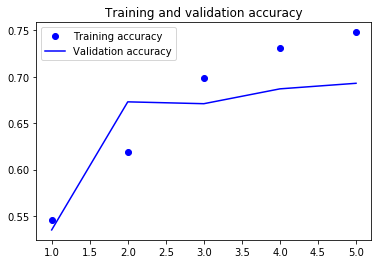

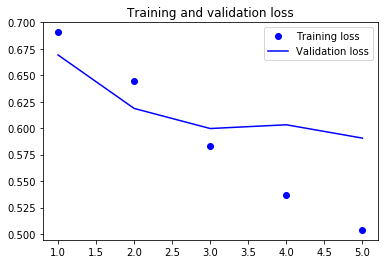

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [23]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')


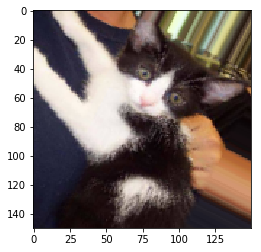

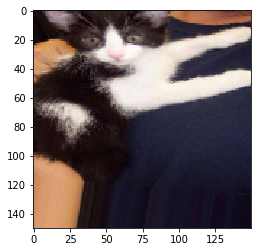

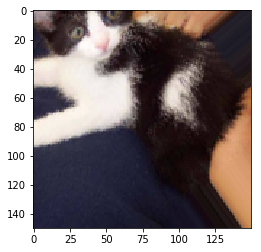

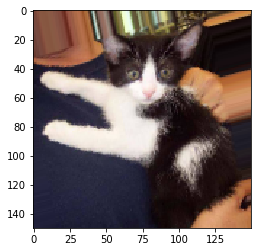

In [37]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[10]  # select one image to show
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)  # 将其转换为形状 (150, 150, 3) 的 Numpy 数组
x = x.reshape((1,) + x.shape)  # 将其形状改变为 (1, 150, 150, 3)
i = 1
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 5 == 0:  # 生成随机变换后的图像批量。循环是无限的，因此你需要在某个时刻终止循环
        break
plt.show()


In [38]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)  # 不能增强验证数据

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=32,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=32,
                                                        class_mode='binary')
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)


In [ ]:
model.save("/home/steve/PycharmProjects/AI_Learning/Python深度学习/model/5_2_(2).h5")

In [39]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))


    8192/58889256 [..............................] - ETA: 8:13

   24576/58889256 [..............................] - ETA: 6:52

   40960/58889256 [..............................] - ETA: 5:29

   57344/58889256 [..............................] - ETA: 4:52

   90112/58889256 [..............................] - ETA: 3:51

  122880/58889256 [..............................] - ETA: 3:15

  180224/58889256 [..............................] - ETA: 2:32

  245760/58889256 [..............................] - ETA: 2:06

  319488/58889256 [..............................] - ETA: 1:46

  417792/58889256 [..............................] - ETA: 1:28

  540672/58889256 [..............................] - ETA: 1:13

  712704/58889256 [..............................] - ETA: 59s 

  909312/58889256 [..............................] - ETA: 50s

 1097728/58889256 [..............................] - ETA: 44s

 1417216/58889256 [..............................] - ETA: 36s

 1810432/58889256 [..............................] - ETA: 29s

 2048000/58889256 [>.............................] - ETA: 27s

 2392064/58889256 [>.............................] - ETA: 24s

 2703360/58889256 [>.............................] - ETA: 22s

 3031040/58889256 [>.............................] - ETA: 21s

 3375104/58889256 [>.............................] - ETA: 19s

 3735552/58889256 [>.............................] - ETA: 18s

 3981312/58889256 [=>............................] - ETA: 18s

 4325376/58889256 [=>............................] - ETA: 17s

 4694016/58889256 [=>............................] - ETA: 16s

 5046272/58889256 [=>............................] - ETA: 15s

 5292032/58889256 [=>............................] - ETA: 15s

 5570560/58889256 [=>............................] - ETA: 15s

 5816320/58889256 [=>............................] - ETA: 14s

 6144000/58889256 [==>...........................] - ETA: 14s

 6471680/58889256 [==>...........................] - ETA: 14s

 6848512/58889256 [==>...........................] - ETA: 13s

 7274496/58889256 [==>...........................] - ETA: 13s

 7618560/58889256 [==>...........................] - ETA: 12s

 7831552/58889256 [==>...........................] - ETA: 12s

 8224768/58889256 [===>..........................] - ETA: 12s

 8650752/58889256 [===>..........................] - ETA: 12s

 8912896/58889256 [===>..........................] - ETA: 11s

 9347072/58889256 [===>..........................] - ETA: 11s

 9666560/58889256 [===>..........................] - ETA: 11s

 9961472/58889256 [====>.........................] - ETA: 11s

10207232/58889256 [====>.........................] - ETA: 11s

10436608/58889256 [====>.........................] - ETA: 11s

10993664/58889256 [====>.........................] - ETA: 10s

11370496/58889256 [====>.........................] - ETA: 10s

11665408/58889256 [====>.........................] - ETA: 10s

11927552/58889256 [=====>........................] - ETA: 10s

12337152/58889256 [=====>........................] - ETA: 9s 

12713984/58889256 [=====>........................] - ETA: 9s

13107200/58889256 [=====>........................] - ETA: 9s

13434880/58889256 [=====>........................] - ETA: 9s

13762560/58889256 [======>.......................] - ETA: 9s

14008320/58889256 [======>.......................] - ETA: 9s

14319616/58889256 [======>.......................] - ETA: 9s

14745600/58889256 [======>.......................] - ETA: 9s

15106048/58889256 [======>.......................] - ETA: 8s

15417344/58889256 [======>.......................] - ETA: 8s

15826944/58889256 [=======>......................] - ETA: 8s

16154624/58889256 [=======>......................] - ETA: 8s

16367616/58889256 [=======>......................] - ETA: 8s

16728064/58889256 [=======>......................] - ETA: 8s

17154048/58889256 [=======>......................] - ETA: 8s

17350656/58889256 [=======>......................] - ETA: 8s

17448960/58889256 [=======>......................] - ETA: 8s

18251776/58889256 [========>.....................] - ETA: 10s

18317312/58889256 [========>.....................] - ETA: 11s

18464768/58889256 [========>.....................] - ETA: 11s

18644992/58889256 [========>.....................] - ETA: 12s

18694144/58889256 [========>.....................] - ETA: 14s

19283968/58889256 [========>.....................] - ETA: 14s

20709376/58889256 [=========>....................] - ETA: 13s

21053440/58889256 [=========>....................] - ETA: 12s

21381120/58889256 [=========>....................] - ETA: 12s

21561344/58889256 [=========>....................] - ETA: 12s

21577728/58889256 [=========>....................] - ETA: 13s

21585920/58889256 [=========>....................] - ETA: 13s

22036480/58889256 [==========>...................] - ETA: 13s

22085632/58889256 [==========>...................] - ETA: 13s

22134784/58889256 [==========>...................] - ETA: 13s

22609920/58889256 [==========>...................] - ETA: 13s

23592960/58889256 [===========>..................] - ETA: 12s

23609344/58889256 [===========>..................] - ETA: 12s

24707072/58889256 [===========>..................] - ETA: 11s

26083328/58889256 [============>.................] - ETA: 11s

26738688/58889256 [============>.................] - ETA: 10s

27099136/58889256 [============>.................] - ETA: 10s

27394048/58889256 [============>.................] - ETA: 10s

27738112/58889256 [=============>................] - ETA: 10s

28082176/58889256 [=============>................] - ETA: 9s 

28442624/58889256 [=============>................] - ETA: 9s

28770304/58889256 [=============>................] - ETA: 9s

29147136/58889256 [=============>................] - ETA: 9s

29605888/58889256 [==============>...............] - ETA: 9s

29851648/58889256 [==============>...............] - ETA: 9s

30081024/58889256 [==============>...............] - ETA: 8s

30687232/58889256 [==============>...............] - ETA: 8s

31080448/58889256 [==============>...............] - ETA: 8s

31227904/58889256 [==============>...............] - ETA: 8s

32768000/58889256 [===============>..............] - ETA: 8s

32899072/58889256 [===============>..............] - ETA: 8s

33226752/58889256 [===============>..............] - ETA: 7s

33800192/58889256 [================>.............] - ETA: 7s

34111488/58889256 [================>.............] - ETA: 7s

34570240/58889256 [================>.............] - ETA: 7s

34865152/58889256 [================>.............] - ETA: 7s

35176448/58889256 [================>.............] - ETA: 7s

35504128/58889256 [=================>............] - ETA: 6s

35897344/58889256 [=================>............] - ETA: 6s

36290560/58889256 [=================>............] - ETA: 6s

36667392/58889256 [=================>............] - ETA: 6s

37076992/58889256 [=================>............] - ETA: 6s

37437440/58889256 [==================>...........] - ETA: 6s

37748736/58889256 [==================>...........] - ETA: 6s

38060032/58889256 [==================>...........] - ETA: 6s

38436864/58889256 [==================>...........] - ETA: 5s

38797312/58889256 [==================>...........] - ETA: 5s

39223296/58889256 [==================>...........] - ETA: 5s

39469056/58889256 [===================>..........] - ETA: 5s

39845888/58889256 [===================>..........] - ETA: 5s

40009728/58889256 [===================>..........] - ETA: 5s

40583168/58889256 [===================>..........] - ETA: 5s

40960000/58889256 [===================>..........] - ETA: 5s

41304064/58889256 [====================>.........] - ETA: 4s

41598976/58889256 [====================>.........] - ETA: 4s

42123264/58889256 [====================>.........] - ETA: 4s

42434560/58889256 [====================>.........] - ETA: 4s

42811392/58889256 [====================>.........] - ETA: 4s

43122688/58889256 [====================>.........] - ETA: 4s

43499520/58889256 [=====================>........] - ETA: 4s

43745280/58889256 [=====================>........] - ETA: 4s

44105728/58889256 [=====================>........] - ETA: 3s

44498944/58889256 [=====================>........] - ETA: 3s

44826624/58889256 [=====================>........] - ETA: 3s

45088768/58889256 [=====================>........] - ETA: 3s

45481984/58889256 [======================>.......] - ETA: 3s

45744128/58889256 [======================>.......] - ETA: 3s

45858816/58889256 [======================>.......] - ETA: 3s

46022656/58889256 [======================>.......] - ETA: 3s

46809088/58889256 [======================>.......] - ETA: 3s

47087616/58889256 [======================>.......] - ETA: 3s

47489024/58889256 [=======================>......] - ETA: 2s

47808512/58889256 [=======================>......] - ETA: 2s

48070656/58889256 [=======================>......] - ETA: 2s

48496640/58889256 [=======================>......] - ETA: 2s

48881664/58889256 [=======================>......] - ETA: 2s

49217536/58889256 [========================>.....] - ETA: 2s

49545216/58889256 [========================>.....] - ETA: 2s

49758208/58889256 [========================>.....] - ETA: 2s

50233344/58889256 [========================>.....] - ETA: 2s

50372608/58889256 [========================>.....] - ETA: 2s

50855936/58889256 [========================>.....] - ETA: 2s

51281920/58889256 [=========================>....] - ETA: 1s

51609600/58889256 [=========================>....] - ETA: 1s

51904512/58889256 [=========================>....] - ETA: 1s

52297728/58889256 [=========================>....] - ETA: 1s

52592640/58889256 [=========================>....] - ETA: 1s

52805632/58889256 [=========================>....] - ETA: 1s

53477376/58889256 [==========================>...] - ETA: 1s

53870592/58889256 [==========================>...] - ETA: 1s

54001664/58889256 [==========================>...] - ETA: 1s

54591488/58889256 [==========================>...] - ETA: 1s

55230464/58889256 [===========================>..] - ETA: 0s

55697408/58889256 [===========================>..] - ETA: 0s

55951360/58889256 [===========================>..] - ETA: 0s

56131584/58889256 [===========================>..] - ETA: 0s

56442880/58889256 [===========================>..] - ETA: 0s

56950784/58889256 [============================>.] - ETA: 0s

57360384/58889256 [============================>.] - ETA: 0s

57745408/58889256 [============================>.] - ETA: 0s

58064896/58889256 [============================>.] - ETA: 0s

58359808/58889256 [============================>.] - ETA: 0s

58736640/58889256 [============================>.] - ETA: 0s

58892288/58889256 [==============================] - 14s 0us/step


In [41]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [42]:
import numpy as np

datagen = ImageDataGenerator(rescale=1. / 255)
batch_size = 20


def extract_features(dicrectory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(dicrectory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size:(i + 1) * batch_size] = features_batch
        labels[i * batch_size:(i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels


train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))


Found 2000 images belonging to 2 classes.


Found 1000 images belonging to 2 classes.


Found 1000 images belonging to 2 classes.


In [43]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))


Train on 2000 samples, validate on 1000 samples
Epoch 1/30


  20/2000 [..............................] - ETA: 1:38 - loss: 0.7704 - acc: 0.5500

  80/2000 [>.............................] - ETA: 25s - loss: 0.8203 - acc: 0.5125 

 140/2000 [=>............................] - ETA: 15s - loss: 0.8043 - acc: 0.4786

 200/2000 [==>...........................] - ETA: 10s - loss: 0.7919 - acc: 0.4950

 240/2000 [==>...........................] - ETA: 9s - loss: 0.7744 - acc: 0.5167 

 300/2000 [===>..........................] - ETA: 7s - loss: 0.7461 - acc: 0.5400

 360/2000 [====>.........................] - ETA: 6s - loss: 0.7362 - acc: 0.5333

 400/2000 [=====>........................] - ETA: 5s - loss: 0.7321 - acc: 0.5400

 440/2000 [=====>........................] - ETA: 5s - loss: 0.7188 - acc: 0.5455

 500/2000 [======>.......................] - ETA: 4s - loss: 0.7103 - acc: 0.5500

 540/2000 [=======>......................] - ETA: 4s - loss: 0.7031 - acc: 0.5593

 580/2000 [=======>......................] - ETA: 4s - loss: 0.7003 - acc: 0.5655

 640/2000 [========>.....................] - ETA: 3s - loss: 0.6889 - acc: 0.5766

 680/2000 [=========>....................] - ETA: 3s - loss: 0.6901 - acc: 0.5750

 720/2000 [=========>....................] - ETA: 3s - loss: 0.6861 - acc: 0.5778

 760/2000 [==========>...................] - ETA: 3s - loss: 0.6808 - acc: 0.5842

 800/2000 [===========>..................] - ETA: 2s - loss: 0.6775 - acc: 0.5863

 860/2000 [===========>..................] - ETA: 2s - loss: 0.6763 - acc: 0.5860

 920/2000 [============>.................] - ETA: 2s - loss: 0.6694 - acc: 0.5935

 960/2000 [=============>................] - ETA: 2s - loss: 0.6672 - acc: 0.5927

1020/2000 [==============>...............] - ETA: 2s - loss: 0.6722 - acc: 0.5912

1080/2000 [===============>..............] - ETA: 1s - loss: 0.6686 - acc: 0.5944

1140/2000 [================>.............] - ETA: 1s - loss: 0.6599 - acc: 0.6035

1200/2000 [=================>............] - ETA: 1s - loss: 0.6567 - acc: 0.6083

1240/2000 [=================>............] - ETA: 1s - loss: 0.6540 - acc: 0.6097

1300/2000 [==================>...........] - ETA: 1s - loss: 0.6522 - acc: 0.6123

1360/2000 [===================>..........] - ETA: 1s - loss: 0.6491 - acc: 0.6147

1420/2000 [====================>.........] - ETA: 1s - loss: 0.6447 - acc: 0.6183

1480/2000 [=====================>........] - ETA: 0s - loss: 0.6417 - acc: 0.6216

1540/2000 [======================>.......] - ETA: 0s - loss: 0.6355 - acc: 0.6286

1600/2000 [=======================>......] - ETA: 0s - loss: 0.6318 - acc: 0.6319

1660/2000 [=======================>......] - ETA: 0s - loss: 0.6268 - acc: 0.6361

1720/2000 [========================>.....] - ETA: 0s - loss: 0.6212 - acc: 0.6419

1760/2000 [=========================>....] - ETA: 0s - loss: 0.6181 - acc: 0.6432

1820/2000 [==========================>...] - ETA: 0s - loss: 0.6160 - acc: 0.6445

1880/2000 [===========================>..] - ETA: 0s - loss: 0.6097 - acc: 0.6500

1940/2000 [============================>.] - ETA: 0s - loss: 0.6050 - acc: 0.6557

1980/2000 [============================>.] - ETA: 0s - loss: 0.6048 - acc: 0.6566

2000/2000 [==============================] - 4s 2ms/step - loss: 0.6051 - acc: 0.6555 - val_loss: 0.4466 - val_acc: 0.8260


Epoch 2/30
  20/2000 [..............................] - ETA: 2s - loss: 0.5311 - acc: 0.7000

  60/2000 [..............................] - ETA: 2s - loss: 0.5002 - acc: 0.8167

 120/2000 [>.............................] - ETA: 2s - loss: 0.4907 - acc: 0.8167

 180/2000 [=>............................] - ETA: 2s - loss: 0.4950 - acc: 0.8111

 240/2000 [==>...........................] - ETA: 2s - loss: 0.5039 - acc: 0.8000

 280/2000 [===>..........................] - ETA: 2s - loss: 0.5014 - acc: 0.7893

 320/2000 [===>..........................] - ETA: 2s - loss: 0.4899 - acc: 0.7969

 380/2000 [====>.........................] - ETA: 1s - loss: 0.4883 - acc: 0.8000

 440/2000 [=====>........................] - ETA: 1s - loss: 0.4863 - acc: 0.7955

 480/2000 [======>.......................] - ETA: 1s - loss: 0.4910 - acc: 0.7917

 540/2000 [=======>......................] - ETA: 1s - loss: 0.4877 - acc: 0.7907

 580/2000 [=======>......................] - ETA: 1s - loss: 0.4867 - acc: 0.7948

 620/2000 [========>.....................] - ETA: 1s - loss: 0.4855 - acc: 0.7952

 680/2000 [=========>....................] - ETA: 1s - loss: 0.4843 - acc: 0.7956

 720/2000 [=========>....................] - ETA: 1s - loss: 0.4796 - acc: 0.8000

 780/2000 [==========>...................] - ETA: 1s - loss: 0.4746 - acc: 0.8026

 820/2000 [===========>..................] - ETA: 1s - loss: 0.4723 - acc: 0.8037

 880/2000 [============>.................] - ETA: 1s - loss: 0.4696 - acc: 0.8034

 940/2000 [=============>................] - ETA: 1s - loss: 0.4701 - acc: 0.8021

 980/2000 [=============>................] - ETA: 1s - loss: 0.4695 - acc: 0.7990

1040/2000 [==============>...............] - ETA: 1s - loss: 0.4671 - acc: 0.8010

1100/2000 [===============>..............] - ETA: 1s - loss: 0.4625 - acc: 0.8027

1160/2000 [================>.............] - ETA: 1s - loss: 0.4565 - acc: 0.8060

1220/2000 [=================>............] - ETA: 0s - loss: 0.4590 - acc: 0.8016

1260/2000 [=================>............] - ETA: 0s - loss: 0.4575 - acc: 0.8016

1300/2000 [==================>...........] - ETA: 0s - loss: 0.4543 - acc: 0.8031

1360/2000 [===================>..........] - ETA: 0s - loss: 0.4530 - acc: 0.8037

1420/2000 [====================>.........] - ETA: 0s - loss: 0.4523 - acc: 0.8021

1480/2000 [=====================>........] - ETA: 0s - loss: 0.4511 - acc: 0.8047

1520/2000 [=====================>........] - ETA: 0s - loss: 0.4488 - acc: 0.8053

1580/2000 [======================>.......] - ETA: 0s - loss: 0.4465 - acc: 0.8070

1640/2000 [=======================>......] - ETA: 0s - loss: 0.4447 - acc: 0.8073

1700/2000 [========================>.....] - ETA: 0s - loss: 0.4421 - acc: 0.8065

1760/2000 [=========================>....] - ETA: 0s - loss: 0.4399 - acc: 0.8068

1820/2000 [==========================>...] - ETA: 0s - loss: 0.4404 - acc: 0.8060

1880/2000 [===========================>..] - ETA: 0s - loss: 0.4385 - acc: 0.8074

1940/2000 [============================>.] - ETA: 0s - loss: 0.4377 - acc: 0.8077

1980/2000 [============================>.] - ETA: 0s - loss: 0.4354 - acc: 0.8091

2000/2000 [==============================] - 3s 1ms/step - loss: 0.4345 - acc: 0.8095 - val_loss: 0.3702 - val_acc: 0.8510


Epoch 3/30


  20/2000 [..............................] - ETA: 3s - loss: 0.2447 - acc: 0.9500

  60/2000 [..............................] - ETA: 3s - loss: 0.2871 - acc: 0.9167

 100/2000 [>.............................] - ETA: 2s - loss: 0.3253 - acc: 0.8800

 140/2000 [=>............................] - ETA: 2s - loss: 0.3505 - acc: 0.8571

 180/2000 [=>............................] - ETA: 2s - loss: 0.3295 - acc: 0.8778

 220/2000 [==>...........................] - ETA: 2s - loss: 0.3379 - acc: 0.8727

 260/2000 [==>...........................] - ETA: 2s - loss: 0.3354 - acc: 0.8731

 300/2000 [===>..........................] - ETA: 2s - loss: 0.3421 - acc: 0.8700

 340/2000 [====>.........................] - ETA: 2s - loss: 0.3379 - acc: 0.8794

 400/2000 [=====>........................] - ETA: 2s - loss: 0.3345 - acc: 0.8850

 440/2000 [=====>........................] - ETA: 2s - loss: 0.3428 - acc: 0.8773

 480/2000 [======>.......................] - ETA: 2s - loss: 0.3443 - acc: 0.8708

 540/2000 [=======>......................] - ETA: 1s - loss: 0.3382 - acc: 0.8741

 580/2000 [=======>......................] - ETA: 1s - loss: 0.3346 - acc: 0.8759

 620/2000 [========>.....................] - ETA: 1s - loss: 0.3436 - acc: 0.8710

 660/2000 [========>.....................] - ETA: 1s - loss: 0.3434 - acc: 0.8697

 700/2000 [=========>....................] - ETA: 1s - loss: 0.3379 - acc: 0.8743

 740/2000 [==========>...................] - ETA: 1s - loss: 0.3372 - acc: 0.8703

 780/2000 [==========>...................] - ETA: 1s - loss: 0.3376 - acc: 0.8718

 840/2000 [===========>..................] - ETA: 1s - loss: 0.3368 - acc: 0.8714

 880/2000 [============>.................] - ETA: 1s - loss: 0.3399 - acc: 0.8705

 940/2000 [=============>................] - ETA: 1s - loss: 0.3384 - acc: 0.8713

 980/2000 [=============>................] - ETA: 1s - loss: 0.3481 - acc: 0.8633

1040/2000 [==============>...............] - ETA: 1s - loss: 0.3506 - acc: 0.8644

1100/2000 [===============>..............] - ETA: 1s - loss: 0.3491 - acc: 0.8627

1140/2000 [================>.............] - ETA: 1s - loss: 0.3463 - acc: 0.8649

1180/2000 [================>.............] - ETA: 1s - loss: 0.3439 - acc: 0.8653

1220/2000 [=================>............] - ETA: 1s - loss: 0.3426 - acc: 0.8672

1260/2000 [=================>............] - ETA: 0s - loss: 0.3421 - acc: 0.8659

1300/2000 [==================>...........] - ETA: 0s - loss: 0.3453 - acc: 0.8623

1360/2000 [===================>..........] - ETA: 0s - loss: 0.3472 - acc: 0.8618

1420/2000 [====================>.........] - ETA: 0s - loss: 0.3482 - acc: 0.8599

1460/2000 [====================>.........] - ETA: 0s - loss: 0.3460 - acc: 0.8616

1500/2000 [=====================>........] - ETA: 0s - loss: 0.3462 - acc: 0.8607

1540/2000 [======================>.......] - ETA: 0s - loss: 0.3454 - acc: 0.8610

1580/2000 [======================>.......] - ETA: 0s - loss: 0.3463 - acc: 0.8601

1620/2000 [=======================>......] - ETA: 0s - loss: 0.3490 - acc: 0.8586

1660/2000 [=======================>......] - ETA: 0s - loss: 0.3485 - acc: 0.8602

1700/2000 [========================>.....] - ETA: 0s - loss: 0.3506 - acc: 0.8594

1740/2000 [=========================>....] - ETA: 0s - loss: 0.3510 - acc: 0.8580

1780/2000 [=========================>....] - ETA: 0s - loss: 0.3522 - acc: 0.8584

1820/2000 [==========================>...] - ETA: 0s - loss: 0.3509 - acc: 0.8588

1860/2000 [==========================>...] - ETA: 0s - loss: 0.3539 - acc: 0.8581

1900/2000 [===========================>..] - ETA: 0s - loss: 0.3537 - acc: 0.8584

1940/2000 [============================>.] - ETA: 0s - loss: 0.3532 - acc: 0.8577

1980/2000 [============================>.] - ETA: 0s - loss: 0.3539 - acc: 0.8561

2000/2000 [==============================] - 3s 1ms/step - loss: 0.3531 - acc: 0.8565 - val_loss: 0.3235 - val_acc: 0.8770


Epoch 4/30


  20/2000 [..............................] - ETA: 3s - loss: 0.3663 - acc: 0.8500

  60/2000 [..............................] - ETA: 2s - loss: 0.3167 - acc: 0.9000

 100/2000 [>.............................] - ETA: 2s - loss: 0.3272 - acc: 0.8800

 140/2000 [=>............................] - ETA: 2s - loss: 0.3155 - acc: 0.8857

 200/2000 [==>...........................] - ETA: 2s - loss: 0.3148 - acc: 0.8850

 240/2000 [==>...........................] - ETA: 2s - loss: 0.3256 - acc: 0.8750

 280/2000 [===>..........................] - ETA: 2s - loss: 0.3243 - acc: 0.8786

 320/2000 [===>..........................] - ETA: 2s - loss: 0.3254 - acc: 0.8812

 360/2000 [====>.........................] - ETA: 2s - loss: 0.3252 - acc: 0.8806

 400/2000 [=====>........................] - ETA: 2s - loss: 0.3295 - acc: 0.8800

 440/2000 [=====>........................] - ETA: 2s - loss: 0.3320 - acc: 0.8818

 480/2000 [======>.......................] - ETA: 2s - loss: 0.3258 - acc: 0.8875

 520/2000 [======>.......................] - ETA: 2s - loss: 0.3248 - acc: 0.8846

 580/2000 [=======>......................] - ETA: 1s - loss: 0.3263 - acc: 0.8776

 620/2000 [========>.....................] - ETA: 1s - loss: 0.3242 - acc: 0.8823

 680/2000 [=========>....................] - ETA: 1s - loss: 0.3220 - acc: 0.8853

 720/2000 [=========>....................] - ETA: 1s - loss: 0.3188 - acc: 0.8847

 760/2000 [==========>...................] - ETA: 1s - loss: 0.3229 - acc: 0.8829

 800/2000 [===========>..................] - ETA: 1s - loss: 0.3207 - acc: 0.8825

 840/2000 [===========>..................] - ETA: 1s - loss: 0.3198 - acc: 0.8810

 880/2000 [============>.................] - ETA: 1s - loss: 0.3171 - acc: 0.8818

 920/2000 [============>.................] - ETA: 1s - loss: 0.3109 - acc: 0.8848

 960/2000 [=============>................] - ETA: 1s - loss: 0.3163 - acc: 0.8802

1000/2000 [==============>...............] - ETA: 1s - loss: 0.3193 - acc: 0.8770

1040/2000 [==============>...............] - ETA: 1s - loss: 0.3203 - acc: 0.8769

1080/2000 [===============>..............] - ETA: 1s - loss: 0.3190 - acc: 0.8750

1120/2000 [===============>..............] - ETA: 1s - loss: 0.3210 - acc: 0.8732

1160/2000 [================>.............] - ETA: 1s - loss: 0.3218 - acc: 0.8716

1200/2000 [=================>............] - ETA: 1s - loss: 0.3183 - acc: 0.8733

1240/2000 [=================>............] - ETA: 1s - loss: 0.3149 - acc: 0.8750

1280/2000 [==================>...........] - ETA: 0s - loss: 0.3174 - acc: 0.8734

1320/2000 [==================>...........] - ETA: 0s - loss: 0.3170 - acc: 0.8742

1360/2000 [===================>..........] - ETA: 0s - loss: 0.3165 - acc: 0.8728

1400/2000 [====================>.........] - ETA: 0s - loss: 0.3155 - acc: 0.8757

1440/2000 [====================>.........] - ETA: 0s - loss: 0.3167 - acc: 0.8757

1480/2000 [=====================>........] - ETA: 0s - loss: 0.3145 - acc: 0.8777

1520/2000 [=====================>........] - ETA: 0s - loss: 0.3146 - acc: 0.8770

1560/2000 [======================>.......] - ETA: 0s - loss: 0.3147 - acc: 0.8763

1600/2000 [=======================>......] - ETA: 0s - loss: 0.3129 - acc: 0.8781

1640/2000 [=======================>......] - ETA: 0s - loss: 0.3108 - acc: 0.8787

1680/2000 [========================>.....] - ETA: 0s - loss: 0.3096 - acc: 0.8786

1720/2000 [========================>.....] - ETA: 0s - loss: 0.3107 - acc: 0.8779

1780/2000 [=========================>....] - ETA: 0s - loss: 0.3096 - acc: 0.8798

1820/2000 [==========================>...] - ETA: 0s - loss: 0.3084 - acc: 0.8797

1860/2000 [==========================>...] - ETA: 0s - loss: 0.3071 - acc: 0.8796

1900/2000 [===========================>..] - ETA: 0s - loss: 0.3090 - acc: 0.8789

1940/2000 [============================>.] - ETA: 0s - loss: 0.3069 - acc: 0.8809

1980/2000 [============================>.] - ETA: 0s - loss: 0.3051 - acc: 0.8823

2000/2000 [==============================] - 3s 1ms/step - loss: 0.3037 - acc: 0.8835 - val_loss: 0.2984 - val_acc: 0.8880


Epoch 5/30


  20/2000 [..............................] - ETA: 3s - loss: 0.2622 - acc: 0.9500

  60/2000 [..............................] - ETA: 3s - loss: 0.2685 - acc: 0.8833

 100/2000 [>.............................] - ETA: 2s - loss: 0.2878 - acc: 0.8700

 140/2000 [=>............................] - ETA: 2s - loss: 0.2668 - acc: 0.8929

 200/2000 [==>...........................] - ETA: 2s - loss: 0.2798 - acc: 0.8850

 240/2000 [==>...........................] - ETA: 2s - loss: 0.3020 - acc: 0.8708

 280/2000 [===>..........................] - ETA: 2s - loss: 0.2968 - acc: 0.8714

 320/2000 [===>..........................] - ETA: 2s - loss: 0.3052 - acc: 0.8656

 360/2000 [====>.........................] - ETA: 2s - loss: 0.3059 - acc: 0.8667

 400/2000 [=====>........................] - ETA: 2s - loss: 0.3037 - acc: 0.8625

 440/2000 [=====>........................] - ETA: 2s - loss: 0.2942 - acc: 0.8705

 480/2000 [======>.......................] - ETA: 2s - loss: 0.2900 - acc: 0.8729

 520/2000 [======>.......................] - ETA: 2s - loss: 0.2831 - acc: 0.8769

 560/2000 [=======>......................] - ETA: 1s - loss: 0.2759 - acc: 0.8804

 600/2000 [========>.....................] - ETA: 1s - loss: 0.2802 - acc: 0.8767

 640/2000 [========>.....................] - ETA: 1s - loss: 0.2722 - acc: 0.8812

 680/2000 [=========>....................] - ETA: 1s - loss: 0.2816 - acc: 0.8750

 720/2000 [=========>....................] - ETA: 1s - loss: 0.2816 - acc: 0.8764

 760/2000 [==========>...................] - ETA: 1s - loss: 0.2843 - acc: 0.8750

 800/2000 [===========>..................] - ETA: 1s - loss: 0.2821 - acc: 0.8775

 840/2000 [===========>..................] - ETA: 1s - loss: 0.2807 - acc: 0.8798

 900/2000 [============>.................] - ETA: 1s - loss: 0.2785 - acc: 0.8811

 940/2000 [=============>................] - ETA: 1s - loss: 0.2763 - acc: 0.8830

 980/2000 [=============>................] - ETA: 1s - loss: 0.2759 - acc: 0.8827

1020/2000 [==============>...............] - ETA: 1s - loss: 0.2747 - acc: 0.8863

1060/2000 [==============>...............] - ETA: 1s - loss: 0.2748 - acc: 0.8849

1100/2000 [===============>..............] - ETA: 1s - loss: 0.2730 - acc: 0.8873

1140/2000 [================>.............] - ETA: 1s - loss: 0.2731 - acc: 0.8868

1180/2000 [================>.............] - ETA: 1s - loss: 0.2707 - acc: 0.8890

1220/2000 [=================>............] - ETA: 1s - loss: 0.2705 - acc: 0.8893

1260/2000 [=================>............] - ETA: 1s - loss: 0.2696 - acc: 0.8905

1300/2000 [==================>...........] - ETA: 0s - loss: 0.2675 - acc: 0.8923

1340/2000 [===================>..........] - ETA: 0s - loss: 0.2682 - acc: 0.8925

1400/2000 [====================>.........] - ETA: 0s - loss: 0.2689 - acc: 0.8921

1440/2000 [====================>.........] - ETA: 0s - loss: 0.2664 - acc: 0.8937

1480/2000 [=====================>........] - ETA: 0s - loss: 0.2662 - acc: 0.8926

1520/2000 [=====================>........] - ETA: 0s - loss: 0.2660 - acc: 0.8928

1560/2000 [======================>.......] - ETA: 0s - loss: 0.2667 - acc: 0.8929

1600/2000 [=======================>......] - ETA: 0s - loss: 0.2710 - acc: 0.8906

1640/2000 [=======================>......] - ETA: 0s - loss: 0.2721 - acc: 0.8915

1680/2000 [========================>.....] - ETA: 0s - loss: 0.2710 - acc: 0.8929

1720/2000 [========================>.....] - ETA: 0s - loss: 0.2715 - acc: 0.8919

1760/2000 [=========================>....] - ETA: 0s - loss: 0.2732 - acc: 0.8920

1800/2000 [==========================>...] - ETA: 0s - loss: 0.2736 - acc: 0.8917

1840/2000 [==========================>...] - ETA: 0s - loss: 0.2747 - acc: 0.8913

1880/2000 [===========================>..] - ETA: 0s - loss: 0.2748 - acc: 0.8904

1920/2000 [===========================>..] - ETA: 0s - loss: 0.2776 - acc: 0.8896

1960/2000 [============================>.] - ETA: 0s - loss: 0.2786 - acc: 0.8888

2000/2000 [==============================] - 3s 1ms/step - loss: 0.2803 - acc: 0.8875 - val_loss: 0.2827 - val_acc: 0.8940


Epoch 6/30


  20/2000 [..............................] - ETA: 2s - loss: 0.2149 - acc: 0.9500

  60/2000 [..............................] - ETA: 2s - loss: 0.1748 - acc: 0.9667

 100/2000 [>.............................] - ETA: 2s - loss: 0.2502 - acc: 0.9200

 160/2000 [=>............................] - ETA: 2s - loss: 0.2620 - acc: 0.9250

 200/2000 [==>...........................] - ETA: 2s - loss: 0.2460 - acc: 0.9300

 240/2000 [==>...........................] - ETA: 2s - loss: 0.2463 - acc: 0.9292

 280/2000 [===>..........................] - ETA: 2s - loss: 0.2556 - acc: 0.9179

 320/2000 [===>..........................] - ETA: 2s - loss: 0.2648 - acc: 0.9187

 360/2000 [====>.........................] - ETA: 2s - loss: 0.2691 - acc: 0.9167

 400/2000 [=====>........................] - ETA: 2s - loss: 0.2653 - acc: 0.9175

 440/2000 [=====>........................] - ETA: 2s - loss: 0.2616 - acc: 0.9182

 480/2000 [======>.......................] - ETA: 2s - loss: 0.2648 - acc: 0.9167

 520/2000 [======>.......................] - ETA: 2s - loss: 0.2685 - acc: 0.9154

 560/2000 [=======>......................] - ETA: 1s - loss: 0.2661 - acc: 0.9161

 600/2000 [========>.....................] - ETA: 1s - loss: 0.2653 - acc: 0.9117

 640/2000 [========>.....................] - ETA: 1s - loss: 0.2675 - acc: 0.9094

 680/2000 [=========>....................] - ETA: 1s - loss: 0.2691 - acc: 0.9044

 720/2000 [=========>....................] - ETA: 1s - loss: 0.2669 - acc: 0.9042

 760/2000 [==========>...................] - ETA: 1s - loss: 0.2724 - acc: 0.8987

 800/2000 [===========>..................] - ETA: 1s - loss: 0.2721 - acc: 0.8975

 860/2000 [===========>..................] - ETA: 1s - loss: 0.2735 - acc: 0.8965

 900/2000 [============>.................] - ETA: 1s - loss: 0.2733 - acc: 0.8944

 940/2000 [=============>................] - ETA: 1s - loss: 0.2719 - acc: 0.8957

 980/2000 [=============>................] - ETA: 1s - loss: 0.2760 - acc: 0.8949

1020/2000 [==============>...............] - ETA: 1s - loss: 0.2788 - acc: 0.8941

1060/2000 [==============>...............] - ETA: 1s - loss: 0.2817 - acc: 0.8906

1100/2000 [===============>..............] - ETA: 1s - loss: 0.2792 - acc: 0.8918

1140/2000 [================>.............] - ETA: 1s - loss: 0.2767 - acc: 0.8930

1180/2000 [================>.............] - ETA: 1s - loss: 0.2753 - acc: 0.8941

1220/2000 [=================>............] - ETA: 1s - loss: 0.2792 - acc: 0.8926

1260/2000 [=================>............] - ETA: 1s - loss: 0.2773 - acc: 0.8944

1300/2000 [==================>...........] - ETA: 0s - loss: 0.2729 - acc: 0.8977

1340/2000 [===================>..........] - ETA: 0s - loss: 0.2764 - acc: 0.8970

1380/2000 [===================>..........] - ETA: 0s - loss: 0.2753 - acc: 0.8978

1420/2000 [====================>.........] - ETA: 0s - loss: 0.2742 - acc: 0.8986

1460/2000 [====================>.........] - ETA: 0s - loss: 0.2726 - acc: 0.8986

1500/2000 [=====================>........] - ETA: 0s - loss: 0.2717 - acc: 0.8980

1540/2000 [======================>.......] - ETA: 0s - loss: 0.2715 - acc: 0.8974

1580/2000 [======================>.......] - ETA: 0s - loss: 0.2696 - acc: 0.8981

1620/2000 [=======================>......] - ETA: 0s - loss: 0.2701 - acc: 0.8975

1660/2000 [=======================>......] - ETA: 0s - loss: 0.2692 - acc: 0.8970

1700/2000 [========================>.....] - ETA: 0s - loss: 0.2695 - acc: 0.8976

1740/2000 [=========================>....] - ETA: 0s - loss: 0.2677 - acc: 0.8994

1780/2000 [=========================>....] - ETA: 0s - loss: 0.2675 - acc: 0.9006

1820/2000 [==========================>...] - ETA: 0s - loss: 0.2670 - acc: 0.9005

1860/2000 [==========================>...] - ETA: 0s - loss: 0.2677 - acc: 0.8989

1900/2000 [===========================>..] - ETA: 0s - loss: 0.2676 - acc: 0.8984

1940/2000 [============================>.] - ETA: 0s - loss: 0.2673 - acc: 0.8979

1980/2000 [============================>.] - ETA: 0s - loss: 0.2667 - acc: 0.8990

2000/2000 [==============================] - 3s 1ms/step - loss: 0.2673 - acc: 0.8990 - val_loss: 0.2743 - val_acc: 0.8900


Epoch 7/30


  20/2000 [..............................] - ETA: 2s - loss: 0.2554 - acc: 0.9000

  60/2000 [..............................] - ETA: 3s - loss: 0.2393 - acc: 0.9000

 100/2000 [>.............................] - ETA: 2s - loss: 0.2629 - acc: 0.8900

 140/2000 [=>............................] - ETA: 2s - loss: 0.2622 - acc: 0.8929

 180/2000 [=>............................] - ETA: 2s - loss: 0.2681 - acc: 0.9000

 220/2000 [==>...........................] - ETA: 2s - loss: 0.2773 - acc: 0.8909

 260/2000 [==>...........................] - ETA: 2s - loss: 0.2729 - acc: 0.8962

 300/2000 [===>..........................] - ETA: 2s - loss: 0.2804 - acc: 0.8900

 340/2000 [====>.........................] - ETA: 2s - loss: 0.2713 - acc: 0.8971

 380/2000 [====>.........................] - ETA: 2s - loss: 0.2656 - acc: 0.9026

 420/2000 [=====>........................] - ETA: 2s - loss: 0.2548 - acc: 0.9119

 460/2000 [=====>........................] - ETA: 2s - loss: 0.2608 - acc: 0.9065

 500/2000 [======>.......................] - ETA: 2s - loss: 0.2735 - acc: 0.8980

 540/2000 [=======>......................] - ETA: 2s - loss: 0.2681 - acc: 0.9019

 580/2000 [=======>......................] - ETA: 1s - loss: 0.2779 - acc: 0.8948

 620/2000 [========>.....................] - ETA: 1s - loss: 0.2776 - acc: 0.8952

 660/2000 [========>.....................] - ETA: 1s - loss: 0.2746 - acc: 0.8970

 720/2000 [=========>....................] - ETA: 1s - loss: 0.2723 - acc: 0.8958

 760/2000 [==========>...................] - ETA: 1s - loss: 0.2709 - acc: 0.8974

 800/2000 [===========>..................] - ETA: 1s - loss: 0.2715 - acc: 0.8962

 840/2000 [===========>..................] - ETA: 1s - loss: 0.2695 - acc: 0.8976

 880/2000 [============>.................] - ETA: 1s - loss: 0.2709 - acc: 0.8966

 920/2000 [============>.................] - ETA: 1s - loss: 0.2709 - acc: 0.8978

 960/2000 [=============>................] - ETA: 1s - loss: 0.2694 - acc: 0.8979

1000/2000 [==============>...............] - ETA: 1s - loss: 0.2698 - acc: 0.8970

1040/2000 [==============>...............] - ETA: 1s - loss: 0.2691 - acc: 0.8962

1080/2000 [===============>..............] - ETA: 1s - loss: 0.2671 - acc: 0.8972

1120/2000 [===============>..............] - ETA: 1s - loss: 0.2633 - acc: 0.8991

1180/2000 [================>.............] - ETA: 1s - loss: 0.2603 - acc: 0.9017

1220/2000 [=================>............] - ETA: 1s - loss: 0.2560 - acc: 0.9033

1260/2000 [=================>............] - ETA: 1s - loss: 0.2535 - acc: 0.9048

1300/2000 [==================>...........] - ETA: 0s - loss: 0.2556 - acc: 0.9031

1340/2000 [===================>..........] - ETA: 0s - loss: 0.2522 - acc: 0.9052

1400/2000 [====================>.........] - ETA: 0s - loss: 0.2523 - acc: 0.9036

1440/2000 [====================>.........] - ETA: 0s - loss: 0.2540 - acc: 0.9028

1480/2000 [=====================>........] - ETA: 0s - loss: 0.2511 - acc: 0.9047

1520/2000 [=====================>........] - ETA: 0s - loss: 0.2519 - acc: 0.9039

1560/2000 [======================>.......] - ETA: 0s - loss: 0.2517 - acc: 0.9045

1600/2000 [=======================>......] - ETA: 0s - loss: 0.2519 - acc: 0.9050

1640/2000 [=======================>......] - ETA: 0s - loss: 0.2521 - acc: 0.9049

1680/2000 [========================>.....] - ETA: 0s - loss: 0.2519 - acc: 0.9054

1720/2000 [========================>.....] - ETA: 0s - loss: 0.2517 - acc: 0.9058

1760/2000 [=========================>....] - ETA: 0s - loss: 0.2515 - acc: 0.9057

1800/2000 [==========================>...] - ETA: 0s - loss: 0.2526 - acc: 0.9044

1840/2000 [==========================>...] - ETA: 0s - loss: 0.2499 - acc: 0.9065

1880/2000 [===========================>..] - ETA: 0s - loss: 0.2491 - acc: 0.9069

1920/2000 [===========================>..] - ETA: 0s - loss: 0.2492 - acc: 0.9068

1960/2000 [============================>.] - ETA: 0s - loss: 0.2489 - acc: 0.9071

2000/2000 [==============================] - 3s 1ms/step - loss: 0.2489 - acc: 0.9070 - val_loss: 0.2651 - val_acc: 0.8940


Epoch 8/30
  20/2000 [..............................] - ETA: 3s - loss: 0.4114 - acc: 0.7500

  60/2000 [..............................] - ETA: 3s - loss: 0.3185 - acc: 0.8333

 100/2000 [>.............................] - ETA: 2s - loss: 0.2844 - acc: 0.8600

 140/2000 [=>............................] - ETA: 2s - loss: 0.2830 - acc: 0.8571

 180/2000 [=>............................] - ETA: 2s - loss: 0.2449 - acc: 0.8889

 220/2000 [==>...........................] - ETA: 2s - loss: 0.2472 - acc: 0.8818

 260/2000 [==>...........................] - ETA: 2s - loss: 0.2421 - acc: 0.8885

 300/2000 [===>..........................] - ETA: 2s - loss: 0.2334 - acc: 0.9000

 340/2000 [====>.........................] - ETA: 2s - loss: 0.2269 - acc: 0.9088

 380/2000 [====>.........................] - ETA: 2s - loss: 0.2342 - acc: 0.9000

 420/2000 [=====>........................] - ETA: 2s - loss: 0.2262 - acc: 0.9095

 460/2000 [=====>........................] - ETA: 2s - loss: 0.2353 - acc: 0.9043

 500/2000 [======>.......................] - ETA: 2s - loss: 0.2381 - acc: 0.9000

 540/2000 [=======>......................] - ETA: 2s - loss: 0.2452 - acc: 0.9019

 580/2000 [=======>......................] - ETA: 1s - loss: 0.2441 - acc: 0.9017

 620/2000 [========>.....................] - ETA: 1s - loss: 0.2451 - acc: 0.9016

 660/2000 [========>.....................] - ETA: 1s - loss: 0.2436 - acc: 0.9000

 700/2000 [=========>....................] - ETA: 1s - loss: 0.2398 - acc: 0.9000

 740/2000 [==========>...................] - ETA: 1s - loss: 0.2410 - acc: 0.8973

 780/2000 [==========>...................] - ETA: 1s - loss: 0.2377 - acc: 0.8987

 820/2000 [===========>..................] - ETA: 1s - loss: 0.2399 - acc: 0.8988

 860/2000 [===========>..................] - ETA: 1s - loss: 0.2404 - acc: 0.9000

 900/2000 [============>.................] - ETA: 1s - loss: 0.2397 - acc: 0.9011

 940/2000 [=============>................] - ETA: 1s - loss: 0.2362 - acc: 0.9032

 980/2000 [=============>................] - ETA: 1s - loss: 0.2366 - acc: 0.9041

1020/2000 [==============>...............] - ETA: 1s - loss: 0.2354 - acc: 0.9039

1060/2000 [==============>...............] - ETA: 1s - loss: 0.2353 - acc: 0.9028

1100/2000 [===============>..............] - ETA: 1s - loss: 0.2357 - acc: 0.9027

1140/2000 [================>.............] - ETA: 1s - loss: 0.2378 - acc: 0.9018

1180/2000 [================>.............] - ETA: 1s - loss: 0.2391 - acc: 0.9025

1220/2000 [=================>............] - ETA: 1s - loss: 0.2404 - acc: 0.9008

1260/2000 [=================>............] - ETA: 1s - loss: 0.2406 - acc: 0.9000

1300/2000 [==================>...........] - ETA: 0s - loss: 0.2398 - acc: 0.9008

1360/2000 [===================>..........] - ETA: 0s - loss: 0.2376 - acc: 0.9037

1400/2000 [====================>.........] - ETA: 0s - loss: 0.2389 - acc: 0.9029

1440/2000 [====================>.........] - ETA: 0s - loss: 0.2385 - acc: 0.9014

1500/2000 [=====================>........] - ETA: 0s - loss: 0.2408 - acc: 0.9027

1540/2000 [======================>.......] - ETA: 0s - loss: 0.2408 - acc: 0.9019

1580/2000 [======================>.......] - ETA: 0s - loss: 0.2385 - acc: 0.9038

1620/2000 [=======================>......] - ETA: 0s - loss: 0.2405 - acc: 0.9031

1660/2000 [=======================>......] - ETA: 0s - loss: 0.2400 - acc: 0.9030

1700/2000 [========================>.....] - ETA: 0s - loss: 0.2389 - acc: 0.9029

1740/2000 [=========================>....] - ETA: 0s - loss: 0.2396 - acc: 0.9034

1800/2000 [==========================>...] - ETA: 0s - loss: 0.2380 - acc: 0.9050

1840/2000 [==========================>...] - ETA: 0s - loss: 0.2390 - acc: 0.9060

1880/2000 [===========================>..] - ETA: 0s - loss: 0.2363 - acc: 0.9080

1920/2000 [===========================>..] - ETA: 0s - loss: 0.2362 - acc: 0.9083

1980/2000 [============================>.] - ETA: 0s - loss: 0.2376 - acc: 0.9086

2000/2000 [==============================] - 3s 1ms/step - loss: 0.2365 - acc: 0.9090 - val_loss: 0.2572 - val_acc: 0.8930


Epoch 9/30


  20/2000 [..............................] - ETA: 3s - loss: 0.1829 - acc: 0.9500

  60/2000 [..............................] - ETA: 3s - loss: 0.2080 - acc: 0.9333

 100/2000 [>.............................] - ETA: 2s - loss: 0.2228 - acc: 0.9300

 140/2000 [=>............................] - ETA: 2s - loss: 0.2299 - acc: 0.9214

 180/2000 [=>............................] - ETA: 2s - loss: 0.2263 - acc: 0.9167

 240/2000 [==>...........................] - ETA: 2s - loss: 0.2465 - acc: 0.9000

 280/2000 [===>..........................] - ETA: 2s - loss: 0.2545 - acc: 0.8929

 320/2000 [===>..........................] - ETA: 2s - loss: 0.2447 - acc: 0.9062

 360/2000 [====>.........................] - ETA: 2s - loss: 0.2427 - acc: 0.9056

 400/2000 [=====>........................] - ETA: 2s - loss: 0.2386 - acc: 0.9075

 460/2000 [=====>........................] - ETA: 2s - loss: 0.2382 - acc: 0.9087

 500/2000 [======>.......................] - ETA: 2s - loss: 0.2425 - acc: 0.9080

 540/2000 [=======>......................] - ETA: 1s - loss: 0.2388 - acc: 0.9093

 580/2000 [=======>......................] - ETA: 1s - loss: 0.2377 - acc: 0.9086

 620/2000 [========>.....................] - ETA: 1s - loss: 0.2377 - acc: 0.9097

 660/2000 [========>.....................] - ETA: 1s - loss: 0.2329 - acc: 0.9106

 700/2000 [=========>....................] - ETA: 1s - loss: 0.2305 - acc: 0.9114

 740/2000 [==========>...................] - ETA: 1s - loss: 0.2262 - acc: 0.9162

 780/2000 [==========>...................] - ETA: 1s - loss: 0.2208 - acc: 0.9205

 820/2000 [===========>..................] - ETA: 1s - loss: 0.2187 - acc: 0.9207

 860/2000 [===========>..................] - ETA: 1s - loss: 0.2183 - acc: 0.9209

 900/2000 [============>.................] - ETA: 1s - loss: 0.2254 - acc: 0.9189

 940/2000 [=============>................] - ETA: 1s - loss: 0.2237 - acc: 0.9191

 980/2000 [=============>................] - ETA: 1s - loss: 0.2210 - acc: 0.9214

1020/2000 [==============>...............] - ETA: 1s - loss: 0.2221 - acc: 0.9225

1060/2000 [==============>...............] - ETA: 1s - loss: 0.2246 - acc: 0.9189

1100/2000 [===============>..............] - ETA: 1s - loss: 0.2248 - acc: 0.9182

1140/2000 [================>.............] - ETA: 1s - loss: 0.2258 - acc: 0.9184

1180/2000 [================>.............] - ETA: 1s - loss: 0.2227 - acc: 0.9212

1220/2000 [=================>............] - ETA: 1s - loss: 0.2236 - acc: 0.9205

1260/2000 [=================>............] - ETA: 1s - loss: 0.2232 - acc: 0.9190

1300/2000 [==================>...........] - ETA: 0s - loss: 0.2236 - acc: 0.9185

1340/2000 [===================>..........] - ETA: 0s - loss: 0.2206 - acc: 0.9201

1380/2000 [===================>..........] - ETA: 0s - loss: 0.2191 - acc: 0.9210

1420/2000 [====================>.........] - ETA: 0s - loss: 0.2192 - acc: 0.9197

1460/2000 [====================>.........] - ETA: 0s - loss: 0.2194 - acc: 0.9199

1500/2000 [=====================>........] - ETA: 0s - loss: 0.2196 - acc: 0.9187

1540/2000 [======================>.......] - ETA: 0s - loss: 0.2206 - acc: 0.9175

1580/2000 [======================>.......] - ETA: 0s - loss: 0.2171 - acc: 0.9196

1620/2000 [=======================>......] - ETA: 0s - loss: 0.2155 - acc: 0.9204

1660/2000 [=======================>......] - ETA: 0s - loss: 0.2174 - acc: 0.9199

1700/2000 [========================>.....] - ETA: 0s - loss: 0.2163 - acc: 0.9206

1740/2000 [=========================>....] - ETA: 0s - loss: 0.2175 - acc: 0.9201

1780/2000 [=========================>....] - ETA: 0s - loss: 0.2196 - acc: 0.9197

1840/2000 [==========================>...] - ETA: 0s - loss: 0.2170 - acc: 0.9212

1880/2000 [===========================>..] - ETA: 0s - loss: 0.2164 - acc: 0.9218

1920/2000 [===========================>..] - ETA: 0s - loss: 0.2178 - acc: 0.9208

1960/2000 [============================>.] - ETA: 0s - loss: 0.2174 - acc: 0.9214

2000/2000 [==============================] - 3s 1ms/step - loss: 0.2161 - acc: 0.9220 - val_loss: 0.2523 - val_acc: 0.8940


Epoch 10/30
  20/2000 [..............................] - ETA: 3s - loss: 0.2063 - acc: 0.9000

  60/2000 [..............................] - ETA: 2s - loss: 0.1792 - acc: 0.9333

 100/2000 [>.............................] - ETA: 2s - loss: 0.1580 - acc: 0.9500

 140/2000 [=>............................] - ETA: 2s - loss: 0.2037 - acc: 0.9214

 180/2000 [=>............................] - ETA: 2s - loss: 0.2032 - acc: 0.9278

 220/2000 [==>...........................] - ETA: 2s - loss: 0.1957 - acc: 0.9318

 260/2000 [==>...........................] - ETA: 2s - loss: 0.1961 - acc: 0.9346

 300/2000 [===>..........................] - ETA: 2s - loss: 0.2053 - acc: 0.9267

 340/2000 [====>.........................] - ETA: 2s - loss: 0.2017 - acc: 0.9294

 400/2000 [=====>........................] - ETA: 2s - loss: 0.1979 - acc: 0.9300

 440/2000 [=====>........................] - ETA: 2s - loss: 0.1942 - acc: 0.9318

 480/2000 [======>.......................] - ETA: 2s - loss: 0.1941 - acc: 0.9333

 520/2000 [======>.......................] - ETA: 2s - loss: 0.1864 - acc: 0.9385

 560/2000 [=======>......................] - ETA: 1s - loss: 0.1901 - acc: 0.9375

 600/2000 [========>.....................] - ETA: 1s - loss: 0.1858 - acc: 0.9383

 640/2000 [========>.....................] - ETA: 1s - loss: 0.1947 - acc: 0.9312

 680/2000 [=========>....................] - ETA: 1s - loss: 0.1967 - acc: 0.9309

 720/2000 [=========>....................] - ETA: 1s - loss: 0.1956 - acc: 0.9319

 760/2000 [==========>...................] - ETA: 1s - loss: 0.1949 - acc: 0.9303

 800/2000 [===========>..................] - ETA: 1s - loss: 0.1929 - acc: 0.9312

 840/2000 [===========>..................] - ETA: 1s - loss: 0.1956 - acc: 0.9298

 880/2000 [============>.................] - ETA: 1s - loss: 0.1935 - acc: 0.9307

 920/2000 [============>.................] - ETA: 1s - loss: 0.1909 - acc: 0.9326

 960/2000 [=============>................] - ETA: 1s - loss: 0.1975 - acc: 0.9271

1000/2000 [==============>...............] - ETA: 1s - loss: 0.2030 - acc: 0.9270

1040/2000 [==============>...............] - ETA: 1s - loss: 0.2054 - acc: 0.9240

1080/2000 [===============>..............] - ETA: 1s - loss: 0.2017 - acc: 0.9250

1120/2000 [===============>..............] - ETA: 1s - loss: 0.2001 - acc: 0.9268

1180/2000 [================>.............] - ETA: 1s - loss: 0.2003 - acc: 0.9263

1220/2000 [=================>............] - ETA: 1s - loss: 0.1982 - acc: 0.9279

1260/2000 [=================>............] - ETA: 1s - loss: 0.1974 - acc: 0.9278

1300/2000 [==================>...........] - ETA: 0s - loss: 0.1969 - acc: 0.9277

1340/2000 [===================>..........] - ETA: 0s - loss: 0.1975 - acc: 0.9276

1380/2000 [===================>..........] - ETA: 0s - loss: 0.1992 - acc: 0.9283

1420/2000 [====================>.........] - ETA: 0s - loss: 0.1975 - acc: 0.9296

1460/2000 [====================>.........] - ETA: 0s - loss: 0.1969 - acc: 0.9295

1500/2000 [=====================>........] - ETA: 0s - loss: 0.1994 - acc: 0.9287

1540/2000 [======================>.......] - ETA: 0s - loss: 0.2038 - acc: 0.9266

1580/2000 [======================>.......] - ETA: 0s - loss: 0.2057 - acc: 0.9247

1620/2000 [=======================>......] - ETA: 0s - loss: 0.2063 - acc: 0.9241

1660/2000 [=======================>......] - ETA: 0s - loss: 0.2068 - acc: 0.9241

1700/2000 [========================>.....] - ETA: 0s - loss: 0.2061 - acc: 0.9241

1740/2000 [=========================>....] - ETA: 0s - loss: 0.2081 - acc: 0.9218

1780/2000 [=========================>....] - ETA: 0s - loss: 0.2081 - acc: 0.9225

1820/2000 [==========================>...] - ETA: 0s - loss: 0.2078 - acc: 0.9225

1860/2000 [==========================>...] - ETA: 0s - loss: 0.2094 - acc: 0.9220

1900/2000 [===========================>..] - ETA: 0s - loss: 0.2101 - acc: 0.9211

1940/2000 [============================>.] - ETA: 0s - loss: 0.2126 - acc: 0.9191

1980/2000 [============================>.] - ETA: 0s - loss: 0.2121 - acc: 0.9197

2000/2000 [==============================] - 3s 1ms/step - loss: 0.2107 - acc: 0.9205 - val_loss: 0.2490 - val_acc: 0.8950


Epoch 11/30


  20/2000 [..............................] - ETA: 3s - loss: 0.1686 - acc: 0.9000

  60/2000 [..............................] - ETA: 3s - loss: 0.1891 - acc: 0.9333

 100/2000 [>.............................] - ETA: 2s - loss: 0.1952 - acc: 0.9500

 160/2000 [=>............................] - ETA: 2s - loss: 0.2201 - acc: 0.9375

 200/2000 [==>...........................] - ETA: 2s - loss: 0.2081 - acc: 0.9350

 240/2000 [==>...........................] - ETA: 2s - loss: 0.2072 - acc: 0.9375

 280/2000 [===>..........................] - ETA: 2s - loss: 0.2038 - acc: 0.9393

 320/2000 [===>..........................] - ETA: 2s - loss: 0.2100 - acc: 0.9344

 360/2000 [====>.........................] - ETA: 2s - loss: 0.2195 - acc: 0.9250

 400/2000 [=====>........................] - ETA: 2s - loss: 0.2132 - acc: 0.9275

 440/2000 [=====>........................] - ETA: 2s - loss: 0.2102 - acc: 0.9295

 480/2000 [======>.......................] - ETA: 2s - loss: 0.2108 - acc: 0.9271

 540/2000 [=======>......................] - ETA: 2s - loss: 0.2046 - acc: 0.9315

 580/2000 [=======>......................] - ETA: 1s - loss: 0.2021 - acc: 0.9293

 620/2000 [========>.....................] - ETA: 1s - loss: 0.1985 - acc: 0.9306

 660/2000 [========>.....................] - ETA: 1s - loss: 0.1973 - acc: 0.9288

 700/2000 [=========>....................] - ETA: 1s - loss: 0.1936 - acc: 0.9314

 740/2000 [==========>...................] - ETA: 1s - loss: 0.1995 - acc: 0.9284

 780/2000 [==========>...................] - ETA: 1s - loss: 0.2030 - acc: 0.9231

 820/2000 [===========>..................] - ETA: 1s - loss: 0.1977 - acc: 0.9268

 860/2000 [===========>..................] - ETA: 1s - loss: 0.1950 - acc: 0.9279

 900/2000 [============>.................] - ETA: 1s - loss: 0.1920 - acc: 0.9289

 940/2000 [=============>................] - ETA: 1s - loss: 0.1895 - acc: 0.9309

 980/2000 [=============>................] - ETA: 1s - loss: 0.1906 - acc: 0.9296

1020/2000 [==============>...............] - ETA: 1s - loss: 0.1932 - acc: 0.9284

1060/2000 [==============>...............] - ETA: 1s - loss: 0.1943 - acc: 0.9274

1100/2000 [===============>..............] - ETA: 1s - loss: 0.1992 - acc: 0.9264

1140/2000 [================>.............] - ETA: 1s - loss: 0.1963 - acc: 0.9281

1180/2000 [================>.............] - ETA: 1s - loss: 0.1946 - acc: 0.9305

1220/2000 [=================>............] - ETA: 1s - loss: 0.1916 - acc: 0.9320

1260/2000 [=================>............] - ETA: 1s - loss: 0.1928 - acc: 0.9310

1300/2000 [==================>...........] - ETA: 0s - loss: 0.1917 - acc: 0.9315

1340/2000 [===================>..........] - ETA: 0s - loss: 0.1904 - acc: 0.9321

1380/2000 [===================>..........] - ETA: 0s - loss: 0.1898 - acc: 0.9319

1420/2000 [====================>.........] - ETA: 0s - loss: 0.1921 - acc: 0.9303

1460/2000 [====================>.........] - ETA: 0s - loss: 0.1908 - acc: 0.9315

1500/2000 [=====================>........] - ETA: 0s - loss: 0.1900 - acc: 0.9320

1540/2000 [======================>.......] - ETA: 0s - loss: 0.1876 - acc: 0.9325

1580/2000 [======================>.......] - ETA: 0s - loss: 0.1891 - acc: 0.9304

1620/2000 [=======================>......] - ETA: 0s - loss: 0.1898 - acc: 0.9302

1660/2000 [=======================>......] - ETA: 0s - loss: 0.1914 - acc: 0.9301

1700/2000 [========================>.....] - ETA: 0s - loss: 0.1910 - acc: 0.9294

1740/2000 [=========================>....] - ETA: 0s - loss: 0.1909 - acc: 0.9299

1780/2000 [=========================>....] - ETA: 0s - loss: 0.1905 - acc: 0.9303

1820/2000 [==========================>...] - ETA: 0s - loss: 0.1911 - acc: 0.9308

1860/2000 [==========================>...] - ETA: 0s - loss: 0.1924 - acc: 0.9306

1900/2000 [===========================>..] - ETA: 0s - loss: 0.1926 - acc: 0.9295

1940/2000 [============================>.] - ETA: 0s - loss: 0.1927 - acc: 0.9304

1980/2000 [============================>.] - ETA: 0s - loss: 0.1925 - acc: 0.9313

2000/2000 [==============================] - 3s 1ms/step - loss: 0.1935 - acc: 0.9305 - val_loss: 0.2486 - val_acc: 0.8970


Epoch 12/30


  20/2000 [..............................] - ETA: 3s - loss: 0.1721 - acc: 1.0000

  60/2000 [..............................] - ETA: 2s - loss: 0.2503 - acc: 0.9167

 100/2000 [>.............................] - ETA: 2s - loss: 0.1934 - acc: 0.9500

 140/2000 [=>............................] - ETA: 2s - loss: 0.1892 - acc: 0.9500

 180/2000 [=>............................] - ETA: 2s - loss: 0.1968 - acc: 0.9333

 220/2000 [==>...........................] - ETA: 2s - loss: 0.1942 - acc: 0.9409

 260/2000 [==>...........................] - ETA: 2s - loss: 0.2022 - acc: 0.9269

 300/2000 [===>..........................] - ETA: 2s - loss: 0.2094 - acc: 0.9233

 340/2000 [====>.........................] - ETA: 2s - loss: 0.2022 - acc: 0.9235

 380/2000 [====>.........................] - ETA: 2s - loss: 0.1976 - acc: 0.9263

 420/2000 [=====>........................] - ETA: 2s - loss: 0.1910 - acc: 0.9310

 460/2000 [=====>........................] - ETA: 2s - loss: 0.1911 - acc: 0.9326

 500/2000 [======>.......................] - ETA: 2s - loss: 0.1866 - acc: 0.9360

 540/2000 [=======>......................] - ETA: 2s - loss: 0.1820 - acc: 0.9370

 580/2000 [=======>......................] - ETA: 1s - loss: 0.1814 - acc: 0.9379

 620/2000 [========>.....................] - ETA: 1s - loss: 0.1781 - acc: 0.9387

 660/2000 [========>.....................] - ETA: 1s - loss: 0.1783 - acc: 0.9394

 700/2000 [=========>....................] - ETA: 1s - loss: 0.1757 - acc: 0.9400

 740/2000 [==========>...................] - ETA: 1s - loss: 0.1810 - acc: 0.9378

 780/2000 [==========>...................] - ETA: 1s - loss: 0.1808 - acc: 0.9372

 840/2000 [===========>..................] - ETA: 1s - loss: 0.1858 - acc: 0.9345

 880/2000 [============>.................] - ETA: 1s - loss: 0.1879 - acc: 0.9330

 920/2000 [============>.................] - ETA: 1s - loss: 0.1895 - acc: 0.9315

 960/2000 [=============>................] - ETA: 1s - loss: 0.1915 - acc: 0.9292

1000/2000 [==============>...............] - ETA: 1s - loss: 0.1892 - acc: 0.9320

1040/2000 [==============>...............] - ETA: 1s - loss: 0.1886 - acc: 0.9327

1080/2000 [===============>..............] - ETA: 1s - loss: 0.1897 - acc: 0.9333

1120/2000 [===============>..............] - ETA: 1s - loss: 0.1883 - acc: 0.9330

1160/2000 [================>.............] - ETA: 1s - loss: 0.1874 - acc: 0.9328

1200/2000 [=================>............] - ETA: 1s - loss: 0.1858 - acc: 0.9333

1240/2000 [=================>............] - ETA: 1s - loss: 0.1870 - acc: 0.9339

1280/2000 [==================>...........] - ETA: 0s - loss: 0.1852 - acc: 0.9352

1320/2000 [==================>...........] - ETA: 0s - loss: 0.1856 - acc: 0.9348

1360/2000 [===================>..........] - ETA: 0s - loss: 0.1847 - acc: 0.9346

1400/2000 [====================>.........] - ETA: 0s - loss: 0.1874 - acc: 0.9329

1440/2000 [====================>.........] - ETA: 0s - loss: 0.1875 - acc: 0.9326

1480/2000 [=====================>........] - ETA: 0s - loss: 0.1861 - acc: 0.9338

1520/2000 [=====================>........] - ETA: 0s - loss: 0.1844 - acc: 0.9349

1560/2000 [======================>.......] - ETA: 0s - loss: 0.1840 - acc: 0.9346

1600/2000 [=======================>......] - ETA: 0s - loss: 0.1858 - acc: 0.9331

1640/2000 [=======================>......] - ETA: 0s - loss: 0.1858 - acc: 0.9323

1680/2000 [========================>.....] - ETA: 0s - loss: 0.1855 - acc: 0.9327

1720/2000 [========================>.....] - ETA: 0s - loss: 0.1870 - acc: 0.9314

1760/2000 [=========================>....] - ETA: 0s - loss: 0.1885 - acc: 0.9307

1800/2000 [==========================>...] - ETA: 0s - loss: 0.1865 - acc: 0.9317

1840/2000 [==========================>...] - ETA: 0s - loss: 0.1848 - acc: 0.9326

1880/2000 [===========================>..] - ETA: 0s - loss: 0.1851 - acc: 0.9324

1920/2000 [===========================>..] - ETA: 0s - loss: 0.1849 - acc: 0.9333

1960/2000 [============================>.] - ETA: 0s - loss: 0.1871 - acc: 0.9321

2000/2000 [==============================]

 - 3s 1ms/step - loss: 0.1876 - acc: 0.9315 - val_loss: 0.2454 - val_acc: 0.9000


Epoch 13/30
  20/2000 [..............................] - ETA: 3s - loss: 0.1611 - acc: 0.9500

  60/2000 [..............................] - ETA: 3s - loss: 0.1612 - acc: 0.9500

 100/2000 [>.............................] - ETA: 2s - loss: 0.1923 - acc: 0.9200

 140/2000 [=>............................] - ETA: 2s - loss: 0.2052 - acc: 0.9286

 180/2000 [=>............................] - ETA: 2s - loss: 0.2536 - acc: 0.9056

 220/2000 [==>...........................] - ETA: 2s - loss: 0.2517 - acc: 0.9182

 260/2000 [==>...........................] - ETA: 2s - loss: 0.2422 - acc: 0.9269

 300/2000 [===>..........................] - ETA: 2s - loss: 0.2343 - acc: 0.9300

 340/2000 [====>.........................] - ETA: 2s - loss: 0.2254 - acc: 0.9294

 380/2000 [====>.........................] - ETA: 2s - loss: 0.2121 - acc: 0.9342

 420/2000 [=====>........................] - ETA: 2s - loss: 0.2138 - acc: 0.9310

 460/2000 [=====>........................] - ETA: 2s - loss: 0.2132 - acc: 0.9283

 500/2000 [======>.......................] - ETA: 2s - loss: 0.2063 - acc: 0.9320

 540/2000 [=======>......................] - ETA: 2s - loss: 0.2012 - acc: 0.9370

 580/2000 [=======>......................] - ETA: 2s - loss: 0.1965 - acc: 0.9379

 620/2000 [========>.....................] - ETA: 2s - loss: 0.1961 - acc: 0.9387

 660/2000 [========>.....................] - ETA: 2s - loss: 0.1929 - acc: 0.9394

 700/2000 [=========>....................] - ETA: 2s - loss: 0.1923 - acc: 0.9386

 760/2000 [==========>...................] - ETA: 1s - loss: 0.1846 - acc: 0.9408

 820/2000 [===========>..................] - ETA: 1s - loss: 0.1821 - acc: 0.9427

 860/2000 [===========>..................] - ETA: 1s - loss: 0.1869 - acc: 0.9384

 900/2000 [============>.................] - ETA: 1s - loss: 0.1869 - acc: 0.9389

 940/2000 [=============>................] - ETA: 1s - loss: 0.1843 - acc: 0.9404

 980/2000 [=============>................] - ETA: 1s - loss: 0.1824 - acc: 0.9408

1020/2000 [==============>...............] - ETA: 1s - loss: 0.1837 - acc: 0.9402

1060/2000 [==============>...............] - ETA: 1s - loss: 0.1854 - acc: 0.9387

1100/2000 [===============>..............] - ETA: 1s - loss: 0.1835 - acc: 0.9409

1140/2000 [================>.............] - ETA: 1s - loss: 0.1800 - acc: 0.9430

1200/2000 [=================>............] - ETA: 1s - loss: 0.1819 - acc: 0.9417

1240/2000 [=================>............] - ETA: 1s - loss: 0.1799 - acc: 0.9419

1280/2000 [==================>...........] - ETA: 1s - loss: 0.1792 - acc: 0.9414

1320/2000 [==================>...........] - ETA: 1s - loss: 0.1797 - acc: 0.9417

1360/2000 [===================>..........] - ETA: 0s - loss: 0.1779 - acc: 0.9419

1400/2000 [====================>.........] - ETA: 0s - loss: 0.1772 - acc: 0.9429

1440/2000 [====================>.........] - ETA: 0s - loss: 0.1748 - acc: 0.9437

1480/2000 [=====================>........] - ETA: 0s - loss: 0.1731 - acc: 0.9446

1540/2000 [======================>.......] - ETA: 0s - loss: 0.1727 - acc: 0.9442

1580/2000 [======================>.......] - ETA: 0s - loss: 0.1729 - acc: 0.9430

1620/2000 [=======================>......] - ETA: 0s - loss: 0.1735 - acc: 0.9420

1660/2000 [=======================>......] - ETA: 0s - loss: 0.1734 - acc: 0.9416

1700/2000 [========================>.....] - ETA: 0s - loss: 0.1739 - acc: 0.9418

1740/2000 [=========================>....] - ETA: 0s - loss: 0.1793 - acc: 0.9397

1780/2000 [=========================>....] - ETA: 0s - loss: 0.1788 - acc: 0.9393

1820/2000 [==========================>...] - ETA: 0s - loss: 0.1782 - acc: 0.9390

1860/2000 [==========================>...] - ETA: 0s - loss: 0.1769 - acc: 0.9398

1900/2000 [===========================>..] - ETA: 0s - loss: 0.1774 - acc: 0.9395

1940/2000 [============================>.] - ETA: 0s - loss: 0.1783 - acc: 0.9387

1980/2000 [============================>.] - ETA: 0s - loss: 0.1799 - acc: 0.9369

2000/2000 [==============================] - 3s 2ms/step - loss: 0.1808 - acc: 0.9360 - val_loss: 0.2406 - val_acc: 0.8980


Epoch 14/30
  20/2000 [..............................] - ETA: 3s - loss: 0.0546 - acc: 1.0000

  60/2000 [..............................] - ETA: 2s - loss: 0.1389 - acc: 0.9333

 100/2000 [>.............................] - ETA: 2s - loss: 0.1511 - acc: 0.9500



 140/2000 [=>............................] - ETA: 2s - loss: 0.1320 - acc: 0.9643

 180/2000 [=>............................] - ETA: 2s - loss: 0.1536 - acc: 0.9500

 220/2000 [==>...........................] - ETA: 2s - loss: 0.1565 - acc: 0.9455

 260/2000 [==>...........................] - ETA: 2s - loss: 0.1408 - acc: 0.9538

 300/2000 [===>..........................] - ETA: 2s - loss: 0.1569 - acc: 0.9467

 340/2000 [====>.........................] - ETA: 2s - loss: 0.1732 - acc: 0.9412

 380/2000 [====>.........................] - ETA: 2s - loss: 0.1745 - acc: 0.9368

 420/2000 [=====>........................] - ETA: 2s - loss: 0.1710 - acc: 0.9381

 460/2000 [=====>........................] - ETA: 2s - loss: 0.1693 - acc: 0.9413

 500/2000 [======>.......................] - ETA: 2s - loss: 0.1783 - acc: 0.9380

 540/2000 [=======>......................] - ETA: 2s - loss: 0.1846 - acc: 0.9333

 580/2000 [=======>......................] - ETA: 2s - loss: 0.1807 - acc: 0.9345

 620/2000 [========>.....................] - ETA: 1s - loss: 0.1740 - acc: 0.9387

 660/2000 [========>.....................] - ETA: 1s - loss: 0.1718 - acc: 0.9394

 700/2000 [=========>....................] - ETA: 1s - loss: 0.1710 - acc: 0.9386

 740/2000 [==========>...................] - ETA: 1s - loss: 0.1673 - acc: 0.9419

 780/2000 [==========>...................] - ETA: 1s - loss: 0.1676 - acc: 0.9410

 820/2000 [===========>..................] - ETA: 1s - loss: 0.1704 - acc: 0.9390

 860/2000 [===========>..................] - ETA: 1s - loss: 0.1701 - acc: 0.9384

 900/2000 [============>.................] - ETA: 1s - loss: 0.1709 - acc: 0.9378

 940/2000 [=============>................] - ETA: 1s - loss: 0.1697 - acc: 0.9394

 980/2000 [=============>................] - ETA: 1s - loss: 0.1708 - acc: 0.9398

1020/2000 [==============>...............] - ETA: 1s - loss: 0.1718 - acc: 0.9382

1060/2000 [==============>...............] - ETA: 1s - loss: 0.1712 - acc: 0.9396

1100/2000 [===============>..............] - ETA: 1s - loss: 0.1708 - acc: 0.9400

1140/2000 [================>.............] - ETA: 1s - loss: 0.1691 - acc: 0.9412

1180/2000 [================>.............] - ETA: 1s - loss: 0.1662 - acc: 0.9424

1220/2000 [=================>............] - ETA: 1s - loss: 0.1640 - acc: 0.9443

1260/2000 [=================>............] - ETA: 1s - loss: 0.1644 - acc: 0.9444

1300/2000 [==================>...........] - ETA: 0s - loss: 0.1660 - acc: 0.9423

1340/2000 [===================>..........] - ETA: 0s - loss: 0.1699 - acc: 0.9418

1380/2000 [===================>..........] - ETA: 0s - loss: 0.1680 - acc: 0.9428

1420/2000 [====================>.........] - ETA: 0s - loss: 0.1677 - acc: 0.9437

1460/2000 [====================>.........] - ETA: 0s - loss: 0.1677 - acc: 0.9438

1500/2000 [=====================>........] - ETA: 0s - loss: 0.1692 - acc: 0.9433

1540/2000 [======================>.......] - ETA: 0s - loss: 0.1722 - acc: 0.9422

1580/2000 [======================>.......] - ETA: 0s - loss: 0.1717 - acc: 0.9418

1620/2000 [=======================>......] - ETA: 0s - loss: 0.1720 - acc: 0.9414

1660/2000 [=======================>......] - ETA: 0s - loss: 0.1702 - acc: 0.9422

1700/2000 [========================>.....] - ETA: 0s - loss: 0.1707 - acc: 0.9418

1740/2000 [=========================>....] - ETA: 0s - loss: 0.1707 - acc: 0.9420

1780/2000 [=========================>....] - ETA: 0s - loss: 0.1705 - acc: 0.9421

1820/2000 [==========================>...] - ETA: 0s - loss: 0.1709 - acc: 0.9418

1860/2000 [==========================>...] - ETA: 0s - loss: 0.1737 - acc: 0.9392

1900/2000 [===========================>..] - ETA: 0s - loss: 0.1747 - acc: 0.9379

1940/2000 [============================>.] - ETA: 0s - loss: 0.1747 - acc: 0.9371

1980/2000 [============================>.] - ETA: 0s - loss: 0.1734 - acc: 0.9379

2000/2000 [==============================] - 3s 2ms/step - loss: 0.1735 - acc: 0.9380 - val_loss: 0.2382 - val_acc: 0.9010


Epoch 15/30
  20/2000 [..............................] - ETA: 3s - loss: 0.1418 - acc: 0.9500

  60/2000 [..............................] - ETA: 3s - loss: 0.1873 - acc: 0.9000

 100/2000 [>.............................] - ETA: 2s - loss: 0.1894 - acc: 0.9100

 140/2000 [=>............................] - ETA: 2s - loss: 0.1951 - acc: 0.9071

 180/2000 [=>............................] - ETA: 2s - loss: 0.1842 - acc: 0.9111

 220/2000 [==>...........................] - ETA: 2s - loss: 0.1832 - acc: 0.9136

 260/2000 [==>...........................] - ETA: 2s - loss: 0.1740 - acc: 0.9269

 300/2000 [===>..........................] - ETA: 2s - loss: 0.1708 - acc: 0.9333

 340/2000 [====>.........................] - ETA: 2s - loss: 0.1596 - acc: 0.9412

 380/2000 [====>.........................] - ETA: 2s - loss: 0.1538 - acc: 0.9474

 420/2000 [=====>........................] - ETA: 2s - loss: 0.1637 - acc: 0.9429

 460/2000 [=====>........................] - ETA: 2s - loss: 0.1675 - acc: 0.9391

 500/2000 [======>.......................] - ETA: 2s - loss: 0.1657 - acc: 0.9400

 540/2000 [=======>......................] - ETA: 2s - loss: 0.1695 - acc: 0.9389

 580/2000 [=======>......................] - ETA: 2s - loss: 0.1652 - acc: 0.9414



 620/2000 [========>.....................] - ETA: 2s - loss: 0.1737 - acc: 0.9387

 660/2000 [========>.....................] - ETA: 2s - loss: 0.1758 - acc: 0.9379

 700/2000 [=========>....................] - ETA: 2s - loss: 0.1788 - acc: 0.9357

 740/2000 [==========>...................] - ETA: 2s - loss: 0.1754 - acc: 0.9378

 780/2000 [==========>...................] - ETA: 1s - loss: 0.1758 - acc: 0.9359

 820/2000 [===========>..................] - ETA: 1s - loss: 0.1727 - acc: 0.9366

 860/2000 [===========>..................] - ETA: 1s - loss: 0.1691 - acc: 0.9395

 900/2000 [============>.................] - ETA: 1s - loss: 0.1704 - acc: 0.9378

 940/2000 [=============>................] - ETA: 1s - loss: 0.1690 - acc: 0.9383

 980/2000 [=============>................] - ETA: 1s - loss: 0.1666 - acc: 0.9408

1000/2000 [==============>...............] - ETA: 1s - loss: 0.1676 - acc: 0.9410

1040/2000 [==============>...............] - ETA: 1s - loss: 0.1715 - acc: 0.9365

1080/2000 [===============>..............] - ETA: 1s - loss: 0.1691 - acc: 0.9380

1120/2000 [===============>..............] - ETA: 1s - loss: 0.1705 - acc: 0.9375

1160/2000 [================>.............] - ETA: 1s - loss: 0.1678 - acc: 0.9388

1200/2000 [=================>............] - ETA: 1s - loss: 0.1721 - acc: 0.9358

1240/2000 [=================>............] - ETA: 1s - loss: 0.1717 - acc: 0.9363

1280/2000 [==================>...........] - ETA: 1s - loss: 0.1687 - acc: 0.9383

1320/2000 [==================>...........] - ETA: 1s - loss: 0.1694 - acc: 0.9379

1360/2000 [===================>..........] - ETA: 1s - loss: 0.1722 - acc: 0.9360

1380/2000 [===================>..........] - ETA: 1s - loss: 0.1727 - acc: 0.9348

1420/2000 [====================>.........] - ETA: 1s - loss: 0.1719 - acc: 0.9352

1460/2000 [====================>.........] - ETA: 0s - loss: 0.1700 - acc: 0.9370

1500/2000 [=====================>........] - ETA: 0s - loss: 0.1704 - acc: 0.9360

1540/2000 [======================>.......] - ETA: 0s - loss: 0.1711 - acc: 0.9357

1560/2000 [======================>.......] - ETA: 0s - loss: 0.1701 - acc: 0.9359

1600/2000 [=======================>......] - ETA: 0s - loss: 0.1700 - acc: 0.9362

1620/2000 [=======================>......] - ETA: 0s - loss: 0.1692 - acc: 0.9370

1660/2000 [=======================>......] - ETA: 0s - loss: 0.1685 - acc: 0.9380

1700/2000 [========================>.....] - ETA: 0s - loss: 0.1682 - acc: 0.9388

1740/2000 [=========================>....] - ETA: 0s - loss: 0.1679 - acc: 0.9397

1780/2000 [=========================>....] - ETA: 0s - loss: 0.1663 - acc: 0.9399

1820/2000 [==========================>...] - ETA: 0s - loss: 0.1654 - acc: 0.9407

1860/2000 [==========================>...] - ETA: 0s - loss: 0.1650 - acc: 0.9409

1900/2000 [===========================>..] - ETA: 0s - loss: 0.1649 - acc: 0.9411

1940/2000 [============================>.] - ETA: 0s - loss: 0.1644 - acc: 0.9407

1980/2000 [============================>.] - ETA: 0s - loss: 0.1640 - acc: 0.9404

2000/2000 [==============================] - 4s 2ms/step - loss: 0.1629 - acc: 0.9410 - val_loss: 0.2529 - val_acc: 0.8940


Epoch 16/30
  20/2000 [..............................] - ETA: 4s - loss: 0.2608 - acc: 0.9500

  60/2000 [..............................] - ETA: 3s - loss: 0.1203 - acc: 0.9833

 100/2000 [>.............................] - ETA: 3s - loss: 0.1224 - acc: 0.9600

 140/2000 [=>............................] - ETA: 3s - loss: 0.1173 - acc: 0.9571

 180/2000 [=>............................] - ETA: 3s - loss: 0.1203 - acc: 0.9611

 200/2000 [==>...........................] - ETA: 3s - loss: 0.1261 - acc: 0.9550

 220/2000 [==>...........................] - ETA: 3s - loss: 0.1367 - acc: 0.9500

 240/2000 [==>...........................] - ETA: 3s - loss: 0.1347 - acc: 0.9500

 280/2000 [===>..........................] - ETA: 3s - loss: 0.1260 - acc: 0.9571

 320/2000 [===>..........................] - ETA: 3s - loss: 0.1233 - acc: 0.9594

 360/2000 [====>.........................] - ETA: 3s - loss: 0.1257 - acc: 0.9583

 400/2000 [=====>........................] - ETA: 3s - loss: 0.1314 - acc: 0.9575

 420/2000 [=====>........................] - ETA: 3s - loss: 0.1375 - acc: 0.9548

 460/2000 [=====>........................] - ETA: 3s - loss: 0.1356 - acc: 0.9565

 500/2000 [======>.......................] - ETA: 3s - loss: 0.1447 - acc: 0.9500

 540/2000 [=======>......................] - ETA: 2s - loss: 0.1451 - acc: 0.9500

 580/2000 [=======>......................] - ETA: 2s - loss: 0.1461 - acc: 0.9500

 600/2000 [========>.....................] - ETA: 2s - loss: 0.1459 - acc: 0.9500

 640/2000 [========>.....................] - ETA: 2s - loss: 0.1425 - acc: 0.9516

 660/2000 [========>.....................] - ETA: 2s - loss: 0.1418 - acc: 0.9515

 700/2000 [=========>....................] - ETA: 2s - loss: 0.1444 - acc: 0.9514

 740/2000 [==========>...................] - ETA: 2s - loss: 0.1412 - acc: 0.9527

 780/2000 [==========>...................] - ETA: 2s - loss: 0.1444 - acc: 0.9500

 820/2000 [===========>..................] - ETA: 2s - loss: 0.1434 - acc: 0.9500

 860/2000 [===========>..................] - ETA: 2s - loss: 0.1434 - acc: 0.9500

 900/2000 [============>.................] - ETA: 2s - loss: 0.1466 - acc: 0.9467

 940/2000 [=============>................] - ETA: 2s - loss: 0.1459 - acc: 0.9479

 980/2000 [=============>................] - ETA: 2s - loss: 0.1455 - acc: 0.9490

1020/2000 [==============>...............] - ETA: 1s - loss: 0.1483 - acc: 0.9480

1060/2000 [==============>...............] - ETA: 1s - loss: 0.1462 - acc: 0.9491

1100/2000 [===============>..............] - ETA: 1s - loss: 0.1437 - acc: 0.9500

1140/2000 [================>.............] - ETA: 1s - loss: 0.1466 - acc: 0.9491

1180/2000 [================>.............] - ETA: 1s - loss: 0.1466 - acc: 0.9492

1220/2000 [=================>............] - ETA: 1s - loss: 0.1479 - acc: 0.9475

1260/2000 [=================>............] - ETA: 1s - loss: 0.1456 - acc: 0.9492

1300/2000 [==================>...........] - ETA: 1s - loss: 0.1460 - acc: 0.9492

1340/2000 [===================>..........] - ETA: 1s - loss: 0.1473 - acc: 0.9485

1380/2000 [===================>..........] - ETA: 1s - loss: 0.1467 - acc: 0.9493

1420/2000 [====================>.........] - ETA: 1s - loss: 0.1449 - acc: 0.9500

1460/2000 [====================>.........] - ETA: 0s - loss: 0.1445 - acc: 0.9507

1500/2000 [=====================>........] - ETA: 0s - loss: 0.1466 - acc: 0.9487

1540/2000 [======================>.......] - ETA: 0s - loss: 0.1481 - acc: 0.9487

1580/2000 [======================>.......] - ETA: 0s - loss: 0.1458 - acc: 0.9500

1620/2000 [=======================>......] - ETA: 0s - loss: 0.1465 - acc: 0.9500

1660/2000 [=======================>......] - ETA: 0s - loss: 0.1480 - acc: 0.9488

1700/2000 [========================>.....] - ETA: 0s - loss: 0.1468 - acc: 0.9494

1740/2000 [=========================>....] - ETA: 0s - loss: 0.1478 - acc: 0.9489

1800/2000 [==========================>...] - ETA: 0s - loss: 0.1473 - acc: 0.9489

1840/2000 [==========================>...] - ETA: 0s - loss: 0.1506 - acc: 0.9467

1880/2000 [===========================>..] - ETA: 0s - loss: 0.1515 - acc: 0.9463

1940/2000 [============================>.] - ETA: 0s - loss: 0.1523 - acc: 0.9464

1980/2000 [============================>.] - ETA: 0s - loss: 0.1559 - acc: 0.9444

2000/2000 [==============================] - 4s 2ms/step - loss: 0.1565 - acc: 0.9440 - val_loss: 0.2350 - val_acc: 0.9020


Epoch 17/30
  20/2000 [..............................] - ETA: 2s - loss: 0.0943 - acc: 0.9500

  60/2000 [..............................] - ETA: 2s - loss: 0.1123 - acc: 0.9500

 100/2000 [>.............................] - ETA: 2s - loss: 0.1129 - acc: 0.9600

 140/2000 [=>............................] - ETA: 2s - loss: 0.1179 - acc: 0.9643

 180/2000 [=>............................] - ETA: 2s - loss: 0.1379 - acc: 0.9667

 240/2000 [==>...........................] - ETA: 2s - loss: 0.1387 - acc: 0.9667

 280/2000 [===>..........................] - ETA: 2s - loss: 0.1357 - acc: 0.9714

 320/2000 [===>..........................] - ETA: 2s - loss: 0.1344 - acc: 0.9719

 380/2000 [====>.........................] - ETA: 2s - loss: 0.1467 - acc: 0.9632

 440/2000 [=====>........................] - ETA: 2s - loss: 0.1392 - acc: 0.9659

 480/2000 [======>.......................] - ETA: 2s - loss: 0.1378 - acc: 0.9667

 520/2000 [======>.......................] - ETA: 1s - loss: 0.1401 - acc: 0.9654

 580/2000 [=======>......................] - ETA: 1s - loss: 0.1423 - acc: 0.9621

 620/2000 [========>.....................] - ETA: 1s - loss: 0.1471 - acc: 0.9597

 660/2000 [========>.....................] - ETA: 1s - loss: 0.1463 - acc: 0.9591

 700/2000 [=========>....................] - ETA: 1s - loss: 0.1478 - acc: 0.9586

 740/2000 [==========>...................] - ETA: 1s - loss: 0.1448 - acc: 0.9595

 780/2000 [==========>...................] - ETA: 1s - loss: 0.1436 - acc: 0.9590

 820/2000 [===========>..................] - ETA: 1s - loss: 0.1429 - acc: 0.9585

 860/2000 [===========>..................] - ETA: 1s - loss: 0.1431 - acc: 0.9570

 900/2000 [============>.................] - ETA: 1s - loss: 0.1456 - acc: 0.9544

 940/2000 [=============>................] - ETA: 1s - loss: 0.1469 - acc: 0.9543

 980/2000 [=============>................] - ETA: 1s - loss: 0.1480 - acc: 0.9551

1040/2000 [==============>...............] - ETA: 1s - loss: 0.1527 - acc: 0.9519

1080/2000 [===============>..............] - ETA: 1s - loss: 0.1518 - acc: 0.9528

1120/2000 [===============>..............] - ETA: 1s - loss: 0.1503 - acc: 0.9527

1160/2000 [================>.............] - ETA: 1s - loss: 0.1470 - acc: 0.9543

1200/2000 [=================>............] - ETA: 1s - loss: 0.1464 - acc: 0.9542

1260/2000 [=================>............] - ETA: 0s - loss: 0.1491 - acc: 0.9532

1300/2000 [==================>...........] - ETA: 0s - loss: 0.1512 - acc: 0.9515

1340/2000 [===================>..........] - ETA: 0s - loss: 0.1488 - acc: 0.9530

1400/2000 [====================>.........] - ETA: 0s - loss: 0.1489 - acc: 0.9529

1460/2000 [====================>.........] - ETA: 0s - loss: 0.1494 - acc: 0.9527

1520/2000 [=====================>........] - ETA: 0s - loss: 0.1523 - acc: 0.9507

1560/2000 [======================>.......] - ETA: 0s - loss: 0.1516 - acc: 0.9513

1600/2000 [=======================>......] - ETA: 0s - loss: 0.1529 - acc: 0.9506

1660/2000 [=======================>......] - ETA: 0s - loss: 0.1527 - acc: 0.9506

1700/2000 [========================>.....] - ETA: 0s - loss: 0.1513 - acc: 0.9512

1760/2000 [=========================>....] - ETA: 0s - loss: 0.1535 - acc: 0.9500

1800/2000 [==========================>...] - ETA: 0s - loss: 0.1516 - acc: 0.9511

1840/2000 [==========================>...] - ETA: 0s - loss: 0.1525 - acc: 0.9511

1900/2000 [===========================>..] - ETA: 0s - loss: 0.1507 - acc: 0.9521

1940/2000 [============================>.] - ETA: 0s - loss: 0.1506 - acc: 0.9526

1980/2000 [============================>.] - ETA: 0s - loss: 0.1487 - acc: 0.9535

2000/2000 [==============================] - 3s 1ms/step - loss: 0.1495 - acc: 0.9535 - val_loss: 0.2542 - val_acc: 0.8940


Epoch 18/30


  20/2000 [..............................] - ETA: 2s - loss: 0.1988 - acc: 0.9000

  60/2000 [..............................] - ETA: 2s - loss: 0.1415 - acc: 0.9667

 100/2000 [>.............................] - ETA: 2s - loss: 0.1219 - acc: 0.9700

 160/2000 [=>............................] - ETA: 2s - loss: 0.1167 - acc: 0.9687

 200/2000 [==>...........................] - ETA: 2s - loss: 0.1248 - acc: 0.9650

 240/2000 [==>...........................] - ETA: 2s - loss: 0.1168 - acc: 0.9708

 280/2000 [===>..........................] - ETA: 2s - loss: 0.1057 - acc: 0.9750

 320/2000 [===>..........................] - ETA: 2s - loss: 0.1083 - acc: 0.9719

 360/2000 [====>.........................] - ETA: 2s - loss: 0.1091 - acc: 0.9722

 400/2000 [=====>........................] - ETA: 2s - loss: 0.1103 - acc: 0.9700

 440/2000 [=====>........................] - ETA: 2s - loss: 0.1146 - acc: 0.9682

 500/2000 [======>.......................] - ETA: 2s - loss: 0.1169 - acc: 0.9700

 540/2000 [=======>......................] - ETA: 1s - loss: 0.1150 - acc: 0.9685

 580/2000 [=======>......................] - ETA: 1s - loss: 0.1186 - acc: 0.9655

 620/2000 [========>.....................] - ETA: 1s - loss: 0.1153 - acc: 0.9661

 660/2000 [========>.....................] - ETA: 1s - loss: 0.1166 - acc: 0.9667

 720/2000 [=========>....................] - ETA: 1s - loss: 0.1155 - acc: 0.9653

 780/2000 [==========>...................] - ETA: 1s - loss: 0.1152 - acc: 0.9667

 840/2000 [===========>..................] - ETA: 1s - loss: 0.1184 - acc: 0.9643

 880/2000 [============>.................] - ETA: 1s - loss: 0.1191 - acc: 0.9614

 920/2000 [============>.................] - ETA: 1s - loss: 0.1186 - acc: 0.9620

 980/2000 [=============>................] - ETA: 1s - loss: 0.1236 - acc: 0.9592

1020/2000 [==============>...............] - ETA: 1s - loss: 0.1239 - acc: 0.9588

1060/2000 [==============>...............] - ETA: 1s - loss: 0.1218 - acc: 0.9604

1100/2000 [===============>..............] - ETA: 1s - loss: 0.1211 - acc: 0.9600

1140/2000 [================>.............] - ETA: 1s - loss: 0.1204 - acc: 0.9605

1180/2000 [================>.............] - ETA: 1s - loss: 0.1228 - acc: 0.9585

1220/2000 [=================>............] - ETA: 1s - loss: 0.1213 - acc: 0.9590

1280/2000 [==================>...........] - ETA: 0s - loss: 0.1195 - acc: 0.9594

1320/2000 [==================>...........] - ETA: 0s - loss: 0.1205 - acc: 0.9583

1360/2000 [===================>..........] - ETA: 0s - loss: 0.1195 - acc: 0.9588

1400/2000 [====================>.........] - ETA: 0s - loss: 0.1199 - acc: 0.9586

1460/2000 [====================>.........] - ETA: 0s - loss: 0.1204 - acc: 0.9589

1500/2000 [=====================>........] - ETA: 0s - loss: 0.1259 - acc: 0.9567

1540/2000 [======================>.......] - ETA: 0s - loss: 0.1260 - acc: 0.9565

1580/2000 [======================>.......] - ETA: 0s - loss: 0.1283 - acc: 0.9544

1620/2000 [=======================>......] - ETA: 0s - loss: 0.1275 - acc: 0.9549

1660/2000 [=======================>......] - ETA: 0s - loss: 0.1286 - acc: 0.9536

1720/2000 [========================>.....] - ETA: 0s - loss: 0.1300 - acc: 0.9535

1760/2000 [=========================>....] - ETA: 0s - loss: 0.1314 - acc: 0.9523

1800/2000 [==========================>...] - ETA: 0s - loss: 0.1309 - acc: 0.9528

1840/2000 [==========================>...] - ETA: 0s - loss: 0.1302 - acc: 0.9533

1880/2000 [===========================>..] - ETA: 0s - loss: 0.1317 - acc: 0.9532

1940/2000 [============================>.] - ETA: 0s - loss: 0.1339 - acc: 0.9515

1980/2000 [============================>.] - ETA: 0s - loss: 0.1362 - acc: 0.9500

2000/2000 [==============================] - 3s 1ms/step - loss: 0.1362 - acc: 0.9500 - val_loss: 0.2380 - val_acc: 0.9000


Epoch 19/30
  20/2000 [..............................] - ETA: 3s - loss: 0.1158 - acc: 1.0000

  60/2000 [..............................] - ETA: 2s - loss: 0.1518 - acc: 0.9667

 100/2000 [>.............................] - ETA: 2s - loss: 0.2050 - acc: 0.9400

 140/2000 [=>............................] - ETA: 2s - loss: 0.1870 - acc: 0.9429

 180/2000 [=>............................] - ETA: 2s - loss: 0.1739 - acc: 0.9500

 240/2000 [==>...........................] - ETA: 2s - loss: 0.1825 - acc: 0.9417

 280/2000 [===>..........................] - ETA: 2s - loss: 0.1805 - acc: 0.9429

 320/2000 [===>..........................] - ETA: 2s - loss: 0.1743 - acc: 0.9469

 360/2000 [====>.........................] - ETA: 2s - loss: 0.1767 - acc: 0.9444

 400/2000 [=====>........................] - ETA: 2s - loss: 0.1692 - acc: 0.9475

 460/2000 [=====>........................] - ETA: 2s - loss: 0.1607 - acc: 0.9522

 500/2000 [======>.......................] - ETA: 2s - loss: 0.1580 - acc: 0.9500

 540/2000 [=======>......................] - ETA: 2s - loss: 0.1547 - acc: 0.9519

 580/2000 [=======>......................] - ETA: 2s - loss: 0.1483 - acc: 0.9552

 620/2000 [========>.....................] - ETA: 1s - loss: 0.1499 - acc: 0.9532

 660/2000 [========>.....................] - ETA: 1s - loss: 0.1519 - acc: 0.9530

 700/2000 [=========>....................] - ETA: 1s - loss: 0.1474 - acc: 0.9557

 740/2000 [==========>...................] - ETA: 1s - loss: 0.1437 - acc: 0.9568

 780/2000 [==========>...................] - ETA: 1s - loss: 0.1411 - acc: 0.9590

 820/2000 [===========>..................] - ETA: 1s - loss: 0.1373 - acc: 0.9610

 860/2000 [===========>..................] - ETA: 1s - loss: 0.1352 - acc: 0.9628

 900/2000 [============>.................] - ETA: 1s - loss: 0.1372 - acc: 0.9611

 940/2000 [=============>................] - ETA: 1s - loss: 0.1354 - acc: 0.9617

 980/2000 [=============>................] - ETA: 1s - loss: 0.1350 - acc: 0.9612

1020/2000 [==============>...............] - ETA: 1s - loss: 0.1375 - acc: 0.9588

1060/2000 [==============>...............] - ETA: 1s - loss: 0.1400 - acc: 0.9566

1120/2000 [===============>..............] - ETA: 1s - loss: 0.1407 - acc: 0.9554

1160/2000 [================>.............] - ETA: 1s - loss: 0.1383 - acc: 0.9569

1220/2000 [=================>............] - ETA: 1s - loss: 0.1389 - acc: 0.9557

1260/2000 [=================>............] - ETA: 1s - loss: 0.1366 - acc: 0.9571

1320/2000 [==================>...........] - ETA: 0s - loss: 0.1381 - acc: 0.9568

1360/2000 [===================>..........] - ETA: 0s - loss: 0.1383 - acc: 0.9574

1400/2000 [====================>.........] - ETA: 0s - loss: 0.1362 - acc: 0.9586

1440/2000 [====================>.........] - ETA: 0s - loss: 0.1352 - acc: 0.9590

1480/2000 [=====================>........] - ETA: 0s - loss: 0.1359 - acc: 0.9581

1540/2000 [======================>.......] - ETA: 0s - loss: 0.1359 - acc: 0.9584

1580/2000 [======================>.......] - ETA: 0s - loss: 0.1363 - acc: 0.9582

1620/2000 [=======================>......] - ETA: 0s - loss: 0.1359 - acc: 0.9586

1680/2000 [========================>.....] - ETA: 0s - loss: 0.1366 - acc: 0.9577

1720/2000 [========================>.....] - ETA: 0s - loss: 0.1358 - acc: 0.9581

1760/2000 [=========================>....] - ETA: 0s - loss: 0.1355 - acc: 0.9580

1800/2000 [==========================>...] - ETA: 0s - loss: 0.1363 - acc: 0.9572

1860/2000 [==========================>...] - ETA: 0s - loss: 0.1373 - acc: 0.9575

1920/2000 [===========================>..] - ETA: 0s - loss: 0.1377 - acc: 0.9573

1960/2000 [============================>.] - ETA: 0s - loss: 0.1378 - acc: 0.9561

2000/2000 [==============================] - 3s 1ms/step - loss: 0.1363 - acc: 0.9570 - val_loss: 0.2406 - val_acc: 0.8970


Epoch 20/30
  20/2000 [..............................] - ETA: 2s - loss: 0.1385 - acc: 0.9500

  60/2000 [..............................] - ETA: 3s - loss: 0.0783 - acc: 0.9833

 100/2000 [>.............................] - ETA: 2s - loss: 0.1147 - acc: 0.9600

 140/2000 [=>............................] - ETA: 2s - loss: 0.1160 - acc: 0.9643

 180/2000 [=>............................] - ETA: 2s - loss: 0.1512 - acc: 0.9444

 240/2000 [==>...........................] - ETA: 2s - loss: 0.1407 - acc: 0.9542

 280/2000 [===>..........................] - ETA: 2s - loss: 0.1375 - acc: 0.9571

 340/2000 [====>.........................] - ETA: 2s - loss: 0.1339 - acc: 0.9559

 380/2000 [====>.........................] - ETA: 2s - loss: 0.1351 - acc: 0.9579

 420/2000 [=====>........................] - ETA: 2s - loss: 0.1390 - acc: 0.9524

 480/2000 [======>.......................] - ETA: 2s - loss: 0.1341 - acc: 0.9562

 520/2000 [======>.......................] - ETA: 1s - loss: 0.1380 - acc: 0.9538

 560/2000 [=======>......................] - ETA: 1s - loss: 0.1341 - acc: 0.9554

 620/2000 [========>.....................] - ETA: 1s - loss: 0.1378 - acc: 0.9532

 680/2000 [=========>....................] - ETA: 1s - loss: 0.1375 - acc: 0.9544

 720/2000 [=========>....................] - ETA: 1s - loss: 0.1367 - acc: 0.9528

 760/2000 [==========>...................] - ETA: 1s - loss: 0.1336 - acc: 0.9539

 800/2000 [===========>..................] - ETA: 1s - loss: 0.1314 - acc: 0.9562

 840/2000 [===========>..................] - ETA: 1s - loss: 0.1302 - acc: 0.9560

 880/2000 [============>.................] - ETA: 1s - loss: 0.1326 - acc: 0.9534

 920/2000 [============>.................] - ETA: 1s - loss: 0.1319 - acc: 0.9533

 960/2000 [=============>................] - ETA: 1s - loss: 0.1320 - acc: 0.9531

1000/2000 [==============>...............] - ETA: 1s - loss: 0.1298 - acc: 0.9550

1040/2000 [==============>...............] - ETA: 1s - loss: 0.1318 - acc: 0.9548

1080/2000 [===============>..............] - ETA: 1s - loss: 0.1308 - acc: 0.9565

1120/2000 [===============>..............] - ETA: 1s - loss: 0.1303 - acc: 0.9571

1160/2000 [================>.............] - ETA: 1s - loss: 0.1313 - acc: 0.9560

1200/2000 [=================>............] - ETA: 1s - loss: 0.1299 - acc: 0.9558

1240/2000 [=================>............] - ETA: 1s - loss: 0.1287 - acc: 0.9565

1280/2000 [==================>...........] - ETA: 0s - loss: 0.1279 - acc: 0.9562

1320/2000 [==================>...........] - ETA: 0s - loss: 0.1281 - acc: 0.9561

1360/2000 [===================>..........] - ETA: 0s - loss: 0.1282 - acc: 0.9559

1400/2000 [====================>.........] - ETA: 0s - loss: 0.1293 - acc: 0.9550

1440/2000 [====================>.........] - ETA: 0s - loss: 0.1282 - acc: 0.9562

1480/2000 [=====================>........] - ETA: 0s - loss: 0.1281 - acc: 0.9554

1520/2000 [=====================>........] - ETA: 0s - loss: 0.1291 - acc: 0.9546

1560/2000 [======================>.......] - ETA: 0s - loss: 0.1288 - acc: 0.9545

1600/2000 [=======================>......] - ETA: 0s - loss: 0.1293 - acc: 0.9544

1640/2000 [=======================>......] - ETA: 0s - loss: 0.1293 - acc: 0.9543

1680/2000 [========================>.....] - ETA: 0s - loss: 0.1322 - acc: 0.9542

1720/2000 [========================>.....] - ETA: 0s - loss: 0.1324 - acc: 0.9535

1760/2000 [=========================>....] - ETA: 0s - loss: 0.1314 - acc: 0.9545

1800/2000 [==========================>...] - ETA: 0s - loss: 0.1311 - acc: 0.9550

1840/2000 [==========================>...] - ETA: 0s - loss: 0.1297 - acc: 0.9554

1880/2000 [===========================>..] - ETA: 0s - loss: 0.1293 - acc: 0.9559

1920/2000 [===========================>..] - ETA: 0s - loss: 0.1322 - acc: 0.9536

1960/2000 [============================>.] - ETA: 0s - loss: 0.1311 - acc: 0.9546

2000/2000 [==============================] - 3s 2ms/step - loss: 0.1310 - acc: 0.9545 - val_loss: 0.2337 - val_acc: 0.8990


Epoch 21/30
  20/2000 [..............................] - ETA: 3s - loss: 0.0823 - acc: 1.0000

  60/2000 [..............................] - ETA: 2s - loss: 0.0844 - acc: 0.9667

 100/2000 [>.............................] - ETA: 2s - loss: 0.0979 - acc: 0.9700

 140/2000 [=>............................] - ETA: 2s - loss: 0.1477 - acc: 0.9286

 180/2000 [=>............................] - ETA: 2s - loss: 0.1433 - acc: 0.9333

 220/2000 [==>...........................] - ETA: 2s - loss: 0.1275 - acc: 0.9409

 260/2000 [==>...........................] - ETA: 2s - loss: 0.1303 - acc: 0.9423

 320/2000 [===>..........................] - ETA: 2s - loss: 0.1195 - acc: 0.9500

 360/2000 [====>.........................] - ETA: 2s - loss: 0.1177 - acc: 0.9528

 400/2000 [=====>........................] - ETA: 2s - loss: 0.1165 - acc: 0.9525

 440/2000 [=====>........................] - ETA: 2s - loss: 0.1316 - acc: 0.9477

 500/2000 [======>.......................] - ETA: 2s - loss: 0.1324 - acc: 0.9480

 540/2000 [=======>......................] - ETA: 1s - loss: 0.1282 - acc: 0.9519

 580/2000 [=======>......................] - ETA: 1s - loss: 0.1298 - acc: 0.9517

 620/2000 [========>.....................] - ETA: 1s - loss: 0.1290 - acc: 0.9516

 680/2000 [=========>....................] - ETA: 1s - loss: 0.1294 - acc: 0.9529

 720/2000 [=========>....................] - ETA: 1s - loss: 0.1255 - acc: 0.9556

 760/2000 [==========>...................] - ETA: 1s - loss: 0.1279 - acc: 0.9553

 800/2000 [===========>..................] - ETA: 1s - loss: 0.1273 - acc: 0.9550

 860/2000 [===========>..................] - ETA: 1s - loss: 0.1257 - acc: 0.9570

 900/2000 [============>.................] - ETA: 1s - loss: 0.1260 - acc: 0.9578

 940/2000 [=============>................] - ETA: 1s - loss: 0.1256 - acc: 0.9585

1000/2000 [==============>...............] - ETA: 1s - loss: 0.1240 - acc: 0.9590

1060/2000 [==============>...............] - ETA: 1s - loss: 0.1263 - acc: 0.9585

1100/2000 [===============>..............] - ETA: 1s - loss: 0.1248 - acc: 0.9591

1140/2000 [================>.............] - ETA: 1s - loss: 0.1226 - acc: 0.9605

1180/2000 [================>.............] - ETA: 1s - loss: 0.1214 - acc: 0.9602

1220/2000 [=================>............] - ETA: 1s - loss: 0.1260 - acc: 0.9566

1280/2000 [==================>...........] - ETA: 0s - loss: 0.1290 - acc: 0.9555

1320/2000 [==================>...........] - ETA: 0s - loss: 0.1280 - acc: 0.9568

1360/2000 [===================>..........] - ETA: 0s - loss: 0.1259 - acc: 0.9581

1400/2000 [====================>.........] - ETA: 0s - loss: 0.1246 - acc: 0.9586

1440/2000 [====================>.........] - ETA: 0s - loss: 0.1233 - acc: 0.9583

1500/2000 [=====================>........] - ETA: 0s - loss: 0.1232 - acc: 0.9587

1560/2000 [======================>.......] - ETA: 0s - loss: 0.1248 - acc: 0.9571

1600/2000 [=======================>......] - ETA: 0s - loss: 0.1242 - acc: 0.9575

1660/2000 [=======================>......] - ETA: 0s - loss: 0.1215 - acc: 0.9590

1720/2000 [========================>.....] - ETA: 0s - loss: 0.1220 - acc: 0.9587

1760/2000 [=========================>....] - ETA: 0s - loss: 0.1231 - acc: 0.9580

1820/2000 [==========================>...] - ETA: 0s - loss: 0.1221 - acc: 0.9577

1860/2000 [==========================>...] - ETA: 0s - loss: 0.1226 - acc: 0.9581

1900/2000 [===========================>..] - ETA: 0s - loss: 0.1261 - acc: 0.9563

1940/2000 [============================>.] - ETA: 0s - loss: 0.1254 - acc: 0.9572

1980/2000 [============================>.] - ETA: 0s - loss: 0.1254 - acc: 0.9566

2000/2000 [==============================] - 3s 1ms/step - loss: 0.1257 - acc: 0.9560 - val_loss: 0.2363 - val_acc: 0.9000


Epoch 22/30


  20/2000 [..............................] - ETA: 3s - loss: 0.1069 - acc: 0.9500

  60/2000 [..............................] - ETA: 2s - loss: 0.0928 - acc: 0.9667

 120/2000 [>.............................] - ETA: 2s - loss: 0.1299 - acc: 0.9583

 160/2000 [=>............................] - ETA: 2s - loss: 0.1313 - acc: 0.9562

 200/2000 [==>...........................] - ETA: 2s - loss: 0.1327 - acc: 0.9500

 260/2000 [==>...........................] - ETA: 2s - loss: 0.1272 - acc: 0.9462

 300/2000 [===>..........................] - ETA: 2s - loss: 0.1224 - acc: 0.9533

 360/2000 [====>.........................] - ETA: 2s - loss: 0.1206 - acc: 0.9583

 400/2000 [=====>........................] - ETA: 2s - loss: 0.1224 - acc: 0.9575

 440/2000 [=====>........................] - ETA: 1s - loss: 0.1199 - acc: 0.9591

 480/2000 [======>.......................] - ETA: 1s - loss: 0.1203 - acc: 0.9562

 540/2000 [=======>......................] - ETA: 1s - loss: 0.1173 - acc: 0.9593

 600/2000 [========>.....................] - ETA: 1s - loss: 0.1142 - acc: 0.9600

 640/2000 [========>.....................] - ETA: 1s - loss: 0.1169 - acc: 0.9594

 680/2000 [=========>....................] - ETA: 1s - loss: 0.1196 - acc: 0.9574

 720/2000 [=========>....................] - ETA: 1s - loss: 0.1274 - acc: 0.9500

 760/2000 [==========>...................] - ETA: 1s - loss: 0.1275 - acc: 0.9487

 800/2000 [===========>..................] - ETA: 1s - loss: 0.1249 - acc: 0.9512

 840/2000 [===========>..................] - ETA: 1s - loss: 0.1252 - acc: 0.9512

 880/2000 [============>.................] - ETA: 1s - loss: 0.1258 - acc: 0.9511

 920/2000 [============>.................] - ETA: 1s - loss: 0.1254 - acc: 0.9522

 960/2000 [=============>................] - ETA: 1s - loss: 0.1229 - acc: 0.9542

1000/2000 [==============>...............] - ETA: 1s - loss: 0.1211 - acc: 0.9550

1040/2000 [==============>...............] - ETA: 1s - loss: 0.1212 - acc: 0.9548

1080/2000 [===============>..............] - ETA: 1s - loss: 0.1199 - acc: 0.9556

1120/2000 [===============>..............] - ETA: 1s - loss: 0.1207 - acc: 0.9545

1160/2000 [================>.............] - ETA: 1s - loss: 0.1228 - acc: 0.9534

1200/2000 [=================>............] - ETA: 1s - loss: 0.1217 - acc: 0.9550

1240/2000 [=================>............] - ETA: 0s - loss: 0.1216 - acc: 0.9556

1280/2000 [==================>...........] - ETA: 0s - loss: 0.1210 - acc: 0.9555

1340/2000 [===================>..........] - ETA: 0s - loss: 0.1187 - acc: 0.9567

1380/2000 [===================>..........] - ETA: 0s - loss: 0.1188 - acc: 0.9572

1440/2000 [====================>.........] - ETA: 0s - loss: 0.1168 - acc: 0.9583

1480/2000 [=====================>........] - ETA: 0s - loss: 0.1163 - acc: 0.9581

1540/2000 [======================>.......] - ETA: 0s - loss: 0.1157 - acc: 0.9584

1580/2000 [======================>.......] - ETA: 0s - loss: 0.1175 - acc: 0.9576

1620/2000 [=======================>......] - ETA: 0s - loss: 0.1167 - acc: 0.9586

1680/2000 [========================>.....] - ETA: 0s - loss: 0.1171 - acc: 0.9583

1720/2000 [========================>.....] - ETA: 0s - loss: 0.1164 - acc: 0.9593

1760/2000 [=========================>....] - ETA: 0s - loss: 0.1159 - acc: 0.9597

1800/2000 [==========================>...] - ETA: 0s - loss: 0.1165 - acc: 0.9594

1840/2000 [==========================>...] - ETA: 0s - loss: 0.1160 - acc: 0.9603

1880/2000 [===========================>..] - ETA: 0s - loss: 0.1175 - acc: 0.9601

1940/2000 [============================>.] - ETA: 0s - loss: 0.1167 - acc: 0.9613

1980/2000 [============================>.] - ETA: 0s - loss: 0.1161 - acc: 0.9616

2000/2000 [==============================] - 3s 1ms/step - loss: 0.1157 - acc: 0.9620 - val_loss: 0.2382 - val_acc: 0.9000


Epoch 23/30


  20/2000 [..............................] - ETA: 3s - loss: 0.1450 - acc: 0.9500

  60/2000 [..............................] - ETA: 2s - loss: 0.1477 - acc: 0.9333

 100/2000 [>.............................] - ETA: 2s - loss: 0.1313 - acc: 0.9500

 160/2000 [=>............................] - ETA: 2s - loss: 0.1246 - acc: 0.9562

 200/2000 [==>...........................] - ETA: 2s - loss: 0.1251 - acc: 0.9550

 240/2000 [==>...........................] - ETA: 2s - loss: 0.1272 - acc: 0.9542

 280/2000 [===>..........................] - ETA: 2s - loss: 0.1172 - acc: 0.9607

 340/2000 [====>.........................] - ETA: 2s - loss: 0.1190 - acc: 0.9618

 400/2000 [=====>........................] - ETA: 2s - loss: 0.1158 - acc: 0.9650

 440/2000 [=====>........................] - ETA: 2s - loss: 0.1198 - acc: 0.9591

 500/2000 [======>.......................] - ETA: 1s - loss: 0.1175 - acc: 0.9600

 560/2000 [=======>......................] - ETA: 1s - loss: 0.1207 - acc: 0.9589

 620/2000 [========>.....................] - ETA: 1s - loss: 0.1197 - acc: 0.9581

 680/2000 [=========>....................] - ETA: 1s - loss: 0.1209 - acc: 0.9588

 720/2000 [=========>....................] - ETA: 1s - loss: 0.1179 - acc: 0.9597

 760/2000 [==========>...................] - ETA: 1s - loss: 0.1177 - acc: 0.9605

 800/2000 [===========>..................] - ETA: 1s - loss: 0.1168 - acc: 0.9612

 840/2000 [===========>..................] - ETA: 1s - loss: 0.1187 - acc: 0.9607

 880/2000 [============>.................] - ETA: 1s - loss: 0.1161 - acc: 0.9625

 940/2000 [=============>................] - ETA: 1s - loss: 0.1156 - acc: 0.9628

 980/2000 [=============>................] - ETA: 1s - loss: 0.1151 - acc: 0.9622

1020/2000 [==============>...............] - ETA: 1s - loss: 0.1156 - acc: 0.9627

1080/2000 [===============>..............] - ETA: 1s - loss: 0.1134 - acc: 0.9630

1120/2000 [===============>..............] - ETA: 1s - loss: 0.1133 - acc: 0.9625

1160/2000 [================>.............] - ETA: 1s - loss: 0.1149 - acc: 0.9612

1200/2000 [=================>............] - ETA: 1s - loss: 0.1145 - acc: 0.9608

1240/2000 [=================>............] - ETA: 1s - loss: 0.1153 - acc: 0.9597

1280/2000 [==================>...........] - ETA: 0s - loss: 0.1147 - acc: 0.9594

1320/2000 [==================>...........] - ETA: 0s - loss: 0.1134 - acc: 0.9606

1380/2000 [===================>..........] - ETA: 0s - loss: 0.1140 - acc: 0.9609

1420/2000 [====================>.........] - ETA: 0s - loss: 0.1153 - acc: 0.9606

1460/2000 [====================>.........] - ETA: 0s - loss: 0.1148 - acc: 0.9610

1500/2000 [=====================>........] - ETA: 0s - loss: 0.1147 - acc: 0.9613

1540/2000 [======================>.......] - ETA: 0s - loss: 0.1143 - acc: 0.9623

1580/2000 [======================>.......] - ETA: 0s - loss: 0.1171 - acc: 0.9601

1620/2000 [=======================>......] - ETA: 0s - loss: 0.1177 - acc: 0.9599

1660/2000 [=======================>......] - ETA: 0s - loss: 0.1163 - acc: 0.9602

1700/2000 [========================>.....] - ETA: 0s - loss: 0.1169 - acc: 0.9594

1740/2000 [=========================>....] - ETA: 0s - loss: 0.1158 - acc: 0.9603

1780/2000 [=========================>....] - ETA: 0s - loss: 0.1145 - acc: 0.9612

1820/2000 [==========================>...] - ETA: 0s - loss: 0.1159 - acc: 0.9604

1860/2000 [==========================>...] - ETA: 0s - loss: 0.1158 - acc: 0.9602

1900/2000 [===========================>..] - ETA: 0s - loss: 0.1162 - acc: 0.9600

1940/2000 [============================>.] - ETA: 0s - loss: 0.1170 - acc: 0.9593

1980/2000 [============================>.] - ETA: 0s - loss: 0.1192 - acc: 0.9576

2000/2000 [==============================] - 3s 2ms/step - loss: 0.1192 - acc: 0.9575 - val_loss: 0.2342 - val_acc: 0.9010


Epoch 24/30
  20/2000 [..............................] - ETA: 3s - loss: 0.0474 - acc: 1.0000

  60/2000 [..............................] - ETA: 3s - loss: 0.1214 - acc: 0.9500

 100/2000 [>.............................] - ETA: 3s - loss: 0.0989 - acc: 0.9600

 140/2000 [=>............................] - ETA: 2s - loss: 0.1128 - acc: 0.9500

 180/2000 [=>............................] - ETA: 2s - loss: 0.1201 - acc: 0.9389

 220/2000 [==>...........................] - ETA: 2s - loss: 0.1111 - acc: 0.9500

 260/2000 [==>...........................] - ETA: 2s - loss: 0.1098 - acc: 0.9500

 300/2000 [===>..........................] - ETA: 2s - loss: 0.1083 - acc: 0.9533

 360/2000 [====>.........................] - ETA: 2s - loss: 0.1076 - acc: 0.9556

 400/2000 [=====>........................] - ETA: 2s - loss: 0.1030 - acc: 0.9575

 440/2000 [=====>........................] - ETA: 2s - loss: 0.1079 - acc: 0.9568

 480/2000 [======>.......................] - ETA: 2s - loss: 0.1154 - acc: 0.9500

 520/2000 [======>.......................] - ETA: 2s - loss: 0.1107 - acc: 0.9538

 560/2000 [=======>......................] - ETA: 2s - loss: 0.1084 - acc: 0.9554

 600/2000 [========>.....................] - ETA: 2s - loss: 0.1060 - acc: 0.9583

 640/2000 [========>.....................] - ETA: 2s - loss: 0.1093 - acc: 0.9578

 680/2000 [=========>....................] - ETA: 1s - loss: 0.1104 - acc: 0.9559

 720/2000 [=========>....................] - ETA: 1s - loss: 0.1076 - acc: 0.9583

 760/2000 [==========>...................] - ETA: 1s - loss: 0.1105 - acc: 0.9566

 800/2000 [===========>..................] - ETA: 1s - loss: 0.1099 - acc: 0.9575

 840/2000 [===========>..................] - ETA: 1s - loss: 0.1096 - acc: 0.9583

 880/2000 [============>.................] - ETA: 1s - loss: 0.1066 - acc: 0.9602

 920/2000 [============>.................] - ETA: 1s - loss: 0.1078 - acc: 0.9598

 960/2000 [=============>................] - ETA: 1s - loss: 0.1070 - acc: 0.9604

1000/2000 [==============>...............] - ETA: 1s - loss: 0.1070 - acc: 0.9600

1040/2000 [==============>...............] - ETA: 1s - loss: 0.1080 - acc: 0.9587

1080/2000 [===============>..............] - ETA: 1s - loss: 0.1061 - acc: 0.9602

1120/2000 [===============>..............] - ETA: 1s - loss: 0.1075 - acc: 0.9598

1160/2000 [================>.............] - ETA: 1s - loss: 0.1071 - acc: 0.9603

1200/2000 [=================>............] - ETA: 1s - loss: 0.1070 - acc: 0.9608

1240/2000 [=================>............] - ETA: 1s - loss: 0.1102 - acc: 0.9597

1280/2000 [==================>...........] - ETA: 1s - loss: 0.1089 - acc: 0.9609

1320/2000 [==================>...........] - ETA: 0s - loss: 0.1093 - acc: 0.9614

1360/2000 [===================>..........] - ETA: 0s - loss: 0.1138 - acc: 0.9596

1400/2000 [====================>.........] - ETA: 0s - loss: 0.1131 - acc: 0.9593

1440/2000 [====================>.........] - ETA: 0s - loss: 0.1148 - acc: 0.9590

1480/2000 [=====================>........] - ETA: 0s - loss: 0.1144 - acc: 0.9595

1520/2000 [=====================>........] - ETA: 0s - loss: 0.1132 - acc: 0.9605

1560/2000 [======================>.......] - ETA: 0s - loss: 0.1119 - acc: 0.9615

1600/2000 [=======================>......] - ETA: 0s - loss: 0.1120 - acc: 0.9612

1640/2000 [=======================>......] - ETA: 0s - loss: 0.1114 - acc: 0.9616

1680/2000 [========================>.....] - ETA: 0s - loss: 0.1130 - acc: 0.9619

1720/2000 [========================>.....] - ETA: 0s - loss: 0.1123 - acc: 0.9628

1760/2000 [=========================>....] - ETA: 0s - loss: 0.1124 - acc: 0.9631

1800/2000 [==========================>...] - ETA: 0s - loss: 0.1116 - acc: 0.9633

1840/2000 [==========================>...] - ETA: 0s - loss: 0.1117 - acc: 0.9625

1880/2000 [===========================>..] - ETA: 0s - loss: 0.1099 - acc: 0.9633

1920/2000 [===========================>..] - ETA: 0s - loss: 0.1107 - acc: 0.9625

1960/2000 [============================>.] - ETA: 0s - loss: 0.1117 - acc: 0.9617

2000/2000 [==============================] - 3s 2ms/step - loss: 0.1124 - acc: 0.9615 - val_loss: 0.2335 - val_acc: 0.9010


Epoch 25/30
  20/2000 [..............................] - ETA: 2s - loss: 0.1138 - acc: 0.9500

  60/2000 [..............................] - ETA: 2s - loss: 0.1410 - acc: 0.9500

 100/2000 [>.............................] - ETA: 2s - loss: 0.1476 - acc: 0.9500

 140/2000 [=>............................] - ETA: 2s - loss: 0.1277 - acc: 0.9643

 180/2000 [=>............................] - ETA: 2s - loss: 0.1260 - acc: 0.9667

 220/2000 [==>...........................] - ETA: 2s - loss: 0.1114 - acc: 0.9727

 260/2000 [==>...........................] - ETA: 2s - loss: 0.1115 - acc: 0.9692

 300/2000 [===>..........................] - ETA: 2s - loss: 0.1133 - acc: 0.9700

 340/2000 [====>.........................] - ETA: 2s - loss: 0.1062 - acc: 0.9735

 400/2000 [=====>........................] - ETA: 2s - loss: 0.1102 - acc: 0.9725

 440/2000 [=====>........................] - ETA: 2s - loss: 0.1082 - acc: 0.9705

 500/2000 [======>.......................] - ETA: 2s - loss: 0.1086 - acc: 0.9700

 560/2000 [=======>......................] - ETA: 1s - loss: 0.1083 - acc: 0.9696

 620/2000 [========>.....................] - ETA: 1s - loss: 0.1066 - acc: 0.9694

 680/2000 [=========>....................] - ETA: 1s - loss: 0.1079 - acc: 0.9676

 740/2000 [==========>...................] - ETA: 1s - loss: 0.1086 - acc: 0.9689

 800/2000 [===========>..................] - ETA: 1s - loss: 0.1078 - acc: 0.9700

 840/2000 [===========>..................] - ETA: 1s - loss: 0.1056 - acc: 0.9714

 900/2000 [============>.................] - ETA: 1s - loss: 0.1037 - acc: 0.9711

 940/2000 [=============>................] - ETA: 1s - loss: 0.1048 - acc: 0.9691

 980/2000 [=============>................] - ETA: 1s - loss: 0.1042 - acc: 0.9694

1040/2000 [==============>...............] - ETA: 1s - loss: 0.1031 - acc: 0.9702

1080/2000 [===============>..............] - ETA: 1s - loss: 0.1025 - acc: 0.9713

1140/2000 [================>.............] - ETA: 1s - loss: 0.1070 - acc: 0.9684

1200/2000 [=================>............] - ETA: 1s - loss: 0.1100 - acc: 0.9675

1260/2000 [=================>............] - ETA: 0s - loss: 0.1106 - acc: 0.9675

1320/2000 [==================>...........] - ETA: 0s - loss: 0.1083 - acc: 0.9682

1380/2000 [===================>..........] - ETA: 0s - loss: 0.1074 - acc: 0.9681

1440/2000 [====================>.........] - ETA: 0s - loss: 0.1046 - acc: 0.9694

1500/2000 [=====================>........] - ETA: 0s - loss: 0.1044 - acc: 0.9693

1560/2000 [======================>.......] - ETA: 0s - loss: 0.1050 - acc: 0.9686

1620/2000 [=======================>......] - ETA: 0s - loss: 0.1039 - acc: 0.9698

1660/2000 [=======================>......] - ETA: 0s - loss: 0.1042 - acc: 0.9699

1720/2000 [========================>.....] - ETA: 0s - loss: 0.1042 - acc: 0.9703

1760/2000 [=========================>....] - ETA: 0s - loss: 0.1059 - acc: 0.9693

1820/2000 [==========================>...] - ETA: 0s - loss: 0.1058 - acc: 0.9687

1860/2000 [==========================>...] - ETA: 0s - loss: 0.1061 - acc: 0.9688

1920/2000 [===========================>..] - ETA: 0s - loss: 0.1076 - acc: 0.9677

1960/2000 [============================>.] - ETA: 0s - loss: 0.1063 - acc: 0.9684

2000/2000 [==============================] - 3s 1ms/step - loss: 0.1083 - acc: 0.9675 - val_loss: 0.2386 - val_acc: 0.9020


Epoch 26/30
  20/2000 [..............................] - ETA: 3s - loss: 0.0605 - acc: 1.0000

  60/2000 [..............................] - ETA: 3s - loss: 0.0947 - acc: 0.9833

 100/2000 [>.............................] - ETA: 3s - loss: 0.0913 - acc: 0.9800

 140/2000 [=>............................] - ETA: 3s - loss: 0.0912 - acc: 0.9786

 180/2000 [=>............................] - ETA: 2s - loss: 0.0874 - acc: 0.9833

 220/2000 [==>...........................] - ETA: 2s - loss: 0.0924 - acc: 0.9773

 280/2000 [===>..........................] - ETA: 2s - loss: 0.0866 - acc: 0.9786

 320/2000 [===>..........................] - ETA: 2s - loss: 0.0904 - acc: 0.9812

 380/2000 [====>.........................] - ETA: 2s - loss: 0.0920 - acc: 0.9763

 440/2000 [=====>........................] - ETA: 2s - loss: 0.0934 - acc: 0.9750

 480/2000 [======>.......................] - ETA: 2s - loss: 0.0985 - acc: 0.9708

 520/2000 [======>.......................] - ETA: 2s - loss: 0.0979 - acc: 0.9712

 580/2000 [=======>......................] - ETA: 1s - loss: 0.0951 - acc: 0.9741

 620/2000 [========>.....................] - ETA: 1s - loss: 0.0942 - acc: 0.9742

 660/2000 [========>.....................] - ETA: 1s - loss: 0.0974 - acc: 0.9727

 700/2000 [=========>....................] - ETA: 1s - loss: 0.0994 - acc: 0.9714

 760/2000 [==========>...................] - ETA: 1s - loss: 0.0983 - acc: 0.9724

 800/2000 [===========>..................] - ETA: 1s - loss: 0.1001 - acc: 0.9712

 840/2000 [===========>..................] - ETA: 1s - loss: 0.1000 - acc: 0.9702

 900/2000 [============>.................] - ETA: 1s - loss: 0.0995 - acc: 0.9711

 940/2000 [=============>................] - ETA: 1s - loss: 0.0970 - acc: 0.9723

 980/2000 [=============>................] - ETA: 1s - loss: 0.0974 - acc: 0.9714

1020/2000 [==============>...............] - ETA: 1s - loss: 0.0972 - acc: 0.9716

1060/2000 [==============>...............] - ETA: 1s - loss: 0.0997 - acc: 0.9708

1120/2000 [===============>..............] - ETA: 1s - loss: 0.1005 - acc: 0.9705

1180/2000 [================>.............] - ETA: 1s - loss: 0.0984 - acc: 0.9720

1220/2000 [=================>............] - ETA: 1s - loss: 0.0979 - acc: 0.9730

1260/2000 [=================>............] - ETA: 0s - loss: 0.0963 - acc: 0.9738

1320/2000 [==================>...........] - ETA: 0s - loss: 0.0963 - acc: 0.9742

1380/2000 [===================>..........] - ETA: 0s - loss: 0.0981 - acc: 0.9732

1420/2000 [====================>.........] - ETA: 0s - loss: 0.0980 - acc: 0.9732

1480/2000 [=====================>........] - ETA: 0s - loss: 0.1024 - acc: 0.9696

1520/2000 [=====================>........] - ETA: 0s - loss: 0.1033 - acc: 0.9678

1560/2000 [======================>.......] - ETA: 0s - loss: 0.1022 - acc: 0.9686

1600/2000 [=======================>......] - ETA: 0s - loss: 0.1029 - acc: 0.9681

1640/2000 [=======================>......] - ETA: 0s - loss: 0.1019 - acc: 0.9683

1700/2000 [========================>.....] - ETA: 0s - loss: 0.1005 - acc: 0.9694

1760/2000 [=========================>....] - ETA: 0s - loss: 0.1001 - acc: 0.9693

1820/2000 [==========================>...] - ETA: 0s - loss: 0.0996 - acc: 0.9698

1880/2000 [===========================>..] - ETA: 0s - loss: 0.0986 - acc: 0.9702

1940/2000 [============================>.] - ETA: 0s - loss: 0.0980 - acc: 0.9701

1980/2000 [============================>.] - ETA: 0s - loss: 0.0973 - acc: 0.9702

2000/2000 [==============================] - 3s 1ms/step - loss: 0.0977 - acc: 0.9695 - val_loss: 0.2379 - val_acc: 0.9040


Epoch 27/30
  20/2000 [..............................] - ETA: 2s - loss: 0.0464 - acc: 1.0000

  60/2000 [..............................] - ETA: 2s - loss: 0.0924 - acc: 0.9833

 100/2000 [>.............................] - ETA: 2s - loss: 0.1080 - acc: 0.9700

 160/2000 [=>............................] - ETA: 2s - loss: 0.0936 - acc: 0.9812

 220/2000 [==>...........................] - ETA: 2s - loss: 0.0993 - acc: 0.9773

 260/2000 [==>...........................] - ETA: 2s - loss: 0.1140 - acc: 0.9654

 300/2000 [===>..........................] - ETA: 2s - loss: 0.1138 - acc: 0.9633

 340/2000 [====>.........................] - ETA: 2s - loss: 0.1157 - acc: 0.9588

 400/2000 [=====>........................] - ETA: 2s - loss: 0.1242 - acc: 0.9550

 460/2000 [=====>........................] - ETA: 1s - loss: 0.1184 - acc: 0.9587

 500/2000 [======>.......................] - ETA: 1s - loss: 0.1151 - acc: 0.9600

 540/2000 [=======>......................] - ETA: 1s - loss: 0.1134 - acc: 0.9611

 580/2000 [=======>......................] - ETA: 1s - loss: 0.1108 - acc: 0.9621

 640/2000 [========>.....................] - ETA: 1s - loss: 0.1099 - acc: 0.9625

 680/2000 [=========>....................] - ETA: 1s - loss: 0.1071 - acc: 0.9647

 720/2000 [=========>....................] - ETA: 1s - loss: 0.1102 - acc: 0.9639

 760/2000 [==========>...................] - ETA: 1s - loss: 0.1142 - acc: 0.9592

 800/2000 [===========>..................] - ETA: 1s - loss: 0.1132 - acc: 0.9600

 860/2000 [===========>..................] - ETA: 1s - loss: 0.1099 - acc: 0.9616

 900/2000 [============>.................] - ETA: 1s - loss: 0.1113 - acc: 0.9611

 940/2000 [=============>................] - ETA: 1s - loss: 0.1096 - acc: 0.9617

1000/2000 [==============>...............] - ETA: 1s - loss: 0.1059 - acc: 0.9640

1040/2000 [==============>...............] - ETA: 1s - loss: 0.1069 - acc: 0.9635

1080/2000 [===============>..............] - ETA: 1s - loss: 0.1070 - acc: 0.9630

1120/2000 [===============>..............] - ETA: 1s - loss: 0.1050 - acc: 0.9643

1180/2000 [================>.............] - ETA: 1s - loss: 0.1065 - acc: 0.9636

1240/2000 [=================>............] - ETA: 0s - loss: 0.1097 - acc: 0.9621

1300/2000 [==================>...........] - ETA: 0s - loss: 0.1075 - acc: 0.9638

1340/2000 [===================>..........] - ETA: 0s - loss: 0.1068 - acc: 0.9634

1380/2000 [===================>..........] - ETA: 0s - loss: 0.1061 - acc: 0.9645

1420/2000 [====================>.........] - ETA: 0s - loss: 0.1051 - acc: 0.9641

1460/2000 [====================>.........] - ETA: 0s - loss: 0.1037 - acc: 0.9651

1500/2000 [=====================>........] - ETA: 0s - loss: 0.1043 - acc: 0.9647

1540/2000 [======================>.......] - ETA: 0s - loss: 0.1031 - acc: 0.9649

1580/2000 [======================>.......] - ETA: 0s - loss: 0.1029 - acc: 0.9658

1640/2000 [=======================>......] - ETA: 0s - loss: 0.1010 - acc: 0.9671

1680/2000 [========================>.....] - ETA: 0s - loss: 0.1001 - acc: 0.9673

1740/2000 [=========================>....] - ETA: 0s - loss: 0.0999 - acc: 0.9678

1800/2000 [==========================>...] - ETA: 0s - loss: 0.0993 - acc: 0.9678

1840/2000 [==========================>...] - ETA: 0s - loss: 0.1004 - acc: 0.9674

1900/2000 [===========================>..] - ETA: 0s - loss: 0.0987 - acc: 0.9684

1960/2000 [============================>.] - ETA: 0s - loss: 0.0976 - acc: 0.9694

2000/2000 [==============================] - 3s 1ms/step - loss: 0.1002 - acc: 0.9680 - val_loss: 0.2368 - val_acc: 0.9000


Epoch 28/30


  20/2000 [..............................] - ETA: 3s - loss: 0.1115 - acc: 0.9500

  60/2000 [..............................] - ETA: 2s - loss: 0.1123 - acc: 0.9667

 120/2000 [>.............................] - ETA: 2s - loss: 0.0981 - acc: 0.9750

 160/2000 [=>............................] - ETA: 2s - loss: 0.0943 - acc: 0.9812

 200/2000 [==>...........................] - ETA: 2s - loss: 0.1013 - acc: 0.9800

 260/2000 [==>...........................] - ETA: 2s - loss: 0.1022 - acc: 0.9808

 300/2000 [===>..........................] - ETA: 2s - loss: 0.0944 - acc: 0.9833

 340/2000 [====>.........................] - ETA: 2s - loss: 0.0938 - acc: 0.9824

 380/2000 [====>.........................] - ETA: 2s - loss: 0.0890 - acc: 0.9842

 420/2000 [=====>........................] - ETA: 2s - loss: 0.0888 - acc: 0.9833

 480/2000 [======>.......................] - ETA: 1s - loss: 0.0900 - acc: 0.9812

 520/2000 [======>.......................] - ETA: 1s - loss: 0.0869 - acc: 0.9827

 580/2000 [=======>......................] - ETA: 1s - loss: 0.0885 - acc: 0.9828

 640/2000 [========>.....................] - ETA: 1s - loss: 0.0900 - acc: 0.9812

 680/2000 [=========>....................] - ETA: 1s - loss: 0.0893 - acc: 0.9809

 740/2000 [==========>...................] - ETA: 1s - loss: 0.0870 - acc: 0.9811

 780/2000 [==========>...................] - ETA: 1s - loss: 0.0870 - acc: 0.9821

 820/2000 [===========>..................] - ETA: 1s - loss: 0.0901 - acc: 0.9805

 880/2000 [============>.................] - ETA: 1s - loss: 0.0899 - acc: 0.9795

 920/2000 [============>.................] - ETA: 1s - loss: 0.0907 - acc: 0.9793

 980/2000 [=============>................] - ETA: 1s - loss: 0.0905 - acc: 0.9786

1040/2000 [==============>...............] - ETA: 1s - loss: 0.0917 - acc: 0.9769

1080/2000 [===============>..............] - ETA: 1s - loss: 0.0905 - acc: 0.9778

1120/2000 [===============>..............] - ETA: 1s - loss: 0.0897 - acc: 0.9777

1160/2000 [================>.............] - ETA: 1s - loss: 0.0886 - acc: 0.9776

1200/2000 [=================>............] - ETA: 1s - loss: 0.0898 - acc: 0.9767

1240/2000 [=================>............] - ETA: 0s - loss: 0.0904 - acc: 0.9758

1300/2000 [==================>...........] - ETA: 0s - loss: 0.0897 - acc: 0.9762

1340/2000 [===================>..........] - ETA: 0s - loss: 0.0940 - acc: 0.9746

1380/2000 [===================>..........] - ETA: 0s - loss: 0.0924 - acc: 0.9754

1420/2000 [====================>.........] - ETA: 0s - loss: 0.0918 - acc: 0.9754

1480/2000 [=====================>........] - ETA: 0s - loss: 0.0920 - acc: 0.9736

1540/2000 [======================>.......] - ETA: 0s - loss: 0.0934 - acc: 0.9721

1580/2000 [======================>.......] - ETA: 0s - loss: 0.0921 - acc: 0.9728

1620/2000 [=======================>......] - ETA: 0s - loss: 0.0916 - acc: 0.9735

1660/2000 [=======================>......] - ETA: 0s - loss: 0.0908 - acc: 0.9741

1700/2000 [========================>.....] - ETA: 0s - loss: 0.0903 - acc: 0.9747

1740/2000 [=========================>....] - ETA: 0s - loss: 0.0901 - acc: 0.9747

1780/2000 [=========================>....] - ETA: 0s - loss: 0.0928 - acc: 0.9730

1840/2000 [==========================>...] - ETA: 0s - loss: 0.0922 - acc: 0.9739

1880/2000 [===========================>..] - ETA: 0s - loss: 0.0918 - acc: 0.9739

1940/2000 [============================>.] - ETA: 0s - loss: 0.0919 - acc: 0.9732

1980/2000 [============================>.] - ETA: 0s - loss: 0.0918 - acc: 0.9732

2000/2000 [==============================] - 3s 1ms/step - loss: 0.0919 - acc: 0.9730 - val_loss: 0.2365 - val_acc: 0.8990


Epoch 29/30


  20/2000 [..............................] - ETA: 3s - loss: 0.0651 - acc: 1.0000

  60/2000 [..............................] - ETA: 3s - loss: 0.0874 - acc: 0.9667

 120/2000 [>.............................] - ETA: 2s - loss: 0.0860 - acc: 0.9750

 180/2000 [=>............................] - ETA: 2s - loss: 0.0878 - acc: 0.9778

 220/2000 [==>...........................] - ETA: 2s - loss: 0.0848 - acc: 0.9773

 260/2000 [==>...........................] - ETA: 2s - loss: 0.0881 - acc: 0.9731

 320/2000 [===>..........................] - ETA: 2s - loss: 0.0877 - acc: 0.9719

 360/2000 [====>.........................] - ETA: 2s - loss: 0.0893 - acc: 0.9722

 400/2000 [=====>........................] - ETA: 2s - loss: 0.0984 - acc: 0.9650

 440/2000 [=====>........................] - ETA: 2s - loss: 0.0970 - acc: 0.9682

 480/2000 [======>.......................] - ETA: 2s - loss: 0.0981 - acc: 0.9667

 520/2000 [======>.......................] - ETA: 1s - loss: 0.0955 - acc: 0.9692

 560/2000 [=======>......................] - ETA: 1s - loss: 0.0993 - acc: 0.9679

 600/2000 [========>.....................] - ETA: 1s - loss: 0.1037 - acc: 0.9633

 660/2000 [========>.....................] - ETA: 1s - loss: 0.1027 - acc: 0.9621

 700/2000 [=========>....................] - ETA: 1s - loss: 0.1024 - acc: 0.9629

 740/2000 [==========>...................] - ETA: 1s - loss: 0.0987 - acc: 0.9649

 800/2000 [===========>..................] - ETA: 1s - loss: 0.0956 - acc: 0.9662

 840/2000 [===========>..................] - ETA: 1s - loss: 0.0939 - acc: 0.9679

 880/2000 [============>.................] - ETA: 1s - loss: 0.0936 - acc: 0.9682

 920/2000 [============>.................] - ETA: 1s - loss: 0.0926 - acc: 0.9696

 980/2000 [=============>................] - ETA: 1s - loss: 0.0906 - acc: 0.9704

1020/2000 [==============>...............] - ETA: 1s - loss: 0.0903 - acc: 0.9706

1080/2000 [===============>..............] - ETA: 1s - loss: 0.0889 - acc: 0.9704

1120/2000 [===============>..............] - ETA: 1s - loss: 0.0884 - acc: 0.9705

1160/2000 [================>.............] - ETA: 1s - loss: 0.0875 - acc: 0.9716

1200/2000 [=================>............] - ETA: 1s - loss: 0.0869 - acc: 0.9708

1240/2000 [=================>............] - ETA: 0s - loss: 0.0875 - acc: 0.9710

1300/2000 [==================>...........] - ETA: 0s - loss: 0.0889 - acc: 0.9708

1340/2000 [===================>..........] - ETA: 0s - loss: 0.0900 - acc: 0.9701

1380/2000 [===================>..........] - ETA: 0s - loss: 0.0901 - acc: 0.9703

1440/2000 [====================>.........] - ETA: 0s - loss: 0.0894 - acc: 0.9701

1480/2000 [=====================>........] - ETA: 0s - loss: 0.0881 - acc: 0.9709

1540/2000 [======================>.......] - ETA: 0s - loss: 0.0879 - acc: 0.9708

1580/2000 [======================>.......] - ETA: 0s - loss: 0.0871 - acc: 0.9715

1620/2000 [=======================>......] - ETA: 0s - loss: 0.0863 - acc: 0.9722

1680/2000 [========================>.....] - ETA: 0s - loss: 0.0849 - acc: 0.9732

1720/2000 [========================>.....] - ETA: 0s - loss: 0.0851 - acc: 0.9733

1760/2000 [=========================>....] - ETA: 0s - loss: 0.0846 - acc: 0.9739

1800/2000 [==========================>...] - ETA: 0s - loss: 0.0850 - acc: 0.9733

1840/2000 [==========================>...] - ETA: 0s - loss: 0.0848 - acc: 0.9739

1880/2000 [===========================>..] - ETA: 0s - loss: 0.0847 - acc: 0.9739

1920/2000 [===========================>..] - ETA: 0s - loss: 0.0855 - acc: 0.9729

1980/2000 [============================>.] - ETA: 0s - loss: 0.0853 - acc: 0.9732

2000/2000 [==============================] - 3s 1ms/step - loss: 0.0852 - acc: 0.9735 - val_loss: 0.2396 - val_acc: 0.9000


Epoch 30/30
  20/2000 [..............................] - ETA: 2s - loss: 0.1666 - acc: 0.9000

  60/2000 [..............................] - ETA: 2s - loss: 0.1115 - acc: 0.9667

 100/2000 [>.............................] - ETA: 2s - loss: 0.1208 - acc: 0.9700

 140/2000 [=>............................] - ETA: 2s - loss: 0.1136 - acc: 0.9714

 180/2000 [=>............................] - ETA: 2s - loss: 0.1044 - acc: 0.9722

 240/2000 [==>...........................] - ETA: 2s - loss: 0.1030 - acc: 0.9708

 280/2000 [===>..........................] - ETA: 2s - loss: 0.1004 - acc: 0.9679

 320/2000 [===>..........................] - ETA: 2s - loss: 0.0956 - acc: 0.9719

 360/2000 [====>.........................] - ETA: 2s - loss: 0.0993 - acc: 0.9722

 420/2000 [=====>........................] - ETA: 2s - loss: 0.0948 - acc: 0.9714

 460/2000 [=====>........................] - ETA: 1s - loss: 0.0921 - acc: 0.9739

 520/2000 [======>.......................] - ETA: 1s - loss: 0.0971 - acc: 0.9692

 560/2000 [=======>......................] - ETA: 1s - loss: 0.0943 - acc: 0.9696

 600/2000 [========>.....................] - ETA: 1s - loss: 0.0996 - acc: 0.9667

 640/2000 [========>.....................] - ETA: 1s - loss: 0.1009 - acc: 0.9641

 680/2000 [=========>....................] - ETA: 1s - loss: 0.0985 - acc: 0.9662

 720/2000 [=========>....................] - ETA: 1s - loss: 0.0963 - acc: 0.9667

 760/2000 [==========>...................] - ETA: 1s - loss: 0.0932 - acc: 0.9684

 820/2000 [===========>..................] - ETA: 1s - loss: 0.0924 - acc: 0.9695

 880/2000 [============>.................] - ETA: 1s - loss: 0.0954 - acc: 0.9670

 920/2000 [============>.................] - ETA: 1s - loss: 0.0946 - acc: 0.9674

 960/2000 [=============>................] - ETA: 1s - loss: 0.0962 - acc: 0.9656

1000/2000 [==============>...............] - ETA: 1s - loss: 0.0952 - acc: 0.9660

1060/2000 [==============>...............] - ETA: 1s - loss: 0.0929 - acc: 0.9679

1120/2000 [===============>..............] - ETA: 1s - loss: 0.0925 - acc: 0.9679

1160/2000 [================>.............] - ETA: 1s - loss: 0.0911 - acc: 0.9681

1200/2000 [=================>............] - ETA: 1s - loss: 0.0896 - acc: 0.9692

1240/2000 [=================>............] - ETA: 0s - loss: 0.0903 - acc: 0.9685

1280/2000 [==================>...........] - ETA: 0s - loss: 0.0897 - acc: 0.9687

1320/2000 [==================>...........] - ETA: 0s - loss: 0.0897 - acc: 0.9697

1360/2000 [===================>..........] - ETA: 0s - loss: 0.0899 - acc: 0.9699

1420/2000 [====================>.........] - ETA: 0s - loss: 0.0889 - acc: 0.9711

1460/2000 [====================>.........] - ETA: 0s - loss: 0.0885 - acc: 0.9712

1500/2000 [=====================>........] - ETA: 0s - loss: 0.0879 - acc: 0.9720

1540/2000 [======================>.......] - ETA: 0s - loss: 0.0868 - acc: 0.9727

1600/2000 [=======================>......] - ETA: 0s - loss: 0.0867 - acc: 0.9719

1660/2000 [=======================>......] - ETA: 0s - loss: 0.0881 - acc: 0.9711

1700/2000 [========================>.....] - ETA: 0s - loss: 0.0872 - acc: 0.9718

1740/2000 [=========================>....] - ETA: 0s - loss: 0.0869 - acc: 0.9718

1780/2000 [=========================>....] - ETA: 0s - loss: 0.0862 - acc: 0.9725

1820/2000 [==========================>...] - ETA: 0s - loss: 0.0851 - acc: 0.9731

1860/2000 [==========================>...] - ETA: 0s - loss: 0.0848 - acc: 0.9737

1900/2000 [===========================>..] - ETA: 0s - loss: 0.0885 - acc: 0.9716

1960/2000 [============================>.] - ETA: 0s - loss: 0.0900 - acc: 0.9704

2000/2000 [==============================] - 3s 1ms/step - loss: 0.0898 - acc: 0.9710 - val_loss: 0.2377 - val_acc: 0.8970


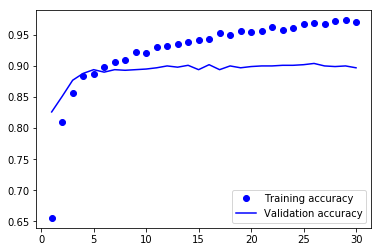

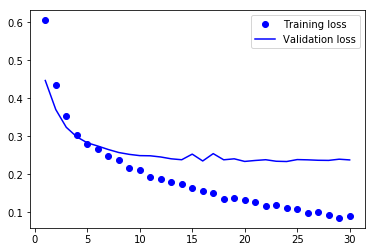

In [45]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()

plt.show()


In [47]:
from keras import models, layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [48]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [50]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [51]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/30


  1/100 [..............................] - ETA: 9:03 - loss: 0.9094 - acc: 0.4000

  2/100 [..............................] - ETA: 7:32 - loss: 0.7730 - acc: 0.5500

  3/100 [..............................] - ETA: 6:54 - loss: 0.7501 - acc: 0.5333

  4/100 [>.............................] - ETA: 6:33 - loss: 0.7102 - acc: 0.5750

  5/100 [>.............................] - ETA: 6:19 - loss: 0.7039 - acc: 0.5800

  6/100 [>.............................] - ETA: 6:09 - loss: 0.7040 - acc: 0.5750

  7/100 [=>............................] - ETA: 6:05 - loss: 0.6958 - acc: 0.5857

  8/100 [=>............................] - ETA: 5:59 - loss: 0.6927 - acc: 0.5750

  9/100 [=>............................] - ETA: 5:52 - loss: 0.6945 - acc: 0.5611

 10/100 [==>...........................] - ETA: 5:48 - loss: 0.6922 - acc: 0.5700

 11/100 [==>...........................] - ETA: 5:45 - loss: 0.6788 - acc: 0.5909

 12/100 [==>...........................] - ETA: 5:42 - loss: 0.6792 - acc: 0.5917

 13/100 [==>...........................] - ETA: 5:39 - loss: 0.6732 - acc: 0.6077

 14/100 [===>..........................] - ETA: 5:35 - loss: 0.6743 - acc: 0.6071

 15/100 [===>..........................] - ETA: 5:32 - loss: 0.6773 - acc: 0.6067

 16/100 [===>..........................] - ETA: 5:28 - loss: 0.6718 - acc: 0.6156

 17/100 [====>.........................] - ETA: 5:25 - loss: 0.6715 - acc: 0.6206

 18/100 [====>.........................] - ETA: 5:21 - loss: 0.6648 - acc: 0.6306

 19/100 [====>.........................] - ETA: 5:17 - loss: 0.6608 - acc: 0.6342

 20/100 [=====>........................] - ETA: 5:14 - loss: 0.6617 - acc: 0.6300

 21/100 [=====>........................] - ETA: 5:10 - loss: 0.6633 - acc: 0.6262

 22/100 [=====>........................] - ETA: 5:06 - loss: 0.6592 - acc: 0.6273

 23/100 [=====>........................] - ETA: 5:02 - loss: 0.6545 - acc: 0.6370

 24/100 [======>.......................] - ETA: 4:59 - loss: 0.6526 - acc: 0.6417

 25/100 [======>.......................] - ETA: 4:55 - loss: 0.6504 - acc: 0.6460

 26/100 [======>.......................] - ETA: 4:51 - loss: 0.6460 - acc: 0.6481

 27/100 [=======>......................] - ETA: 4:47 - loss: 0.6424 - acc: 0.6500

 28/100 [=======>......................] - ETA: 4:43 - loss: 0.6454 - acc: 0.6464

 29/100 [=======>......................] - ETA: 4:39 - loss: 0.6450 - acc: 0.6483

 30/100 [========>.....................] - ETA: 4:36 - loss: 0.6477 - acc: 0.6433

 31/100 [========>.....................] - ETA: 4:32 - loss: 0.6455 - acc: 0.6500

 32/100 [========>.....................] - ETA: 4:28 - loss: 0.6436 - acc: 0.6531

 33/100 [========>.....................] - ETA: 4:24 - loss: 0.6420 - acc: 0.6561

 34/100 [=========>....................] - ETA: 4:20 - loss: 0.6424 - acc: 0.6529

 35/100 [=========>....................] - ETA: 4:16 - loss: 0.6407 - acc: 0.6514

 36/100 [=========>....................] - ETA: 4:12 - loss: 0.6413 - acc: 0.6514

 37/100 [==========>...................] - ETA: 4:08 - loss: 0.6386 - acc: 0.6568

 38/100 [==========>...................] - ETA: 4:04 - loss: 0.6387 - acc: 0.6579

 39/100 [==========>...................] - ETA: 4:00 - loss: 0.6387 - acc: 0.6577

 40/100 [===========>..................] - ETA: 3:56 - loss: 0.6389 - acc: 0.6538

 41/100 [===========>..................] - ETA: 3:53 - loss: 0.6374 - acc: 0.6549

 42/100 [===========>..................] - ETA: 3:49 - loss: 0.6387 - acc: 0.6536

 43/100 [===========>..................] - ETA: 3:45 - loss: 0.6377 - acc: 0.6512

 44/100 [============>.................] - ETA: 3:41 - loss: 0.6405 - acc: 0.6466

 45/100 [============>.................] - ETA: 3:37 - loss: 0.6401 - acc: 0.6478

 46/100 [============>.................] - ETA: 3:33 - loss: 0.6396 - acc: 0.6478

 47/100 [=============>................] - ETA: 3:29 - loss: 0.6398 - acc: 0.6468

 48/100 [=============>................] - ETA: 3:25 - loss: 0.6390 - acc: 0.6469

 49/100 [=============>................] - ETA: 3:21 - loss: 0.6388 - acc: 0.6469

 50/100 [==============>...............] - ETA: 3:17 - loss: 0.6373 - acc: 0.6500

 51/100 [==============>...............] - ETA: 3:13 - loss: 0.6352 - acc: 0.6539

 52/100 [==============>...............] - ETA: 3:09 - loss: 0.6350 - acc: 0.6567

 53/100 [==============>...............] - ETA: 3:05 - loss: 0.6343 - acc: 0.6566

 54/100 [===============>..............] - ETA: 3:01 - loss: 0.6348 - acc: 0.6556

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.6336 - acc: 0.6564

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.6324 - acc: 0.6571

 57/100 [================>.............] - ETA: 2:50 - loss: 0.6327 - acc: 0.6535

 58/100 [================>.............] - ETA: 2:46 - loss: 0.6307 - acc: 0.6569

 59/100 [================>.............] - ETA: 2:42 - loss: 0.6306 - acc: 0.6551

 60/100 [=================>............] - ETA: 2:38 - loss: 0.6293 - acc: 0.6575

 61/100 [=================>............] - ETA: 2:34 - loss: 0.6283 - acc: 0.6598

 62/100 [=================>............] - ETA: 2:30 - loss: 0.6265 - acc: 0.6629

 63/100 [=================>............] - ETA: 2:26 - loss: 0.6265 - acc: 0.6651

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.6255 - acc: 0.6664

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.6232 - acc: 0.6700

 66/100 [==================>...........] - ETA: 2:14 - loss: 0.6231 - acc: 0.6697

 67/100 [===================>..........] - ETA: 2:10 - loss: 0.6228 - acc: 0.6701

 68/100 [===================>..........] - ETA: 2:06 - loss: 0.6217 - acc: 0.6699

 69/100 [===================>..........] - ETA: 2:02 - loss: 0.6210 - acc: 0.6696

 70/100 [====================>.........] - ETA: 1:58 - loss: 0.6207 - acc: 0.6700

 71/100 [====================>.........] - ETA: 1:54 - loss: 0.6197 - acc: 0.6697

 72/100 [====================>.........] - ETA: 1:50 - loss: 0.6192 - acc: 0.6688

 73/100 [====================>.........] - ETA: 1:46 - loss: 0.6192 - acc: 0.6692

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.6183 - acc: 0.6703

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.6180 - acc: 0.6707

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.6171 - acc: 0.6724

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.6155 - acc: 0.6740

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.6141 - acc: 0.6763

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.6126 - acc: 0.6791

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.6115 - acc: 0.6813

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.6094 - acc: 0.6846

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.6070 - acc: 0.6866

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.6066 - acc: 0.6867

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.6047 - acc: 0.6893

 85/100 [========================>.....] - ETA: 59s - loss: 0.6053 - acc: 0.6882 

 86/100 [========================>.....] - ETA: 55s - loss: 0.6049 - acc: 0.6878

 87/100 [=========================>....] - ETA: 51s - loss: 0.6039 - acc: 0.6885

 88/100 [=========================>....] - ETA: 47s - loss: 0.6031 - acc: 0.6892

 89/100 [=========================>....] - ETA: 43s - loss: 0.6018 - acc: 0.6916

 90/100 [==========================>...] - ETA: 39s - loss: 0.5998 - acc: 0.6933

 91/100 [==========================>...] - ETA: 35s - loss: 0.5984 - acc: 0.6951

 92/100 [==========================>...] - ETA: 31s - loss: 0.5976 - acc: 0.6946

 93/100 [==========================>...] - ETA: 27s - loss: 0.5968 - acc: 0.6957

 94/100 [===========================>..] - ETA: 23s - loss: 0.5957 - acc: 0.6973

 95/100 [===========================>..] - ETA: 19s - loss: 0.5949 - acc: 0.6979

 96/100 [===========================>..] - ETA: 15s - loss: 0.5936 - acc: 0.6990

 97/100 [============================>.] - ETA: 11s - loss: 0.5934 - acc: 0.6990

 98/100 [============================>.] - ETA: 7s - loss: 0.5926 - acc: 0.6995 

 99/100 [============================>.] - ETA: 3s - loss: 0.5928 - acc: 0.6995

100/100 [==============================] - 593s 6s/step - loss: 0.5923 - acc: 0.7000 - val_loss: 0.4638 - val_acc: 0.8120


Epoch 2/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.4558 - acc: 0.8500

  2/100 [..............................] - ETA: 6:29 - loss: 0.5049 - acc: 0.8000

  3/100 [..............................] - ETA: 6:25 - loss: 0.5074 - acc: 0.8000

  4/100 [>.............................] - ETA: 6:21 - loss: 0.5017 - acc: 0.7875

  5/100 [>.............................] - ETA: 6:17 - loss: 0.5121 - acc: 0.7800

  6/100 [>.............................] - ETA: 6:13 - loss: 0.5315 - acc: 0.7583

  7/100 [=>............................] - ETA: 6:09 - loss: 0.5246 - acc: 0.7643

  8/100 [=>............................] - ETA: 6:05 - loss: 0.5222 - acc: 0.7563

  9/100 [=>............................] - ETA: 6:01 - loss: 0.5180 - acc: 0.7611

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.5135 - acc: 0.7750

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.5111 - acc: 0.7818

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.5105 - acc: 0.7833

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.5066 - acc: 0.7846

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.5007 - acc: 0.7964

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.5090 - acc: 0.7867

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.5069 - acc: 0.7906

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.5090 - acc: 0.7853

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.5130 - acc: 0.7750

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.5156 - acc: 0.7737

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.5164 - acc: 0.7750

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.5111 - acc: 0.7738

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.5119 - acc: 0.7727

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.5100 - acc: 0.7739

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.5101 - acc: 0.7729

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.5078 - acc: 0.7760

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.5089 - acc: 0.7769

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.5038 - acc: 0.7815

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.4994 - acc: 0.7839

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.4983 - acc: 0.7879

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.4976 - acc: 0.7917

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.4966 - acc: 0.7903

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.4921 - acc: 0.7938

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.4978 - acc: 0.7879

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.4982 - acc: 0.7868

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.4966 - acc: 0.7914

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.4988 - acc: 0.7889

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.4996 - acc: 0.7878

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.5041 - acc: 0.7816

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.5039 - acc: 0.7821

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.5042 - acc: 0.7825

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.5036 - acc: 0.7829

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.5063 - acc: 0.7810

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.5064 - acc: 0.7814

 44/100 [============>.................] - ETA: 3:42 - loss: 0.5058 - acc: 0.7807

 45/100 [============>.................] - ETA: 3:38 - loss: 0.5058 - acc: 0.7811

 46/100 [============>.................] - ETA: 3:34 - loss: 0.5060 - acc: 0.7793

 47/100 [=============>................] - ETA: 3:30 - loss: 0.5075 - acc: 0.7777

 48/100 [=============>................] - ETA: 3:26 - loss: 0.5067 - acc: 0.7781

 49/100 [=============>................] - ETA: 3:22 - loss: 0.5070 - acc: 0.7776

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.5064 - acc: 0.7800

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.5080 - acc: 0.7775

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.5081 - acc: 0.7760

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.5070 - acc: 0.7764

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.5056 - acc: 0.7769

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.5047 - acc: 0.7782

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.5031 - acc: 0.7804

 57/100 [================>.............] - ETA: 2:50 - loss: 0.5038 - acc: 0.7798

 58/100 [================>.............] - ETA: 2:46 - loss: 0.5018 - acc: 0.7810

 59/100 [================>.............] - ETA: 2:43 - loss: 0.5017 - acc: 0.7814

 60/100 [=================>............] - ETA: 2:39 - loss: 0.4997 - acc: 0.7833

 61/100 [=================>............] - ETA: 2:35 - loss: 0.5004 - acc: 0.7820

 62/100 [=================>............] - ETA: 2:31 - loss: 0.5002 - acc: 0.7839

 63/100 [=================>............] - ETA: 2:27 - loss: 0.4995 - acc: 0.7849

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.4978 - acc: 0.7875

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.4967 - acc: 0.7885

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.4955 - acc: 0.7894

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.4945 - acc: 0.7896

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.4954 - acc: 0.7890

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.4952 - acc: 0.7899

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.4930 - acc: 0.7914

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.4918 - acc: 0.7930

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.4912 - acc: 0.7938

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.4901 - acc: 0.7952

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.4899 - acc: 0.7946

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.4911 - acc: 0.7933

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.4913 - acc: 0.7934

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.4911 - acc: 0.7942

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.4911 - acc: 0.7917

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.4898 - acc: 0.7930

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.4892 - acc: 0.7938

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.4894 - acc: 0.7938

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.4894 - acc: 0.7927

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.4896 - acc: 0.7922

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.4896 - acc: 0.7911

 85/100 [========================>.....] - ETA: 59s - loss: 0.4897 - acc: 0.7906 

 86/100 [========================>.....] - ETA: 55s - loss: 0.4886 - acc: 0.7924

 87/100 [=========================>....] - ETA: 51s - loss: 0.4881 - acc: 0.7914

 88/100 [=========================>....] - ETA: 47s - loss: 0.4872 - acc: 0.7915

 89/100 [=========================>....] - ETA: 43s - loss: 0.4880 - acc: 0.7910

 90/100 [==========================>...] - ETA: 39s - loss: 0.4878 - acc: 0.7911

 91/100 [==========================>...] - ETA: 35s - loss: 0.4899 - acc: 0.7874

 92/100 [==========================>...] - ETA: 31s - loss: 0.4896 - acc: 0.7870

 93/100 [==========================>...] - ETA: 27s - loss: 0.4897 - acc: 0.7866

 94/100 [===========================>..] - ETA: 23s - loss: 0.4904 - acc: 0.7851

 95/100 [===========================>..] - ETA: 19s - loss: 0.4911 - acc: 0.7837

 96/100 [===========================>..] - ETA: 15s - loss: 0.4904 - acc: 0.7839

 97/100 [============================>.] - ETA: 11s - loss: 0.4907 - acc: 0.7830

 98/100 [============================>.] - ETA: 7s - loss: 0.4899 - acc: 0.7842 

 99/100 [============================>.] - ETA: 3s - loss: 0.4908 - acc: 0.7838

100/100 [==============================] - 594s 6s/step - loss: 0.4908 - acc: 0.7835 - val_loss: 0.3822 - val_acc: 0.8540


Epoch 3/30


  1/100 [..............................] - ETA: 6:35 - loss: 0.4062 - acc: 0.8500

  2/100 [..............................] - ETA: 6:30 - loss: 0.4144 - acc: 0.8750

  3/100 [..............................] - ETA: 6:26 - loss: 0.4269 - acc: 0.8667

  4/100 [>.............................] - ETA: 6:22 - loss: 0.4476 - acc: 0.8250

  5/100 [>.............................] - ETA: 6:18 - loss: 0.4510 - acc: 0.8100

  6/100 [>.............................] - ETA: 6:14 - loss: 0.4395 - acc: 0.8083

  7/100 [=>............................] - ETA: 6:10 - loss: 0.4294 - acc: 0.8143

  8/100 [=>............................] - ETA: 6:06 - loss: 0.4331 - acc: 0.8188

  9/100 [=>............................] - ETA: 6:02 - loss: 0.4459 - acc: 0.8056

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.4387 - acc: 0.8150

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.4340 - acc: 0.8273

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.4401 - acc: 0.8208

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.4457 - acc: 0.8115

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.4358 - acc: 0.8214

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.4296 - acc: 0.8267

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.4244 - acc: 0.8281

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.4295 - acc: 0.8265

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.4280 - acc: 0.8306

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.4381 - acc: 0.8289

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.4389 - acc: 0.8275

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.4354 - acc: 0.8286

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.4345 - acc: 0.8273

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.4290 - acc: 0.8326

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.4315 - acc: 0.8313

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.4367 - acc: 0.8280

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.4336 - acc: 0.8288

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.4378 - acc: 0.8278

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.4357 - acc: 0.8304

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.4359 - acc: 0.8328

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.4336 - acc: 0.8367

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.4344 - acc: 0.8339

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.4317 - acc: 0.8375

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.4311 - acc: 0.8364

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.4325 - acc: 0.8368

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.4309 - acc: 0.8386

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.4331 - acc: 0.8361

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.4356 - acc: 0.8338

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.4357 - acc: 0.8329

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.4324 - acc: 0.8359

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.4314 - acc: 0.8375

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.4316 - acc: 0.8378

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.4298 - acc: 0.8393

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.4319 - acc: 0.8372

 44/100 [============>.................] - ETA: 3:42 - loss: 0.4322 - acc: 0.8352

 45/100 [============>.................] - ETA: 3:38 - loss: 0.4300 - acc: 0.8367

 46/100 [============>.................] - ETA: 3:34 - loss: 0.4289 - acc: 0.8380

 47/100 [=============>................] - ETA: 3:30 - loss: 0.4332 - acc: 0.8340

 48/100 [=============>................] - ETA: 3:26 - loss: 0.4363 - acc: 0.8302

 49/100 [=============>................] - ETA: 3:22 - loss: 0.4345 - acc: 0.8316

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.4346 - acc: 0.8310

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.4335 - acc: 0.8314

 52/100 [==============>...............] - ETA: 3:11 - loss: 0.4361 - acc: 0.8269

 53/100 [==============>...............] - ETA: 3:07 - loss: 0.4364 - acc: 0.8264

 54/100 [===============>..............] - ETA: 3:03 - loss: 0.4368 - acc: 0.8250

 55/100 [===============>..............] - ETA: 2:59 - loss: 0.4373 - acc: 0.8227

 56/100 [===============>..............] - ETA: 2:55 - loss: 0.4378 - acc: 0.8223

 57/100 [================>.............] - ETA: 2:51 - loss: 0.4373 - acc: 0.8219

 58/100 [================>.............] - ETA: 2:47 - loss: 0.4357 - acc: 0.8233

 59/100 [================>.............] - ETA: 2:43 - loss: 0.4406 - acc: 0.8186

 60/100 [=================>............] - ETA: 2:39 - loss: 0.4391 - acc: 0.8200

 61/100 [=================>............] - ETA: 2:35 - loss: 0.4383 - acc: 0.8205

 62/100 [=================>............] - ETA: 2:31 - loss: 0.4376 - acc: 0.8202

 63/100 [=================>............] - ETA: 2:27 - loss: 0.4368 - acc: 0.8214

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.4373 - acc: 0.8195

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.4362 - acc: 0.8192

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.4390 - acc: 0.8159

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.4394 - acc: 0.8149

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.4383 - acc: 0.8154

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.4359 - acc: 0.8174

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.4380 - acc: 0.8164

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.4384 - acc: 0.8162

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.4375 - acc: 0.8160

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.4385 - acc: 0.8137

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.4381 - acc: 0.8142

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.4373 - acc: 0.8147

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.4383 - acc: 0.8132

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.4377 - acc: 0.8136

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.4372 - acc: 0.8135

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.4383 - acc: 0.8120

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.4391 - acc: 0.8113

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.4384 - acc: 0.8117

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.4380 - acc: 0.8122

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.4389 - acc: 0.8114

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.4401 - acc: 0.8107

 85/100 [========================>.....] - ETA: 59s - loss: 0.4400 - acc: 0.8106 

 86/100 [========================>.....] - ETA: 55s - loss: 0.4399 - acc: 0.8110

 87/100 [=========================>....] - ETA: 51s - loss: 0.4405 - acc: 0.8098

 88/100 [=========================>....] - ETA: 47s - loss: 0.4406 - acc: 0.8102

 89/100 [=========================>....] - ETA: 43s - loss: 0.4397 - acc: 0.8112

 90/100 [==========================>...] - ETA: 39s - loss: 0.4400 - acc: 0.8100

 91/100 [==========================>...] - ETA: 35s - loss: 0.4396 - acc: 0.8099

 92/100 [==========================>...] - ETA: 31s - loss: 0.4379 - acc: 0.8109

 93/100 [==========================>...] - ETA: 27s - loss: 0.4359 - acc: 0.8129

 94/100 [===========================>..] - ETA: 23s - loss: 0.4363 - acc: 0.8128

 95/100 [===========================>..] - ETA: 19s - loss: 0.4364 - acc: 0.8126

 96/100 [===========================>..] - ETA: 15s - loss: 0.4370 - acc: 0.8125

 97/100 [============================>.] - ETA: 11s - loss: 0.4380 - acc: 0.8119

 98/100 [============================>.] - ETA: 7s - loss: 0.4397 - acc: 0.8097 

 99/100 [============================>.] - ETA: 3s - loss: 0.4394 - acc: 0.8101

100/100 [==============================] - 596s 6s/step - loss: 0.4389 - acc: 0.8105 - val_loss: 0.3570 - val_acc: 0.8470


Epoch 4/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.4387 - acc: 0.9000

  2/100 [..............................] - ETA: 6:30 - loss: 0.4496 - acc: 0.8500

  3/100 [..............................] - ETA: 6:26 - loss: 0.4436 - acc: 0.8167

  4/100 [>.............................] - ETA: 6:22 - loss: 0.4619 - acc: 0.8000

  5/100 [>.............................] - ETA: 6:18 - loss: 0.4479 - acc: 0.8000

  6/100 [>.............................] - ETA: 6:14 - loss: 0.4483 - acc: 0.8000

  7/100 [=>............................] - ETA: 6:10 - loss: 0.4516 - acc: 0.7929

  8/100 [=>............................] - ETA: 6:05 - loss: 0.4390 - acc: 0.8000

  9/100 [=>............................] - ETA: 6:02 - loss: 0.4220 - acc: 0.8056

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.4256 - acc: 0.7950

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.4215 - acc: 0.8000

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.4248 - acc: 0.7917

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.4213 - acc: 0.7962

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.4167 - acc: 0.8036

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.4169 - acc: 0.8067

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.4097 - acc: 0.8125

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.4167 - acc: 0.8118

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.4190 - acc: 0.8028

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.4208 - acc: 0.8026

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.4221 - acc: 0.8000

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.4255 - acc: 0.7976

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.4277 - acc: 0.7932

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.4239 - acc: 0.7957

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.4267 - acc: 0.7938

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.4347 - acc: 0.7880

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.4320 - acc: 0.7942

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.4318 - acc: 0.7963

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.4294 - acc: 0.8000

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.4288 - acc: 0.7983

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.4360 - acc: 0.7950

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.4409 - acc: 0.7887

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.4374 - acc: 0.7906

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.4361 - acc: 0.7924

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.4341 - acc: 0.7941

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.4320 - acc: 0.7957

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.4301 - acc: 0.8000

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.4302 - acc: 0.7973

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.4306 - acc: 0.7961

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.4282 - acc: 0.7974

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.4260 - acc: 0.7988

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.4276 - acc: 0.7976

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.4222 - acc: 0.8024

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.4185 - acc: 0.8047

 44/100 [============>.................] - ETA: 3:42 - loss: 0.4166 - acc: 0.8068

 45/100 [============>.................] - ETA: 3:38 - loss: 0.4169 - acc: 0.8056

 46/100 [============>.................] - ETA: 3:34 - loss: 0.4144 - acc: 0.8076

 47/100 [=============>................] - ETA: 3:30 - loss: 0.4142 - acc: 0.8064

 48/100 [=============>................] - ETA: 3:26 - loss: 0.4137 - acc: 0.8073

 49/100 [=============>................] - ETA: 3:22 - loss: 0.4127 - acc: 0.8092

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.4144 - acc: 0.8070

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.4154 - acc: 0.8078

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.4151 - acc: 0.8077

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.4131 - acc: 0.8094

 54/100 [===============>..............] - ETA: 3:03 - loss: 0.4137 - acc: 0.8083

 55/100 [===============>..............] - ETA: 2:59 - loss: 0.4124 - acc: 0.8109

 56/100 [===============>..............] - ETA: 2:55 - loss: 0.4117 - acc: 0.8125

 57/100 [================>.............] - ETA: 2:51 - loss: 0.4104 - acc: 0.8132

 58/100 [================>.............] - ETA: 2:47 - loss: 0.4106 - acc: 0.8129

 59/100 [================>.............] - ETA: 2:43 - loss: 0.4113 - acc: 0.8136

 60/100 [=================>............] - ETA: 2:39 - loss: 0.4111 - acc: 0.8142

 61/100 [=================>............] - ETA: 2:35 - loss: 0.4098 - acc: 0.8156

 62/100 [=================>............] - ETA: 2:31 - loss: 0.4090 - acc: 0.8161

 63/100 [=================>............] - ETA: 2:27 - loss: 0.4086 - acc: 0.8167

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.4066 - acc: 0.8188

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.4070 - acc: 0.8185

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.4070 - acc: 0.8174

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.4069 - acc: 0.8187

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.4054 - acc: 0.8191

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.4056 - acc: 0.8196

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.4048 - acc: 0.8193

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.4052 - acc: 0.8190

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.4050 - acc: 0.8201

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.4025 - acc: 0.8219

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.4024 - acc: 0.8209

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.4034 - acc: 0.8207

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.4045 - acc: 0.8197

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.4040 - acc: 0.8208

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.4048 - acc: 0.8199

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.4032 - acc: 0.8203

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.4023 - acc: 0.8200

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.4026 - acc: 0.8204

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.4035 - acc: 0.8195

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.4054 - acc: 0.8181

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.4081 - acc: 0.8167

 85/100 [========================>.....] - ETA: 59s - loss: 0.4072 - acc: 0.8171 

 86/100 [========================>.....] - ETA: 55s - loss: 0.4065 - acc: 0.8174

 87/100 [=========================>....] - ETA: 51s - loss: 0.4065 - acc: 0.8178

 88/100 [=========================>....] - ETA: 47s - loss: 0.4086 - acc: 0.8153

 89/100 [=========================>....] - ETA: 43s - loss: 0.4091 - acc: 0.8152

 90/100 [==========================>...] - ETA: 39s - loss: 0.4079 - acc: 0.8167

 91/100 [==========================>...] - ETA: 35s - loss: 0.4062 - acc: 0.8187

 92/100 [==========================>...] - ETA: 31s - loss: 0.4051 - acc: 0.8201

 93/100 [==========================>...] - ETA: 27s - loss: 0.4050 - acc: 0.8210

 94/100 [===========================>..] - ETA: 23s - loss: 0.4037 - acc: 0.8223

 95/100 [===========================>..] - ETA: 19s - loss: 0.4027 - acc: 0.8226

 96/100 [===========================>..] - ETA: 15s - loss: 0.4027 - acc: 0.8224

 97/100 [============================>.] - ETA: 11s - loss: 0.4018 - acc: 0.8227

 98/100 [============================>.] - ETA: 7s - loss: 0.4011 - acc: 0.8230 

 99/100 [============================>.] - ETA: 3s - loss: 0.4016 - acc: 0.8227

100/100 [==============================] - 594s 6s/step - loss: 0.4017 - acc: 0.8230 - val_loss: 0.3133 - val_acc: 0.8870


Epoch 5/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.2940 - acc: 0.8500

  2/100 [..............................] - ETA: 6:30 - loss: 0.2716 - acc: 0.8500

  3/100 [..............................] - ETA: 6:26 - loss: 0.3247 - acc: 0.8000

  4/100 [>.............................] - ETA: 6:22 - loss: 0.3302 - acc: 0.8125

  5/100 [>.............................] - ETA: 6:17 - loss: 0.3465 - acc: 0.8200

  6/100 [>.............................] - ETA: 6:13 - loss: 0.3344 - acc: 0.8250

  7/100 [=>............................] - ETA: 6:09 - loss: 0.3525 - acc: 0.8214

  8/100 [=>............................] - ETA: 6:05 - loss: 0.3456 - acc: 0.8250

  9/100 [=>............................] - ETA: 6:01 - loss: 0.3695 - acc: 0.8167

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.3956 - acc: 0.7900

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.3850 - acc: 0.8045

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.4008 - acc: 0.8000

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.3971 - acc: 0.8038

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.3865 - acc: 0.8071

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.3793 - acc: 0.8133

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3729 - acc: 0.8188

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3715 - acc: 0.8147

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.3753 - acc: 0.8139

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.3799 - acc: 0.8105

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.3807 - acc: 0.8075

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.3830 - acc: 0.8071

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3850 - acc: 0.8068

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3793 - acc: 0.8152

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3757 - acc: 0.8208

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3827 - acc: 0.8140

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3866 - acc: 0.8135

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3893 - acc: 0.8130

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3868 - acc: 0.8179

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3880 - acc: 0.8172

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3834 - acc: 0.8217

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3812 - acc: 0.8210

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3799 - acc: 0.8203

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3792 - acc: 0.8227

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3788 - acc: 0.8265

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3752 - acc: 0.8314

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3798 - acc: 0.8278

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3772 - acc: 0.8297

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3772 - acc: 0.8316

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3751 - acc: 0.8333

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3750 - acc: 0.8325

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3725 - acc: 0.8354

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3708 - acc: 0.8381

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3684 - acc: 0.8395

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3673 - acc: 0.8398

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3662 - acc: 0.8411

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3710 - acc: 0.8380

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3731 - acc: 0.8351

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3705 - acc: 0.8365

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3701 - acc: 0.8367

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3749 - acc: 0.8330

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3789 - acc: 0.8304

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3780 - acc: 0.8308

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3768 - acc: 0.8302

 54/100 [===============>..............] - ETA: 3:03 - loss: 0.3765 - acc: 0.8296

 55/100 [===============>..............] - ETA: 2:59 - loss: 0.3763 - acc: 0.8300

 56/100 [===============>..............] - ETA: 2:55 - loss: 0.3764 - acc: 0.8295

 57/100 [================>.............] - ETA: 2:51 - loss: 0.3745 - acc: 0.8298

 58/100 [================>.............] - ETA: 2:47 - loss: 0.3757 - acc: 0.8293

 59/100 [================>.............] - ETA: 2:43 - loss: 0.3753 - acc: 0.8297

 60/100 [=================>............] - ETA: 2:39 - loss: 0.3778 - acc: 0.8292

 61/100 [=================>............] - ETA: 2:35 - loss: 0.3769 - acc: 0.8295

 62/100 [=================>............] - ETA: 2:31 - loss: 0.3762 - acc: 0.8306

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3760 - acc: 0.8310

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3795 - acc: 0.8281

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3799 - acc: 0.8269

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3779 - acc: 0.8280

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3781 - acc: 0.8284

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3793 - acc: 0.8272

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3800 - acc: 0.8261

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3798 - acc: 0.8264

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3784 - acc: 0.8268

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3768 - acc: 0.8285

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3757 - acc: 0.8295

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3730 - acc: 0.8318

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3747 - acc: 0.8300

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3736 - acc: 0.8316

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3722 - acc: 0.8325

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3728 - acc: 0.8321

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3747 - acc: 0.8310

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3737 - acc: 0.8325

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3726 - acc: 0.8327

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3744 - acc: 0.8311

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3749 - acc: 0.8313

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3740 - acc: 0.8321

 85/100 [========================>.....] - ETA: 59s - loss: 0.3759 - acc: 0.8312 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3767 - acc: 0.8314

 87/100 [=========================>....] - ETA: 51s - loss: 0.3768 - acc: 0.8299

 88/100 [=========================>....] - ETA: 47s - loss: 0.3765 - acc: 0.8307

 89/100 [=========================>....] - ETA: 43s - loss: 0.3749 - acc: 0.8320

 90/100 [==========================>...] - ETA: 39s - loss: 0.3737 - acc: 0.8328

 91/100 [==========================>...] - ETA: 35s - loss: 0.3735 - acc: 0.8330

 92/100 [==========================>...] - ETA: 31s - loss: 0.3732 - acc: 0.8326

 93/100 [==========================>...] - ETA: 27s - loss: 0.3741 - acc: 0.8323

 94/100 [===========================>..] - ETA: 23s - loss: 0.3751 - acc: 0.8309

 95/100 [===========================>..] - ETA: 19s - loss: 0.3746 - acc: 0.8305

 96/100 [===========================>..] - ETA: 15s - loss: 0.3738 - acc: 0.8313

 97/100 [============================>.] - ETA: 11s - loss: 0.3725 - acc: 0.8325

 98/100 [============================>.] - ETA: 7s - loss: 0.3724 - acc: 0.8321 

 99/100 [============================>.] - ETA: 3s - loss: 0.3729 - acc: 0.8313

100/100 [==============================] - 594s 6s/step - loss: 0.3728 - acc: 0.8320 - val_loss: 0.3188 - val_acc: 0.8550


Epoch 6/30


  1/100 [..............................] - ETA: 6:35 - loss: 0.5940 - acc: 0.7000

  2/100 [..............................] - ETA: 6:30 - loss: 0.3964 - acc: 0.8250

  3/100 [..............................] - ETA: 6:26 - loss: 0.4097 - acc: 0.8167

  4/100 [>.............................] - ETA: 6:22 - loss: 0.4267 - acc: 0.8000

  5/100 [>.............................] - ETA: 6:18 - loss: 0.4071 - acc: 0.8100

  6/100 [>.............................] - ETA: 6:14 - loss: 0.4236 - acc: 0.8000

  7/100 [=>............................] - ETA: 6:09 - loss: 0.4291 - acc: 0.7929

  8/100 [=>............................] - ETA: 6:06 - loss: 0.4320 - acc: 0.7875

  9/100 [=>............................] - ETA: 6:01 - loss: 0.4352 - acc: 0.7889

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.4226 - acc: 0.8000

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.4130 - acc: 0.8045

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.4054 - acc: 0.8083

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.3945 - acc: 0.8192

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.3865 - acc: 0.8286

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.3813 - acc: 0.8300

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3788 - acc: 0.8313

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3755 - acc: 0.8294

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.3862 - acc: 0.8278

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.3844 - acc: 0.8263

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.3763 - acc: 0.8325

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.3738 - acc: 0.8333

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3810 - acc: 0.8273

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3732 - acc: 0.8348

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3724 - acc: 0.8375

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3718 - acc: 0.8340

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3754 - acc: 0.8327

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3703 - acc: 0.8370

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3687 - acc: 0.8375

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3733 - acc: 0.8345

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3720 - acc: 0.8350

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3749 - acc: 0.8339

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3749 - acc: 0.8328

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3763 - acc: 0.8303

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3725 - acc: 0.8324

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3712 - acc: 0.8329

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3679 - acc: 0.8375

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3673 - acc: 0.8378

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3673 - acc: 0.8368

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3664 - acc: 0.8372

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3631 - acc: 0.8388

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3641 - acc: 0.8390

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3654 - acc: 0.8393

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3654 - acc: 0.8407

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3623 - acc: 0.8432

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3650 - acc: 0.8411

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3654 - acc: 0.8402

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3629 - acc: 0.8426

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3624 - acc: 0.8417

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3614 - acc: 0.8429

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3617 - acc: 0.8420

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3598 - acc: 0.8441

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3583 - acc: 0.8462

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3569 - acc: 0.8481

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3565 - acc: 0.8491

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3563 - acc: 0.8482

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3567 - acc: 0.8473

 57/100 [================>.............] - ETA: 2:50 - loss: 0.3548 - acc: 0.8482

 58/100 [================>.............] - ETA: 2:46 - loss: 0.3525 - acc: 0.8500

 59/100 [================>.............] - ETA: 2:43 - loss: 0.3509 - acc: 0.8508

 60/100 [=================>............] - ETA: 2:39 - loss: 0.3531 - acc: 0.8508

 61/100 [=================>............] - ETA: 2:35 - loss: 0.3520 - acc: 0.8533

 62/100 [=================>............] - ETA: 2:31 - loss: 0.3517 - acc: 0.8540

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3541 - acc: 0.8524

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3533 - acc: 0.8516

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3536 - acc: 0.8508

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3533 - acc: 0.8515

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3517 - acc: 0.8530

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3547 - acc: 0.8515

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3533 - acc: 0.8522

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3522 - acc: 0.8536

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3521 - acc: 0.8535

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3560 - acc: 0.8528

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3562 - acc: 0.8527

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3551 - acc: 0.8534

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3551 - acc: 0.8527

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3556 - acc: 0.8520

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3561 - acc: 0.8519

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3552 - acc: 0.8519

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3550 - acc: 0.8525

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3550 - acc: 0.8531

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3539 - acc: 0.8549

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3547 - acc: 0.8549

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3545 - acc: 0.8548

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3522 - acc: 0.8565

 85/100 [========================>.....] - ETA: 59s - loss: 0.3534 - acc: 0.8547 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3541 - acc: 0.8541

 87/100 [=========================>....] - ETA: 51s - loss: 0.3534 - acc: 0.8552

 88/100 [=========================>....] - ETA: 47s - loss: 0.3525 - acc: 0.8551

 89/100 [=========================>....] - ETA: 43s - loss: 0.3514 - acc: 0.8562

 90/100 [==========================>...] - ETA: 39s - loss: 0.3508 - acc: 0.8561

 91/100 [==========================>...] - ETA: 35s - loss: 0.3499 - acc: 0.8566

 92/100 [==========================>...] - ETA: 31s - loss: 0.3502 - acc: 0.8565

 93/100 [==========================>...] - ETA: 27s - loss: 0.3498 - acc: 0.8575

 94/100 [===========================>..] - ETA: 23s - loss: 0.3503 - acc: 0.8574

 95/100 [===========================>..] - ETA: 19s - loss: 0.3498 - acc: 0.8579

 96/100 [===========================>..] - ETA: 15s - loss: 0.3489 - acc: 0.8583

 97/100 [============================>.] - ETA: 11s - loss: 0.3504 - acc: 0.8572

 98/100 [============================>.] - ETA: 7s - loss: 0.3505 - acc: 0.8577 

 99/100 [============================>.] - ETA: 3s - loss: 0.3526 - acc: 0.8561

100/100 [==============================] - 594s 6s/step - loss: 0.3533 - acc: 0.8555 - val_loss: 0.2857 - val_acc: 0.8870


Epoch 7/30


  1/100 [..............................] - ETA: 6:35 - loss: 0.3737 - acc: 0.8000

  2/100 [..............................] - ETA: 6:31 - loss: 0.3565 - acc: 0.7750

  3/100 [..............................] - ETA: 6:26 - loss: 0.3492 - acc: 0.8167

  4/100 [>.............................] - ETA: 6:22 - loss: 0.3517 - acc: 0.8250

  5/100 [>.............................] - ETA: 6:18 - loss: 0.3481 - acc: 0.8400

  6/100 [>.............................] - ETA: 6:14 - loss: 0.3814 - acc: 0.8250

  7/100 [=>............................] - ETA: 6:10 - loss: 0.3660 - acc: 0.8357

  8/100 [=>............................] - ETA: 6:06 - loss: 0.3860 - acc: 0.8125

  9/100 [=>............................] - ETA: 6:02 - loss: 0.3900 - acc: 0.8111

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.3857 - acc: 0.8150

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.4121 - acc: 0.7909

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.4020 - acc: 0.8000

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.3923 - acc: 0.8077

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.3865 - acc: 0.8179

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.3928 - acc: 0.8133

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3892 - acc: 0.8156

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3858 - acc: 0.8176

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.3823 - acc: 0.8194

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.3837 - acc: 0.8158

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.3863 - acc: 0.8125

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.3902 - acc: 0.8143

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3870 - acc: 0.8159

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3847 - acc: 0.8174

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3798 - acc: 0.8208

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3783 - acc: 0.8240

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3732 - acc: 0.8288

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3760 - acc: 0.8278

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3742 - acc: 0.8304

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3764 - acc: 0.8259

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3784 - acc: 0.8233

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3737 - acc: 0.8274

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3709 - acc: 0.8297

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3735 - acc: 0.8303

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3712 - acc: 0.8309

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3718 - acc: 0.8286

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3680 - acc: 0.8319

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3704 - acc: 0.8324

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3690 - acc: 0.8316

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3657 - acc: 0.8346

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3679 - acc: 0.8338

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3722 - acc: 0.8329

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3710 - acc: 0.8333

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3708 - acc: 0.8337

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3714 - acc: 0.8330

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3688 - acc: 0.8356

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3652 - acc: 0.8380

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3611 - acc: 0.8404

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3568 - acc: 0.8438

 49/100 [=============>................] - ETA: 3:23 - loss: 0.3574 - acc: 0.8439

 50/100 [==============>...............] - ETA: 3:19 - loss: 0.3557 - acc: 0.8450

 51/100 [==============>...............] - ETA: 3:15 - loss: 0.3539 - acc: 0.8471

 52/100 [==============>...............] - ETA: 3:11 - loss: 0.3513 - acc: 0.8490

 53/100 [==============>...............] - ETA: 3:07 - loss: 0.3512 - acc: 0.8462

 54/100 [===============>..............] - ETA: 3:03 - loss: 0.3535 - acc: 0.8463

 55/100 [===============>..............] - ETA: 2:59 - loss: 0.3542 - acc: 0.8455

 56/100 [===============>..............] - ETA: 2:55 - loss: 0.3560 - acc: 0.8446

 57/100 [================>.............] - ETA: 2:51 - loss: 0.3535 - acc: 0.8465

 58/100 [================>.............] - ETA: 2:47 - loss: 0.3548 - acc: 0.8457

 59/100 [================>.............] - ETA: 2:43 - loss: 0.3561 - acc: 0.8466

 60/100 [=================>............] - ETA: 2:39 - loss: 0.3567 - acc: 0.8450

 61/100 [=================>............] - ETA: 2:35 - loss: 0.3570 - acc: 0.8443

 62/100 [=================>............] - ETA: 2:31 - loss: 0.3576 - acc: 0.8427

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3593 - acc: 0.8421

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3568 - acc: 0.8445

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3601 - acc: 0.8438

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3616 - acc: 0.8439

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3631 - acc: 0.8418

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3646 - acc: 0.8419

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3659 - acc: 0.8420

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3655 - acc: 0.8429

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3659 - acc: 0.8423

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3663 - acc: 0.8424

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3645 - acc: 0.8438

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3660 - acc: 0.8426

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3642 - acc: 0.8427

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3627 - acc: 0.8441

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3610 - acc: 0.8461

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3620 - acc: 0.8455

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3596 - acc: 0.8475

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3597 - acc: 0.8475

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3604 - acc: 0.8469

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3596 - acc: 0.8470

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3582 - acc: 0.8470

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3608 - acc: 0.8458

 85/100 [========================>.....] - ETA: 59s - loss: 0.3594 - acc: 0.8471 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3591 - acc: 0.8471

 87/100 [=========================>....] - ETA: 51s - loss: 0.3591 - acc: 0.8483

 88/100 [=========================>....] - ETA: 47s - loss: 0.3584 - acc: 0.8483

 89/100 [=========================>....] - ETA: 43s - loss: 0.3578 - acc: 0.8489

 90/100 [==========================>...] - ETA: 39s - loss: 0.3589 - acc: 0.8483

 91/100 [==========================>...] - ETA: 35s - loss: 0.3595 - acc: 0.8478

 92/100 [==========================>...] - ETA: 31s - loss: 0.3601 - acc: 0.8462

 93/100 [==========================>...] - ETA: 27s - loss: 0.3605 - acc: 0.8462

 94/100 [===========================>..] - ETA: 23s - loss: 0.3613 - acc: 0.8447

 95/100 [===========================>..] - ETA: 19s - loss: 0.3604 - acc: 0.8458

 96/100 [===========================>..] - ETA: 15s - loss: 0.3597 - acc: 0.8464

 97/100 [============================>.] - ETA: 11s - loss: 0.3590 - acc: 0.8459

 98/100 [============================>.] - ETA: 7s - loss: 0.3588 - acc: 0.8454 

 99/100 [============================>.] - ETA: 3s - loss: 0.3600 - acc: 0.8444

100/100 [==============================] - 594s 6s/step - loss: 0.3602 - acc: 0.8445 - val_loss: 0.2784 - val_acc: 0.8860


Epoch 8/30


  1/100 [..............................] - ETA: 6:35 - loss: 0.3653 - acc: 0.7500

  2/100 [..............................] - ETA: 6:31 - loss: 0.3331 - acc: 0.8000

  3/100 [..............................] - ETA: 6:26 - loss: 0.3338 - acc: 0.8167

  4/100 [>.............................] - ETA: 6:22 - loss: 0.3165 - acc: 0.8375

  5/100 [>.............................] - ETA: 6:18 - loss: 0.3377 - acc: 0.8400

  6/100 [>.............................] - ETA: 6:14 - loss: 0.3405 - acc: 0.8417

  7/100 [=>............................] - ETA: 6:10 - loss: 0.3367 - acc: 0.8357

  8/100 [=>............................] - ETA: 6:06 - loss: 0.3436 - acc: 0.8313

  9/100 [=>............................] - ETA: 6:02 - loss: 0.3414 - acc: 0.8333

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.3565 - acc: 0.8250

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.3665 - acc: 0.8182

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.3839 - acc: 0.8042

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.3766 - acc: 0.8038

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.3689 - acc: 0.8107

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.3728 - acc: 0.8067

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3711 - acc: 0.8094

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3646 - acc: 0.8147

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.3597 - acc: 0.8194

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.3633 - acc: 0.8158

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.3726 - acc: 0.8150

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.3810 - acc: 0.8071

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3758 - acc: 0.8114

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3774 - acc: 0.8130

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3690 - acc: 0.8188

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3603 - acc: 0.8260

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3614 - acc: 0.8288

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3590 - acc: 0.8315

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3656 - acc: 0.8232

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3684 - acc: 0.8207

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3673 - acc: 0.8217

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3683 - acc: 0.8210

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3627 - acc: 0.8266

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3675 - acc: 0.8242

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3638 - acc: 0.8279

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3612 - acc: 0.8314

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3586 - acc: 0.8319

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3589 - acc: 0.8297

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3548 - acc: 0.8329

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3594 - acc: 0.8308

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3565 - acc: 0.8325

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3552 - acc: 0.8329

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3528 - acc: 0.8357

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3539 - acc: 0.8349

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3520 - acc: 0.8352

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3512 - acc: 0.8356

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3520 - acc: 0.8337

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3540 - acc: 0.8319

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3550 - acc: 0.8323

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3537 - acc: 0.8337

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3503 - acc: 0.8370

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3504 - acc: 0.8373

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3541 - acc: 0.8346

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3520 - acc: 0.8358

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3531 - acc: 0.8361

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3509 - acc: 0.8382

 56/100 [===============>..............] - ETA: 2:55 - loss: 0.3507 - acc: 0.8384

 57/100 [================>.............] - ETA: 2:51 - loss: 0.3505 - acc: 0.8377

 58/100 [================>.............] - ETA: 2:47 - loss: 0.3487 - acc: 0.8397

 59/100 [================>.............] - ETA: 2:43 - loss: 0.3480 - acc: 0.8398

 60/100 [=================>............] - ETA: 2:39 - loss: 0.3503 - acc: 0.8400

 61/100 [=================>............] - ETA: 2:35 - loss: 0.3522 - acc: 0.8385

 62/100 [=================>............] - ETA: 2:31 - loss: 0.3519 - acc: 0.8387

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3501 - acc: 0.8413

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3489 - acc: 0.8430

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3512 - acc: 0.8415

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3517 - acc: 0.8409

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3500 - acc: 0.8418

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3488 - acc: 0.8426

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3488 - acc: 0.8428

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3486 - acc: 0.8436

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3503 - acc: 0.8423

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3522 - acc: 0.8417

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3534 - acc: 0.8404

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3544 - acc: 0.8405

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3537 - acc: 0.8413

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3541 - acc: 0.8408

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3536 - acc: 0.8416

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3532 - acc: 0.8417

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3510 - acc: 0.8430

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3541 - acc: 0.8406

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3528 - acc: 0.8426

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3528 - acc: 0.8433

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3518 - acc: 0.8446

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3504 - acc: 0.8458

 85/100 [========================>.....] - ETA: 59s - loss: 0.3496 - acc: 0.8465 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3478 - acc: 0.8483

 87/100 [=========================>....] - ETA: 51s - loss: 0.3461 - acc: 0.8494

 88/100 [=========================>....] - ETA: 47s - loss: 0.3453 - acc: 0.8500

 89/100 [=========================>....] - ETA: 43s - loss: 0.3456 - acc: 0.8500

 90/100 [==========================>...] - ETA: 39s - loss: 0.3467 - acc: 0.8483

 91/100 [==========================>...] - ETA: 35s - loss: 0.3461 - acc: 0.8489

 92/100 [==========================>...] - ETA: 31s - loss: 0.3466 - acc: 0.8495

 93/100 [==========================>...] - ETA: 27s - loss: 0.3459 - acc: 0.8505

 94/100 [===========================>..] - ETA: 23s - loss: 0.3481 - acc: 0.8505

 95/100 [===========================>..] - ETA: 19s - loss: 0.3485 - acc: 0.8489

 96/100 [===========================>..] - ETA: 15s - loss: 0.3477 - acc: 0.8495

 97/100 [============================>.] - ETA: 11s - loss: 0.3484 - acc: 0.8485

 98/100 [============================>.] - ETA: 7s - loss: 0.3471 - acc: 0.8495 

 99/100 [============================>.] - ETA: 3s - loss: 0.3464 - acc: 0.8495

100/100 [==============================] - 594s 6s/step - loss: 0.3460 - acc: 0.8505 - val_loss: 0.2693 - val_acc: 0.8900


Epoch 9/30


  1/100 [..............................] - ETA: 6:35 - loss: 0.4464 - acc: 0.8000

  2/100 [..............................] - ETA: 6:30 - loss: 0.3672 - acc: 0.8250

  3/100 [..............................] - ETA: 6:26 - loss: 0.4187 - acc: 0.8167

  4/100 [>.............................] - ETA: 6:23 - loss: 0.4194 - acc: 0.8000

  5/100 [>.............................] - ETA: 6:19 - loss: 0.4639 - acc: 0.7600

  6/100 [>.............................] - ETA: 6:15 - loss: 0.4283 - acc: 0.7833

  7/100 [=>............................] - ETA: 6:10 - loss: 0.4256 - acc: 0.7786

  8/100 [=>............................] - ETA: 6:06 - loss: 0.4095 - acc: 0.7938

  9/100 [=>............................] - ETA: 6:02 - loss: 0.4242 - acc: 0.7778

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.4014 - acc: 0.7950

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.3964 - acc: 0.8000

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.3989 - acc: 0.7958

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.3907 - acc: 0.8038

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.3939 - acc: 0.8036

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.4000 - acc: 0.8000

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3990 - acc: 0.8000

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3907 - acc: 0.8029

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.3790 - acc: 0.8139

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.3740 - acc: 0.8184

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.3712 - acc: 0.8175

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.3632 - acc: 0.8238

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3692 - acc: 0.8182

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3620 - acc: 0.8261

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3591 - acc: 0.8271

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3509 - acc: 0.8320

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3445 - acc: 0.8365

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3390 - acc: 0.8407

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3333 - acc: 0.8464

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3360 - acc: 0.8466

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3381 - acc: 0.8433

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3354 - acc: 0.8435

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3338 - acc: 0.8453

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3385 - acc: 0.8424

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3457 - acc: 0.8382

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3427 - acc: 0.8414

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3479 - acc: 0.8389

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3437 - acc: 0.8419

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3431 - acc: 0.8421

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3497 - acc: 0.8385

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3548 - acc: 0.8362

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3567 - acc: 0.8354

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3547 - acc: 0.8369

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3538 - acc: 0.8372

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3516 - acc: 0.8398

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3461 - acc: 0.8433

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3438 - acc: 0.8457

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3440 - acc: 0.8457

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3436 - acc: 0.8458

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3435 - acc: 0.8459

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3467 - acc: 0.8450

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3468 - acc: 0.8471

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3459 - acc: 0.8471

 53/100 [==============>...............] - ETA: 3:07 - loss: 0.3478 - acc: 0.8453

 54/100 [===============>..............] - ETA: 3:03 - loss: 0.3486 - acc: 0.8454

 55/100 [===============>..............] - ETA: 2:59 - loss: 0.3492 - acc: 0.8436

 56/100 [===============>..............] - ETA: 2:55 - loss: 0.3499 - acc: 0.8438

 57/100 [================>.............] - ETA: 2:51 - loss: 0.3524 - acc: 0.8421

 58/100 [================>.............] - ETA: 2:47 - loss: 0.3521 - acc: 0.8414

 59/100 [================>.............] - ETA: 2:43 - loss: 0.3534 - acc: 0.8407

 60/100 [=================>............] - ETA: 2:39 - loss: 0.3546 - acc: 0.8392

 61/100 [=================>............] - ETA: 2:35 - loss: 0.3561 - acc: 0.8385

 62/100 [=================>............] - ETA: 2:31 - loss: 0.3549 - acc: 0.8395

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3547 - acc: 0.8397

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3561 - acc: 0.8375

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3545 - acc: 0.8392

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3542 - acc: 0.8402

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3546 - acc: 0.8403

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3548 - acc: 0.8397

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3547 - acc: 0.8399

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3556 - acc: 0.8386

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3559 - acc: 0.8387

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3582 - acc: 0.8368

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3576 - acc: 0.8363

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3572 - acc: 0.8365

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3567 - acc: 0.8360

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3551 - acc: 0.8368

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3550 - acc: 0.8370

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3526 - acc: 0.8385

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3520 - acc: 0.8392

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3520 - acc: 0.8394

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3519 - acc: 0.8395

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3522 - acc: 0.8402

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3546 - acc: 0.8404

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3530 - acc: 0.8417

 85/100 [========================>.....] - ETA: 59s - loss: 0.3527 - acc: 0.8412 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3531 - acc: 0.8413

 87/100 [=========================>....] - ETA: 51s - loss: 0.3534 - acc: 0.8408

 88/100 [=========================>....] - ETA: 47s - loss: 0.3529 - acc: 0.8415

 89/100 [=========================>....] - ETA: 43s - loss: 0.3519 - acc: 0.8427

 90/100 [==========================>...] - ETA: 39s - loss: 0.3514 - acc: 0.8422

 91/100 [==========================>...] - ETA: 35s - loss: 0.3509 - acc: 0.8429

 92/100 [==========================>...] - ETA: 31s - loss: 0.3500 - acc: 0.8440

 93/100 [==========================>...] - ETA: 27s - loss: 0.3487 - acc: 0.8446

 94/100 [===========================>..] - ETA: 23s - loss: 0.3481 - acc: 0.8457

 95/100 [===========================>..] - ETA: 19s - loss: 0.3472 - acc: 0.8463

 96/100 [===========================>..] - ETA: 15s - loss: 0.3460 - acc: 0.8474

 97/100 [============================>.] - ETA: 11s - loss: 0.3466 - acc: 0.8469

 98/100 [============================>.] - ETA: 7s - loss: 0.3479 - acc: 0.8464 

 99/100 [============================>.] - ETA: 3s - loss: 0.3469 - acc: 0.8475

100/100 [==============================] - 594s 6s/step - loss: 0.3471 - acc: 0.8485 - val_loss: 0.2705 - val_acc: 0.8850


Epoch 10/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.2520 - acc: 0.9000

  2/100 [..............................] - ETA: 6:29 - loss: 0.3107 - acc: 0.9000

  3/100 [..............................] - ETA: 6:26 - loss: 0.3224 - acc: 0.8833

  4/100 [>.............................] - ETA: 6:22 - loss: 0.2898 - acc: 0.9000

  5/100 [>.............................] - ETA: 6:18 - loss: 0.3242 - acc: 0.8800

  6/100 [>.............................] - ETA: 6:14 - loss: 0.3569 - acc: 0.8417

  7/100 [=>............................] - ETA: 6:10 - loss: 0.3651 - acc: 0.8357

  8/100 [=>............................] - ETA: 6:06 - loss: 0.3625 - acc: 0.8375

  9/100 [=>............................] - ETA: 6:02 - loss: 0.3496 - acc: 0.8500

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.3364 - acc: 0.8600

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.3187 - acc: 0.8727

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.3064 - acc: 0.8833

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.3107 - acc: 0.8808

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.3038 - acc: 0.8821

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.3096 - acc: 0.8767

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3014 - acc: 0.8781

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3003 - acc: 0.8824

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.2978 - acc: 0.8861

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.2975 - acc: 0.8868

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.2971 - acc: 0.8875

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.2948 - acc: 0.8881

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.2934 - acc: 0.8886

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.2883 - acc: 0.8891

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.2826 - acc: 0.8917

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.2863 - acc: 0.8880

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.2945 - acc: 0.8827

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3005 - acc: 0.8778

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3032 - acc: 0.8786

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3002 - acc: 0.8828

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3016 - acc: 0.8800

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3007 - acc: 0.8806

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3093 - acc: 0.8734

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3137 - acc: 0.8712

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3144 - acc: 0.8721

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3114 - acc: 0.8743

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3178 - acc: 0.8722

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3173 - acc: 0.8730

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3171 - acc: 0.8711

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3185 - acc: 0.8692

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3224 - acc: 0.8650

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3235 - acc: 0.8659

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3192 - acc: 0.8690

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3179 - acc: 0.8698

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3174 - acc: 0.8705

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3185 - acc: 0.8700

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3165 - acc: 0.8717

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3155 - acc: 0.8723

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3212 - acc: 0.8687

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3203 - acc: 0.8684

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3193 - acc: 0.8690

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3180 - acc: 0.8686

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3205 - acc: 0.8663

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3209 - acc: 0.8660

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3220 - acc: 0.8648

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3219 - acc: 0.8645

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3216 - acc: 0.8643

 57/100 [================>.............] - ETA: 2:50 - loss: 0.3206 - acc: 0.8640

 58/100 [================>.............] - ETA: 2:46 - loss: 0.3181 - acc: 0.8655

 59/100 [================>.............] - ETA: 2:42 - loss: 0.3211 - acc: 0.8653

 60/100 [=================>............] - ETA: 2:38 - loss: 0.3226 - acc: 0.8625

 61/100 [=================>............] - ETA: 2:34 - loss: 0.3246 - acc: 0.8615

 62/100 [=================>............] - ETA: 2:31 - loss: 0.3234 - acc: 0.8621

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3267 - acc: 0.8587

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3250 - acc: 0.8594

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3254 - acc: 0.8600

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3260 - acc: 0.8598

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3249 - acc: 0.8604

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3239 - acc: 0.8618

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3245 - acc: 0.8616

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3280 - acc: 0.8607

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3284 - acc: 0.8613

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3326 - acc: 0.8597

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3329 - acc: 0.8596

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3338 - acc: 0.8581

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3331 - acc: 0.8580

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3324 - acc: 0.8586

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3332 - acc: 0.8591

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3335 - acc: 0.8583

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3338 - acc: 0.8570

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3315 - acc: 0.8581

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3339 - acc: 0.8562

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3350 - acc: 0.8549

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3335 - acc: 0.8560

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3332 - acc: 0.8560

 85/100 [========================>.....] - ETA: 59s - loss: 0.3312 - acc: 0.8571 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3298 - acc: 0.8576

 87/100 [=========================>....] - ETA: 51s - loss: 0.3297 - acc: 0.8575

 88/100 [=========================>....] - ETA: 47s - loss: 0.3311 - acc: 0.8574

 89/100 [=========================>....] - ETA: 43s - loss: 0.3308 - acc: 0.8584

 90/100 [==========================>...] - ETA: 39s - loss: 0.3289 - acc: 0.8600

 91/100 [==========================>...] - ETA: 35s - loss: 0.3278 - acc: 0.8604

 92/100 [==========================>...] - ETA: 31s - loss: 0.3286 - acc: 0.8598

 93/100 [==========================>...] - ETA: 27s - loss: 0.3287 - acc: 0.8591

 94/100 [===========================>..] - ETA: 23s - loss: 0.3270 - acc: 0.8601

 95/100 [===========================>..] - ETA: 19s - loss: 0.3252 - acc: 0.8616

 96/100 [===========================>..] - ETA: 15s - loss: 0.3243 - acc: 0.8625

 97/100 [============================>.] - ETA: 11s - loss: 0.3252 - acc: 0.8613

 98/100 [============================>.] - ETA: 7s - loss: 0.3251 - acc: 0.8612 

 99/100 [============================>.] - ETA: 3s - loss: 0.3261 - acc: 0.8611

100/100 [==============================] - 594s 6s/step - loss: 0.3258 - acc: 0.8615 - val_loss: 0.2673 - val_acc: 0.8900


Epoch 11/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.3993 - acc: 0.8500

  2/100 [..............................] - ETA: 6:30 - loss: 0.3676 - acc: 0.8500

  3/100 [..............................] - ETA: 6:26 - loss: 0.3884 - acc: 0.8333

  4/100 [>.............................] - ETA: 6:23 - loss: 0.3772 - acc: 0.8375

  5/100 [>.............................] - ETA: 6:18 - loss: 0.3602 - acc: 0.8600

  6/100 [>.............................] - ETA: 6:14 - loss: 0.3207 - acc: 0.8750

  7/100 [=>............................] - ETA: 6:10 - loss: 0.3159 - acc: 0.8786

  8/100 [=>............................] - ETA: 6:06 - loss: 0.3179 - acc: 0.8813

  9/100 [=>............................] - ETA: 6:02 - loss: 0.3343 - acc: 0.8722

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.3327 - acc: 0.8750

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.3508 - acc: 0.8636

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.3482 - acc: 0.8625

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.3452 - acc: 0.8654

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.3368 - acc: 0.8679

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.3389 - acc: 0.8633

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3475 - acc: 0.8562

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3394 - acc: 0.8618

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.3319 - acc: 0.8667

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.3276 - acc: 0.8684

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.3356 - acc: 0.8675

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.3432 - acc: 0.8643

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3384 - acc: 0.8705

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3372 - acc: 0.8739

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3398 - acc: 0.8687

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3379 - acc: 0.8700

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3474 - acc: 0.8654

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3538 - acc: 0.8593

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3498 - acc: 0.8625

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3460 - acc: 0.8638

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3446 - acc: 0.8633

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3437 - acc: 0.8629

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3402 - acc: 0.8641

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3391 - acc: 0.8652

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3355 - acc: 0.8647

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3398 - acc: 0.8629

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3375 - acc: 0.8653

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3396 - acc: 0.8649

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3349 - acc: 0.8671

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3366 - acc: 0.8654

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3352 - acc: 0.8662

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3361 - acc: 0.8634

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3372 - acc: 0.8631

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3401 - acc: 0.8605

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3403 - acc: 0.8591

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3481 - acc: 0.8556

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3460 - acc: 0.8565

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3477 - acc: 0.8564

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3460 - acc: 0.8573

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3517 - acc: 0.8541

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3489 - acc: 0.8560

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3472 - acc: 0.8569

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3464 - acc: 0.8567

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3440 - acc: 0.8566

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3473 - acc: 0.8546

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3454 - acc: 0.8564

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3444 - acc: 0.8562

 57/100 [================>.............] - ETA: 2:50 - loss: 0.3436 - acc: 0.8570

 58/100 [================>.............] - ETA: 2:46 - loss: 0.3434 - acc: 0.8569

 59/100 [================>.............] - ETA: 2:42 - loss: 0.3416 - acc: 0.8576

 60/100 [=================>............] - ETA: 2:38 - loss: 0.3398 - acc: 0.8583

 61/100 [=================>............] - ETA: 2:34 - loss: 0.3404 - acc: 0.8574

 62/100 [=================>............] - ETA: 2:30 - loss: 0.3402 - acc: 0.8565

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3414 - acc: 0.8556

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3403 - acc: 0.8562

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3388 - acc: 0.8577

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3387 - acc: 0.8576

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3383 - acc: 0.8582

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3401 - acc: 0.8581

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3409 - acc: 0.8580

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3410 - acc: 0.8579

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3386 - acc: 0.8592

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3373 - acc: 0.8604

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3373 - acc: 0.8603

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3368 - acc: 0.8615

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3359 - acc: 0.8613

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3341 - acc: 0.8625

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3338 - acc: 0.8623

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3328 - acc: 0.8622

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3326 - acc: 0.8633

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3326 - acc: 0.8625

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3360 - acc: 0.8599

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3359 - acc: 0.8604

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3386 - acc: 0.8578

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3368 - acc: 0.8583

 85/100 [========================>.....] - ETA: 59s - loss: 0.3388 - acc: 0.8571 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3395 - acc: 0.8558

 87/100 [=========================>....] - ETA: 51s - loss: 0.3381 - acc: 0.8563

 88/100 [=========================>....] - ETA: 47s - loss: 0.3375 - acc: 0.8562

 89/100 [=========================>....] - ETA: 43s - loss: 0.3379 - acc: 0.8551

 90/100 [==========================>...] - ETA: 39s - loss: 0.3381 - acc: 0.8539

 91/100 [==========================>...] - ETA: 35s - loss: 0.3384 - acc: 0.8527

 92/100 [==========================>...] - ETA: 31s - loss: 0.3370 - acc: 0.8538

 93/100 [==========================>...] - ETA: 27s - loss: 0.3360 - acc: 0.8548

 94/100 [===========================>..] - ETA: 23s - loss: 0.3354 - acc: 0.8548

 95/100 [===========================>..] - ETA: 19s - loss: 0.3353 - acc: 0.8542

 96/100 [===========================>..] - ETA: 15s - loss: 0.3351 - acc: 0.8547

 97/100 [============================>.] - ETA: 11s - loss: 0.3344 - acc: 0.8557

 98/100 [============================>.] - ETA: 7s - loss: 0.3330 - acc: 0.8566 

 99/100 [============================>.] - ETA: 3s - loss: 0.3332 - acc: 0.8576

100/100 [==============================] - 593s 6s/step - loss: 0.3323 - acc: 0.8575 - val_loss: 0.2573 - val_acc: 0.8920


Epoch 12/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.3301 - acc: 0.8500

  2/100 [..............................] - ETA: 6:31 - loss: 0.2961 - acc: 0.8750

  3/100 [..............................] - ETA: 6:27 - loss: 0.2379 - acc: 0.9167

  4/100 [>.............................] - ETA: 6:22 - loss: 0.2584 - acc: 0.8875

  5/100 [>.............................] - ETA: 6:18 - loss: 0.2787 - acc: 0.8800

  6/100 [>.............................] - ETA: 6:14 - loss: 0.2812 - acc: 0.8833

  7/100 [=>............................] - ETA: 6:10 - loss: 0.3329 - acc: 0.8500

  8/100 [=>............................] - ETA: 6:06 - loss: 0.3195 - acc: 0.8562

  9/100 [=>............................] - ETA: 6:01 - loss: 0.3181 - acc: 0.8611

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.3177 - acc: 0.8600

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.3277 - acc: 0.8545

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.3347 - acc: 0.8500

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.3335 - acc: 0.8500

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.3289 - acc: 0.8536

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.3231 - acc: 0.8567

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3461 - acc: 0.8500

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3410 - acc: 0.8529

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.3391 - acc: 0.8528

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.3469 - acc: 0.8526

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.3438 - acc: 0.8525

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.3414 - acc: 0.8524

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3356 - acc: 0.8568

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3367 - acc: 0.8522

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3356 - acc: 0.8542

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3360 - acc: 0.8540

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3341 - acc: 0.8558

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3381 - acc: 0.8519

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3390 - acc: 0.8518

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3390 - acc: 0.8500

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3357 - acc: 0.8517

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3363 - acc: 0.8532

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3412 - acc: 0.8500

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3417 - acc: 0.8500

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3407 - acc: 0.8500

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3388 - acc: 0.8514

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3415 - acc: 0.8486

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3398 - acc: 0.8500

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3404 - acc: 0.8487

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3373 - acc: 0.8500

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3389 - acc: 0.8500

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3363 - acc: 0.8524

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3333 - acc: 0.8548

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3309 - acc: 0.8581

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3285 - acc: 0.8591

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3295 - acc: 0.8567

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3265 - acc: 0.8576

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3234 - acc: 0.8606

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3217 - acc: 0.8615

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3232 - acc: 0.8602

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3223 - acc: 0.8610

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3283 - acc: 0.8559

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3250 - acc: 0.8577

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3262 - acc: 0.8566

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3325 - acc: 0.8519

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3327 - acc: 0.8518

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3334 - acc: 0.8509

 57/100 [================>.............] - ETA: 2:50 - loss: 0.3337 - acc: 0.8509

 58/100 [================>.............] - ETA: 2:46 - loss: 0.3343 - acc: 0.8509

 59/100 [================>.............] - ETA: 2:42 - loss: 0.3345 - acc: 0.8508

 60/100 [=================>............] - ETA: 2:38 - loss: 0.3330 - acc: 0.8517

 61/100 [=================>............] - ETA: 2:34 - loss: 0.3318 - acc: 0.8533

 62/100 [=================>............] - ETA: 2:30 - loss: 0.3299 - acc: 0.8532

 63/100 [=================>............] - ETA: 2:26 - loss: 0.3292 - acc: 0.8532

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3331 - acc: 0.8516

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3346 - acc: 0.8492

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3345 - acc: 0.8492

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3324 - acc: 0.8500

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3289 - acc: 0.8522

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3308 - acc: 0.8500

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3319 - acc: 0.8493

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3297 - acc: 0.8514

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3294 - acc: 0.8514

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3291 - acc: 0.8507

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3293 - acc: 0.8500

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3308 - acc: 0.8480

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3304 - acc: 0.8487

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3301 - acc: 0.8500

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3314 - acc: 0.8487

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3314 - acc: 0.8481

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3322 - acc: 0.8475

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3319 - acc: 0.8481

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3317 - acc: 0.8470

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3316 - acc: 0.8470

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3314 - acc: 0.8470

 85/100 [========================>.....] - ETA: 59s - loss: 0.3310 - acc: 0.8471 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3348 - acc: 0.8459

 87/100 [=========================>....] - ETA: 51s - loss: 0.3343 - acc: 0.8466

 88/100 [=========================>....] - ETA: 47s - loss: 0.3336 - acc: 0.8466

 89/100 [=========================>....] - ETA: 43s - loss: 0.3329 - acc: 0.8472

 90/100 [==========================>...] - ETA: 39s - loss: 0.3305 - acc: 0.8489

 91/100 [==========================>...] - ETA: 35s - loss: 0.3309 - acc: 0.8495

 92/100 [==========================>...] - ETA: 31s - loss: 0.3308 - acc: 0.8495

 93/100 [==========================>...] - ETA: 27s - loss: 0.3316 - acc: 0.8489

 94/100 [===========================>..] - ETA: 23s - loss: 0.3320 - acc: 0.8484

 95/100 [===========================>..] - ETA: 19s - loss: 0.3330 - acc: 0.8474

 96/100 [===========================>..] - ETA: 15s - loss: 0.3325 - acc: 0.8469

 97/100 [============================>.] - ETA: 11s - loss: 0.3333 - acc: 0.8469

 98/100 [============================>.] - ETA: 7s - loss: 0.3333 - acc: 0.8464 

 99/100 [============================>.] - ETA: 3s - loss: 0.3332 - acc: 0.8470

100/100 [==============================] - 594s 6s/step - loss: 0.3322 - acc: 0.8475 - val_loss: 0.2533 - val_acc: 0.8940


Epoch 13/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.3775 - acc: 0.9000

  2/100 [..............................] - ETA: 6:30 - loss: 0.3775 - acc: 0.8500

  3/100 [..............................] - ETA: 6:26 - loss: 0.3194 - acc: 0.8833

  4/100 [>.............................] - ETA: 6:22 - loss: 0.3676 - acc: 0.8625

  5/100 [>.............................] - ETA: 6:18 - loss: 0.3608 - acc: 0.8700

  6/100 [>.............................] - ETA: 6:14 - loss: 0.3242 - acc: 0.8833

  7/100 [=>............................] - ETA: 6:09 - loss: 0.3238 - acc: 0.8786

  8/100 [=>............................] - ETA: 6:05 - loss: 0.3232 - acc: 0.8687

  9/100 [=>............................] - ETA: 6:01 - loss: 0.3097 - acc: 0.8722

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.3125 - acc: 0.8600

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.3089 - acc: 0.8591

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.3353 - acc: 0.8417

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.3476 - acc: 0.8308

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.3406 - acc: 0.8357

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.3411 - acc: 0.8367

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.3324 - acc: 0.8437

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.3236 - acc: 0.8500

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.3372 - acc: 0.8444

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.3403 - acc: 0.8421

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.3379 - acc: 0.8425

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.3391 - acc: 0.8381

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3366 - acc: 0.8409

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3391 - acc: 0.8391

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3483 - acc: 0.8354

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3475 - acc: 0.8360

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3433 - acc: 0.8423

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3394 - acc: 0.8463

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3400 - acc: 0.8446

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3439 - acc: 0.8431

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3395 - acc: 0.8467

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3417 - acc: 0.8452

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3471 - acc: 0.8391

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3411 - acc: 0.8439

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3342 - acc: 0.8485

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3332 - acc: 0.8486

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3327 - acc: 0.8486

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3295 - acc: 0.8514

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3315 - acc: 0.8513

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3316 - acc: 0.8513

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3328 - acc: 0.8513

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3281 - acc: 0.8549

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3281 - acc: 0.8536

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3290 - acc: 0.8535

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3297 - acc: 0.8545

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3298 - acc: 0.8544

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3324 - acc: 0.8522

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3299 - acc: 0.8543

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3335 - acc: 0.8510

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3374 - acc: 0.8500

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3366 - acc: 0.8490

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3413 - acc: 0.8461

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3398 - acc: 0.8462

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3396 - acc: 0.8472

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3357 - acc: 0.8500

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3356 - acc: 0.8500

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3339 - acc: 0.8518

 57/100 [================>.............] - ETA: 2:50 - loss: 0.3323 - acc: 0.8526

 58/100 [================>.............] - ETA: 2:46 - loss: 0.3375 - acc: 0.8491

 59/100 [================>.............] - ETA: 2:42 - loss: 0.3363 - acc: 0.8508

 60/100 [=================>............] - ETA: 2:38 - loss: 0.3346 - acc: 0.8525

 61/100 [=================>............] - ETA: 2:34 - loss: 0.3353 - acc: 0.8525

 62/100 [=================>............] - ETA: 2:30 - loss: 0.3344 - acc: 0.8540

 63/100 [=================>............] - ETA: 2:26 - loss: 0.3350 - acc: 0.8524

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3328 - acc: 0.8539

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3329 - acc: 0.8538

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3304 - acc: 0.8561

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3311 - acc: 0.8552

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3284 - acc: 0.8574

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3299 - acc: 0.8580

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3291 - acc: 0.8586

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3332 - acc: 0.8592

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3327 - acc: 0.8597

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3332 - acc: 0.8596

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3330 - acc: 0.8588

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3323 - acc: 0.8593

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3300 - acc: 0.8612

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3279 - acc: 0.8630

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3271 - acc: 0.8641

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3281 - acc: 0.8633

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3276 - acc: 0.8625

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3256 - acc: 0.8636

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3239 - acc: 0.8646

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3216 - acc: 0.8663

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3244 - acc: 0.8643

 85/100 [========================>.....] - ETA: 59s - loss: 0.3260 - acc: 0.8641 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3265 - acc: 0.8640

 87/100 [=========================>....] - ETA: 51s - loss: 0.3251 - acc: 0.8644

 88/100 [=========================>....] - ETA: 47s - loss: 0.3244 - acc: 0.8642

 89/100 [=========================>....] - ETA: 43s - loss: 0.3233 - acc: 0.8652

 90/100 [==========================>...] - ETA: 39s - loss: 0.3241 - acc: 0.8661

 91/100 [==========================>...] - ETA: 35s - loss: 0.3228 - acc: 0.8676

 92/100 [==========================>...] - ETA: 31s - loss: 0.3203 - acc: 0.8690

 93/100 [==========================>...] - ETA: 27s - loss: 0.3206 - acc: 0.8688

 94/100 [===========================>..] - ETA: 23s - loss: 0.3200 - acc: 0.8691

 95/100 [===========================>..] - ETA: 19s - loss: 0.3192 - acc: 0.8700

 96/100 [===========================>..] - ETA: 15s - loss: 0.3175 - acc: 0.8714

 97/100 [============================>.] - ETA: 11s - loss: 0.3168 - acc: 0.8722

 98/100 [============================>.] - ETA: 7s - loss: 0.3156 - acc: 0.8730 

 99/100 [============================>.] - ETA: 3s - loss: 0.3149 - acc: 0.8727

100/100 [==============================] - 594s 6s/step - loss: 0.3139 - acc: 0.8730 - val_loss: 0.2529 - val_acc: 0.8970


Epoch 14/30


  1/100 [..............................] - ETA: 6:36 - loss: 0.3062 - acc: 0.9500

  2/100 [..............................] - ETA: 6:31 - loss: 0.3286 - acc: 0.9000

  3/100 [..............................] - ETA: 6:26 - loss: 0.2697 - acc: 0.9167

  4/100 [>.............................] - ETA: 6:22 - loss: 0.3097 - acc: 0.8750

  5/100 [>.............................] - ETA: 6:18 - loss: 0.3303 - acc: 0.8600

  6/100 [>.............................] - ETA: 6:14 - loss: 0.3372 - acc: 0.8583

  7/100 [=>............................] - ETA: 6:10 - loss: 0.3290 - acc: 0.8643

  8/100 [=>............................] - ETA: 6:06 - loss: 0.3259 - acc: 0.8563

  9/100 [=>............................] - ETA: 6:02 - loss: 0.3299 - acc: 0.8500

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.3445 - acc: 0.8350

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.3272 - acc: 0.8455

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.3338 - acc: 0.8458

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.3277 - acc: 0.8500

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.3433 - acc: 0.8357

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.3472 - acc: 0.8367

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3418 - acc: 0.8375

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3390 - acc: 0.8412

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.3522 - acc: 0.8333

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.3547 - acc: 0.8342

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.3515 - acc: 0.8350

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.3443 - acc: 0.8429

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3385 - acc: 0.8455

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3391 - acc: 0.8457

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3367 - acc: 0.8479

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3360 - acc: 0.8460

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3404 - acc: 0.8442

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3410 - acc: 0.8407

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3453 - acc: 0.8375

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3426 - acc: 0.8397

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3457 - acc: 0.8367

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3411 - acc: 0.8387

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3379 - acc: 0.8406

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3353 - acc: 0.8424

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3401 - acc: 0.8397

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3410 - acc: 0.8400

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3373 - acc: 0.8444

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3342 - acc: 0.8473

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3324 - acc: 0.8487

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3343 - acc: 0.8474

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3378 - acc: 0.8462

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3350 - acc: 0.8500

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3308 - acc: 0.8536

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3293 - acc: 0.8558

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3285 - acc: 0.8568

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3280 - acc: 0.8556

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3260 - acc: 0.8576

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3239 - acc: 0.8596

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3218 - acc: 0.8604

 49/100 [=============>................] - ETA: 3:23 - loss: 0.3205 - acc: 0.8612

 50/100 [==============>...............] - ETA: 3:19 - loss: 0.3176 - acc: 0.8630

 51/100 [==============>...............] - ETA: 3:15 - loss: 0.3151 - acc: 0.8647

 52/100 [==============>...............] - ETA: 3:11 - loss: 0.3159 - acc: 0.8654

 53/100 [==============>...............] - ETA: 3:07 - loss: 0.3172 - acc: 0.8660

 54/100 [===============>..............] - ETA: 3:03 - loss: 0.3152 - acc: 0.8676

 55/100 [===============>..............] - ETA: 2:59 - loss: 0.3149 - acc: 0.8682

 56/100 [===============>..............] - ETA: 2:55 - loss: 0.3162 - acc: 0.8670

 57/100 [================>.............] - ETA: 2:51 - loss: 0.3165 - acc: 0.8658

 58/100 [================>.............] - ETA: 2:47 - loss: 0.3170 - acc: 0.8655

 59/100 [================>.............] - ETA: 2:43 - loss: 0.3158 - acc: 0.8669

 60/100 [=================>............] - ETA: 2:39 - loss: 0.3149 - acc: 0.8658

 61/100 [=================>............] - ETA: 2:35 - loss: 0.3128 - acc: 0.8672

 62/100 [=================>............] - ETA: 2:31 - loss: 0.3108 - acc: 0.8685

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3090 - acc: 0.8698

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3070 - acc: 0.8703

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3064 - acc: 0.8700

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3051 - acc: 0.8705

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3029 - acc: 0.8724

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3046 - acc: 0.8721

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3073 - acc: 0.8696

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3074 - acc: 0.8700

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3060 - acc: 0.8711

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3078 - acc: 0.8694

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3064 - acc: 0.8699

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3046 - acc: 0.8709

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3050 - acc: 0.8713

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3042 - acc: 0.8717

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3052 - acc: 0.8708

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3051 - acc: 0.8712

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3024 - acc: 0.8728

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3036 - acc: 0.8731

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3028 - acc: 0.8735

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3036 - acc: 0.8732

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3030 - acc: 0.8741

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3022 - acc: 0.8750

 85/100 [========================>.....] - ETA: 59s - loss: 0.3048 - acc: 0.8753 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3058 - acc: 0.8750

 87/100 [=========================>....] - ETA: 51s - loss: 0.3063 - acc: 0.8741

 88/100 [=========================>....] - ETA: 47s - loss: 0.3079 - acc: 0.8733

 89/100 [=========================>....] - ETA: 43s - loss: 0.3086 - acc: 0.8730

 90/100 [==========================>...] - ETA: 39s - loss: 0.3079 - acc: 0.8728

 91/100 [==========================>...] - ETA: 35s - loss: 0.3069 - acc: 0.8736

 92/100 [==========================>...] - ETA: 31s - loss: 0.3067 - acc: 0.8734

 93/100 [==========================>...] - ETA: 27s - loss: 0.3069 - acc: 0.8731

 94/100 [===========================>..] - ETA: 23s - loss: 0.3075 - acc: 0.8723

 95/100 [===========================>..] - ETA: 19s - loss: 0.3101 - acc: 0.8716

 96/100 [===========================>..] - ETA: 15s - loss: 0.3115 - acc: 0.8714

 97/100 [============================>.] - ETA: 11s - loss: 0.3142 - acc: 0.8706

 98/100 [============================>.] - ETA: 7s - loss: 0.3135 - acc: 0.8709 

 99/100 [============================>.] - ETA: 3s - loss: 0.3144 - acc: 0.8702

100/100 [==============================] - 594s 6s/step - loss: 0.3154 - acc: 0.8690 - val_loss: 0.2504 - val_acc: 0.8970


Epoch 15/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.2762 - acc: 0.9000

  2/100 [..............................] - ETA: 6:30 - loss: 0.2614 - acc: 0.9000

  3/100 [..............................] - ETA: 6:26 - loss: 0.3290 - acc: 0.8833

  4/100 [>.............................] - ETA: 6:22 - loss: 0.3261 - acc: 0.8875

  5/100 [>.............................] - ETA: 6:18 - loss: 0.3554 - acc: 0.8500

  6/100 [>.............................] - ETA: 6:14 - loss: 0.3392 - acc: 0.8583

  7/100 [=>............................] - ETA: 6:10 - loss: 0.3188 - acc: 0.8714

  8/100 [=>............................] - ETA: 6:06 - loss: 0.3398 - acc: 0.8562

  9/100 [=>............................] - ETA: 6:02 - loss: 0.3451 - acc: 0.8389

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.3319 - acc: 0.8550

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.3241 - acc: 0.8545

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.3313 - acc: 0.8458

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.3210 - acc: 0.8500

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.3148 - acc: 0.8536

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.3251 - acc: 0.8433

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3344 - acc: 0.8406

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3355 - acc: 0.8382

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.3321 - acc: 0.8417

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.3306 - acc: 0.8447

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.3244 - acc: 0.8500

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.3148 - acc: 0.8571

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3196 - acc: 0.8568

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3200 - acc: 0.8587

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3143 - acc: 0.8625

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3184 - acc: 0.8620

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3233 - acc: 0.8596

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3253 - acc: 0.8574

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3206 - acc: 0.8589

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3217 - acc: 0.8552

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3187 - acc: 0.8550

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3137 - acc: 0.8581

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3127 - acc: 0.8578

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3146 - acc: 0.8561

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3152 - acc: 0.8559

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3161 - acc: 0.8529

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3207 - acc: 0.8514

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3188 - acc: 0.8527

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3184 - acc: 0.8539

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3238 - acc: 0.8500

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3228 - acc: 0.8512

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3220 - acc: 0.8524

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3259 - acc: 0.8512

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3243 - acc: 0.8535

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3209 - acc: 0.8557

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3195 - acc: 0.8567

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3205 - acc: 0.8543

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3192 - acc: 0.8543

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3172 - acc: 0.8552

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3148 - acc: 0.8561

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3141 - acc: 0.8560

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3171 - acc: 0.8569

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3181 - acc: 0.8567

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3165 - acc: 0.8585

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3144 - acc: 0.8611

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3172 - acc: 0.8591

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3180 - acc: 0.8571

 57/100 [================>.............] - ETA: 2:51 - loss: 0.3171 - acc: 0.8588

 58/100 [================>.............] - ETA: 2:47 - loss: 0.3141 - acc: 0.8603

 59/100 [================>.............] - ETA: 2:43 - loss: 0.3141 - acc: 0.8610

 60/100 [=================>............] - ETA: 2:39 - loss: 0.3134 - acc: 0.8625

 61/100 [=================>............] - ETA: 2:35 - loss: 0.3140 - acc: 0.8623

 62/100 [=================>............] - ETA: 2:31 - loss: 0.3159 - acc: 0.8613

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3175 - acc: 0.8603

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3180 - acc: 0.8594

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3172 - acc: 0.8592

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3187 - acc: 0.8583

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3159 - acc: 0.8604

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3147 - acc: 0.8603

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3129 - acc: 0.8616

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3121 - acc: 0.8621

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3117 - acc: 0.8627

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3109 - acc: 0.8632

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3105 - acc: 0.8630

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3086 - acc: 0.8642

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3092 - acc: 0.8647

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3085 - acc: 0.8651

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3105 - acc: 0.8636

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3097 - acc: 0.8641

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3094 - acc: 0.8633

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3096 - acc: 0.8637

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3100 - acc: 0.8642

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3086 - acc: 0.8652

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3076 - acc: 0.8663

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3089 - acc: 0.8667

 85/100 [========================>.....] - ETA: 59s - loss: 0.3097 - acc: 0.8665 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3103 - acc: 0.8657

 87/100 [=========================>....] - ETA: 51s - loss: 0.3099 - acc: 0.8655

 88/100 [=========================>....] - ETA: 47s - loss: 0.3091 - acc: 0.8665

 89/100 [=========================>....] - ETA: 43s - loss: 0.3108 - acc: 0.8657

 90/100 [==========================>...] - ETA: 39s - loss: 0.3096 - acc: 0.8667

 91/100 [==========================>...] - ETA: 35s - loss: 0.3085 - acc: 0.8676

 92/100 [==========================>...] - ETA: 31s - loss: 0.3071 - acc: 0.8679

 93/100 [==========================>...] - ETA: 27s - loss: 0.3079 - acc: 0.8672

 94/100 [===========================>..] - ETA: 23s - loss: 0.3075 - acc: 0.8676

 95/100 [===========================>..] - ETA: 19s - loss: 0.3072 - acc: 0.8679

 96/100 [===========================>..] - ETA: 15s - loss: 0.3082 - acc: 0.8667

 97/100 [============================>.] - ETA: 11s - loss: 0.3091 - acc: 0.8670

 98/100 [============================>.] - ETA: 7s - loss: 0.3104 - acc: 0.8668 

 99/100 [============================>.] - ETA: 3s - loss: 0.3110 - acc: 0.8662

100/100 [==============================] - 594s 6s/step - loss: 0.3101 - acc: 0.8665 - val_loss: 0.2644 - val_acc: 0.8860


Epoch 16/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.3520 - acc: 0.8500

  2/100 [..............................] - ETA: 6:30 - loss: 0.2256 - acc: 0.9250

  3/100 [..............................] - ETA: 6:25 - loss: 0.3753 - acc: 0.8167

  4/100 [>.............................] - ETA: 6:22 - loss: 0.3772 - acc: 0.8000

  5/100 [>.............................] - ETA: 6:18 - loss: 0.3801 - acc: 0.8100

  6/100 [>.............................] - ETA: 6:13 - loss: 0.4224 - acc: 0.7833

  7/100 [=>............................] - ETA: 6:09 - loss: 0.4217 - acc: 0.7929

  8/100 [=>............................] - ETA: 6:05 - loss: 0.3862 - acc: 0.8125

  9/100 [=>............................] - ETA: 6:01 - loss: 0.3995 - acc: 0.8000

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.3812 - acc: 0.8100

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.3731 - acc: 0.8136

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.3729 - acc: 0.8167

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.3851 - acc: 0.8115

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.3698 - acc: 0.8179

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.3676 - acc: 0.8233

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.3586 - acc: 0.8313

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.3489 - acc: 0.8353

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.3549 - acc: 0.8361

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.3538 - acc: 0.8368

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.3485 - acc: 0.8400

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.3426 - acc: 0.8452

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.3377 - acc: 0.8500

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.3306 - acc: 0.8543

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.3247 - acc: 0.8583

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.3288 - acc: 0.8540

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.3252 - acc: 0.8558

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3241 - acc: 0.8574

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3171 - acc: 0.8625

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3185 - acc: 0.8638

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3185 - acc: 0.8633

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3156 - acc: 0.8645

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3159 - acc: 0.8656

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3147 - acc: 0.8667

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3208 - acc: 0.8588

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3267 - acc: 0.8571

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3282 - acc: 0.8569

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3254 - acc: 0.8581

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3237 - acc: 0.8605

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3246 - acc: 0.8603

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3214 - acc: 0.8612

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3197 - acc: 0.8610

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3192 - acc: 0.8607

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3180 - acc: 0.8605

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3231 - acc: 0.8568

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3235 - acc: 0.8567

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3234 - acc: 0.8576

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3231 - acc: 0.8596

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3205 - acc: 0.8615

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3216 - acc: 0.8602

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3214 - acc: 0.8600

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3200 - acc: 0.8598

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3210 - acc: 0.8577

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3182 - acc: 0.8585

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3175 - acc: 0.8602

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3211 - acc: 0.8573

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3202 - acc: 0.8580

 57/100 [================>.............] - ETA: 2:50 - loss: 0.3216 - acc: 0.8570

 58/100 [================>.............] - ETA: 2:46 - loss: 0.3209 - acc: 0.8586

 59/100 [================>.............] - ETA: 2:42 - loss: 0.3211 - acc: 0.8576

 60/100 [=================>............] - ETA: 2:38 - loss: 0.3200 - acc: 0.8592

 61/100 [=================>............] - ETA: 2:35 - loss: 0.3209 - acc: 0.8590

 62/100 [=================>............] - ETA: 2:31 - loss: 0.3196 - acc: 0.8597

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3186 - acc: 0.8603

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3182 - acc: 0.8602

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3176 - acc: 0.8600

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3159 - acc: 0.8606

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3156 - acc: 0.8612

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3139 - acc: 0.8625

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3141 - acc: 0.8630

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3144 - acc: 0.8621

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3144 - acc: 0.8613

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3159 - acc: 0.8604

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3174 - acc: 0.8589

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3194 - acc: 0.8568

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3189 - acc: 0.8567

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3190 - acc: 0.8566

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3163 - acc: 0.8584

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3155 - acc: 0.8590

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3167 - acc: 0.8595

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3152 - acc: 0.8600

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3160 - acc: 0.8599

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3183 - acc: 0.8591

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3187 - acc: 0.8590

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3178 - acc: 0.8595

 85/100 [========================>.....] - ETA: 59s - loss: 0.3158 - acc: 0.8612 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3197 - acc: 0.8599

 87/100 [=========================>....] - ETA: 51s - loss: 0.3196 - acc: 0.8592

 88/100 [=========================>....] - ETA: 47s - loss: 0.3189 - acc: 0.8602

 89/100 [=========================>....] - ETA: 43s - loss: 0.3176 - acc: 0.8612

 90/100 [==========================>...] - ETA: 39s - loss: 0.3182 - acc: 0.8606

 91/100 [==========================>...] - ETA: 35s - loss: 0.3170 - acc: 0.8615

 92/100 [==========================>...] - ETA: 31s - loss: 0.3182 - acc: 0.8614

 93/100 [==========================>...] - ETA: 27s - loss: 0.3179 - acc: 0.8624

 94/100 [===========================>..] - ETA: 23s - loss: 0.3164 - acc: 0.8633

 95/100 [===========================>..] - ETA: 19s - loss: 0.3169 - acc: 0.8621

 96/100 [===========================>..] - ETA: 15s - loss: 0.3173 - acc: 0.8620

 97/100 [============================>.] - ETA: 11s - loss: 0.3170 - acc: 0.8624

 98/100 [============================>.] - ETA: 7s - loss: 0.3173 - acc: 0.8617 

 99/100 [============================>.] - ETA: 3s - loss: 0.3156 - acc: 0.8631

100/100 [==============================] - 594s 6s/step - loss: 0.3167 - acc: 0.8615 - val_loss: 0.2459 - val_acc: 0.9000


Epoch 17/30


  1/100 [..............................] - ETA: 6:33 - loss: 0.3193 - acc: 0.8000

  2/100 [..............................] - ETA: 6:29 - loss: 0.2971 - acc: 0.8500

  3/100 [..............................] - ETA: 6:25 - loss: 0.2959 - acc: 0.8500

  4/100 [>.............................] - ETA: 6:21 - loss: 0.2585 - acc: 0.8750

  5/100 [>.............................] - ETA: 6:16 - loss: 0.2693 - acc: 0.8500

  6/100 [>.............................] - ETA: 6:13 - loss: 0.2730 - acc: 0.8417

  7/100 [=>............................] - ETA: 6:09 - loss: 0.2820 - acc: 0.8429

  8/100 [=>............................] - ETA: 6:05 - loss: 0.2714 - acc: 0.8563

  9/100 [=>............................] - ETA: 6:01 - loss: 0.2968 - acc: 0.8500

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.2805 - acc: 0.8650

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.2814 - acc: 0.8682

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2843 - acc: 0.8667

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.3031 - acc: 0.8615

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.3082 - acc: 0.8607

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.3073 - acc: 0.8600

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.3083 - acc: 0.8594

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.3177 - acc: 0.8588

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.3189 - acc: 0.8583

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.3135 - acc: 0.8605

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.3161 - acc: 0.8575

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.3121 - acc: 0.8619

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.3095 - acc: 0.8636

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.3065 - acc: 0.8652

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.2996 - acc: 0.8688

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.3009 - acc: 0.8700

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.2954 - acc: 0.8731

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.2970 - acc: 0.8704

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.2945 - acc: 0.8732

 29/100 [=======>......................] - ETA: 4:41 - loss: 0.3027 - acc: 0.8707

 30/100 [========>.....................] - ETA: 4:37 - loss: 0.3120 - acc: 0.8633

 31/100 [========>.....................] - ETA: 4:33 - loss: 0.3123 - acc: 0.8645

 32/100 [========>.....................] - ETA: 4:29 - loss: 0.3071 - acc: 0.8672

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3102 - acc: 0.8682

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3078 - acc: 0.8691

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3079 - acc: 0.8700

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3134 - acc: 0.8681

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3099 - acc: 0.8716

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3096 - acc: 0.8724

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3093 - acc: 0.8718

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3044 - acc: 0.8737

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3035 - acc: 0.8744

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3009 - acc: 0.8750

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3001 - acc: 0.8756

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2999 - acc: 0.8739

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3021 - acc: 0.8700

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3038 - acc: 0.8707

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3049 - acc: 0.8691

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3026 - acc: 0.8698

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3014 - acc: 0.8704

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2979 - acc: 0.8730

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2976 - acc: 0.8735

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3014 - acc: 0.8712

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3015 - acc: 0.8708

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2977 - acc: 0.8731

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2977 - acc: 0.8736

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.2958 - acc: 0.8759

 57/100 [================>.............] - ETA: 2:50 - loss: 0.2957 - acc: 0.8754

 58/100 [================>.............] - ETA: 2:46 - loss: 0.2976 - acc: 0.8733

 59/100 [================>.............] - ETA: 2:42 - loss: 0.2959 - acc: 0.8737

 60/100 [=================>............] - ETA: 2:38 - loss: 0.2975 - acc: 0.8725

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2951 - acc: 0.8738

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2969 - acc: 0.8734

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2986 - acc: 0.8714

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.2976 - acc: 0.8719

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.2964 - acc: 0.8731

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.2957 - acc: 0.8742

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.2996 - acc: 0.8724

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.2998 - acc: 0.8728

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.2988 - acc: 0.8732

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3004 - acc: 0.8714

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3024 - acc: 0.8690

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3005 - acc: 0.8701

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2992 - acc: 0.8712

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.2998 - acc: 0.8703

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3027 - acc: 0.8707

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3022 - acc: 0.8704

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3041 - acc: 0.8695

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3056 - acc: 0.8686

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3058 - acc: 0.8684

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3050 - acc: 0.8694

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3060 - acc: 0.8685

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3050 - acc: 0.8695

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3075 - acc: 0.8681

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3083 - acc: 0.8679

 85/100 [========================>.....] - ETA: 59s - loss: 0.3096 - acc: 0.8671 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3101 - acc: 0.8663

 87/100 [=========================>....] - ETA: 51s - loss: 0.3113 - acc: 0.8661

 88/100 [=========================>....] - ETA: 47s - loss: 0.3117 - acc: 0.8653

 89/100 [=========================>....] - ETA: 43s - loss: 0.3114 - acc: 0.8646

 90/100 [==========================>...] - ETA: 39s - loss: 0.3108 - acc: 0.8650

 91/100 [==========================>...] - ETA: 35s - loss: 0.3104 - acc: 0.8654

 92/100 [==========================>...] - ETA: 31s - loss: 0.3114 - acc: 0.8652

 93/100 [==========================>...] - ETA: 27s - loss: 0.3122 - acc: 0.8656

 94/100 [===========================>..] - ETA: 23s - loss: 0.3126 - acc: 0.8649

 95/100 [===========================>..] - ETA: 19s - loss: 0.3141 - acc: 0.8632

 96/100 [===========================>..] - ETA: 15s - loss: 0.3139 - acc: 0.8635

 97/100 [============================>.] - ETA: 11s - loss: 0.3142 - acc: 0.8639

 98/100 [============================>.] - ETA: 7s - loss: 0.3136 - acc: 0.8643 

 99/100 [============================>.] - ETA: 3s - loss: 0.3129 - acc: 0.8652

100/100 [==============================] - 593s 6s/step - loss: 0.3116 - acc: 0.8660 - val_loss: 0.2421 - val_acc: 0.9030


Epoch 18/30


  1/100 [..............................] - ETA: 6:35 - loss: 0.3270 - acc: 0.8500

  2/100 [..............................] - ETA: 6:29 - loss: 0.2897 - acc: 0.9000

  3/100 [..............................] - ETA: 6:27 - loss: 0.3413 - acc: 0.8667

  4/100 [>.............................] - ETA: 6:22 - loss: 0.3089 - acc: 0.8875

  5/100 [>.............................] - ETA: 6:18 - loss: 0.3163 - acc: 0.8800

  6/100 [>.............................] - ETA: 6:14 - loss: 0.3105 - acc: 0.8750

  7/100 [=>............................] - ETA: 6:10 - loss: 0.3073 - acc: 0.8786

  8/100 [=>............................] - ETA: 6:06 - loss: 0.3089 - acc: 0.8750

  9/100 [=>............................] - ETA: 6:02 - loss: 0.3110 - acc: 0.8778

 10/100 [==>...........................] - ETA: 5:58 - loss: 0.3220 - acc: 0.8600

 11/100 [==>...........................] - ETA: 5:54 - loss: 0.3259 - acc: 0.8545

 12/100 [==>...........................] - ETA: 5:50 - loss: 0.3312 - acc: 0.8458

 13/100 [==>...........................] - ETA: 5:46 - loss: 0.3400 - acc: 0.8500

 14/100 [===>..........................] - ETA: 5:42 - loss: 0.3410 - acc: 0.8464

 15/100 [===>..........................] - ETA: 5:38 - loss: 0.3351 - acc: 0.8467

 16/100 [===>..........................] - ETA: 5:34 - loss: 0.3392 - acc: 0.8469

 17/100 [====>.........................] - ETA: 5:30 - loss: 0.3381 - acc: 0.8471

 18/100 [====>.........................] - ETA: 5:26 - loss: 0.3421 - acc: 0.8444

 19/100 [====>.........................] - ETA: 5:22 - loss: 0.3420 - acc: 0.8421

 20/100 [=====>........................] - ETA: 5:18 - loss: 0.3405 - acc: 0.8425

 21/100 [=====>........................] - ETA: 5:14 - loss: 0.3379 - acc: 0.8429

 22/100 [=====>........................] - ETA: 5:10 - loss: 0.3287 - acc: 0.8477

 23/100 [=====>........................] - ETA: 5:06 - loss: 0.3239 - acc: 0.8522

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.3195 - acc: 0.8542

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.3132 - acc: 0.8560

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.3175 - acc: 0.8500

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.3175 - acc: 0.8481

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.3213 - acc: 0.8429

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3203 - acc: 0.8448

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3311 - acc: 0.8367

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3258 - acc: 0.8419

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3222 - acc: 0.8438

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3305 - acc: 0.8409

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3312 - acc: 0.8412

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3301 - acc: 0.8414

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3280 - acc: 0.8417

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3274 - acc: 0.8432

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3293 - acc: 0.8408

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3263 - acc: 0.8436

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3285 - acc: 0.8400

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3238 - acc: 0.8439

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3228 - acc: 0.8452

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3224 - acc: 0.8465

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3189 - acc: 0.8500

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3140 - acc: 0.8533

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3131 - acc: 0.8533

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3112 - acc: 0.8553

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3146 - acc: 0.8542

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3132 - acc: 0.8551

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3106 - acc: 0.8580

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3111 - acc: 0.8588

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3137 - acc: 0.8567

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3143 - acc: 0.8566

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3114 - acc: 0.8583

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3098 - acc: 0.8600

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3110 - acc: 0.8589

 57/100 [================>.............] - ETA: 2:50 - loss: 0.3126 - acc: 0.8588

 58/100 [================>.............] - ETA: 2:46 - loss: 0.3133 - acc: 0.8586

 59/100 [================>.............] - ETA: 2:42 - loss: 0.3151 - acc: 0.8559

 60/100 [=================>............] - ETA: 2:38 - loss: 0.3169 - acc: 0.8558

 61/100 [=================>............] - ETA: 2:35 - loss: 0.3161 - acc: 0.8557

 62/100 [=================>............] - ETA: 2:31 - loss: 0.3144 - acc: 0.8565

 63/100 [=================>............] - ETA: 2:27 - loss: 0.3150 - acc: 0.8563

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.3146 - acc: 0.8547

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3137 - acc: 0.8554

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3125 - acc: 0.8545

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3111 - acc: 0.8552

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3124 - acc: 0.8544

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3117 - acc: 0.8536

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3140 - acc: 0.8514

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3133 - acc: 0.8521

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3133 - acc: 0.8521

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3177 - acc: 0.8500

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3182 - acc: 0.8500

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3165 - acc: 0.8507

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3164 - acc: 0.8507

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3147 - acc: 0.8513

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3142 - acc: 0.8519

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3117 - acc: 0.8532

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3120 - acc: 0.8525

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3127 - acc: 0.8519

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3127 - acc: 0.8518

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3106 - acc: 0.8530

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3119 - acc: 0.8524

 85/100 [========================>.....] - ETA: 59s - loss: 0.3103 - acc: 0.8541 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3108 - acc: 0.8535

 87/100 [=========================>....] - ETA: 51s - loss: 0.3112 - acc: 0.8534

 88/100 [=========================>....] - ETA: 47s - loss: 0.3106 - acc: 0.8540

 89/100 [=========================>....] - ETA: 43s - loss: 0.3099 - acc: 0.8539

 90/100 [==========================>...] - ETA: 39s - loss: 0.3100 - acc: 0.8539

 91/100 [==========================>...] - ETA: 35s - loss: 0.3105 - acc: 0.8533

 92/100 [==========================>...] - ETA: 31s - loss: 0.3151 - acc: 0.8511

 93/100 [==========================>...] - ETA: 27s - loss: 0.3139 - acc: 0.8522

 94/100 [===========================>..] - ETA: 23s - loss: 0.3123 - acc: 0.8532

 95/100 [===========================>..] - ETA: 19s - loss: 0.3114 - acc: 0.8547

 96/100 [===========================>..] - ETA: 15s - loss: 0.3121 - acc: 0.8552

 97/100 [============================>.] - ETA: 11s - loss: 0.3115 - acc: 0.8557

 98/100 [============================>.] - ETA: 7s - loss: 0.3102 - acc: 0.8561 

 99/100 [============================>.] - ETA: 3s - loss: 0.3128 - acc: 0.8566

100/100 [==============================] - 593s 6s/step - loss: 0.3119 - acc: 0.8570 - val_loss: 0.2440 - val_acc: 0.8960


Epoch 19/30


  1/100 [..............................] - ETA: 6:33 - loss: 0.3050 - acc: 0.8000

  2/100 [..............................] - ETA: 6:29 - loss: 0.2942 - acc: 0.8500

  3/100 [..............................] - ETA: 6:25 - loss: 0.3262 - acc: 0.8500

  4/100 [>.............................] - ETA: 6:21 - loss: 0.3209 - acc: 0.8750

  5/100 [>.............................] - ETA: 6:17 - loss: 0.3229 - acc: 0.8700

  6/100 [>.............................] - ETA: 6:13 - loss: 0.3444 - acc: 0.8500

  7/100 [=>............................] - ETA: 6:09 - loss: 0.3256 - acc: 0.8643

  8/100 [=>............................] - ETA: 6:05 - loss: 0.3214 - acc: 0.8687

  9/100 [=>............................] - ETA: 6:01 - loss: 0.3177 - acc: 0.8722

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.3085 - acc: 0.8750

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.3109 - acc: 0.8682

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2966 - acc: 0.8750

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.2913 - acc: 0.8731

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.2887 - acc: 0.8750

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2831 - acc: 0.8733

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.2791 - acc: 0.8750

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.2788 - acc: 0.8735

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2767 - acc: 0.8778

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.2803 - acc: 0.8737

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.2863 - acc: 0.8725

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.2898 - acc: 0.8690

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.2856 - acc: 0.8727

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.2863 - acc: 0.8739

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.2885 - acc: 0.8750

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.2864 - acc: 0.8760

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.2885 - acc: 0.8731

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.2837 - acc: 0.8778

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.2844 - acc: 0.8750

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.2850 - acc: 0.8759

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.2875 - acc: 0.8733

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.2858 - acc: 0.8742

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.2838 - acc: 0.8750

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.2865 - acc: 0.8712

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.2841 - acc: 0.8735

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.2857 - acc: 0.8729

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.2892 - acc: 0.8694

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.2918 - acc: 0.8662

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2907 - acc: 0.8684

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.2892 - acc: 0.8705

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.2859 - acc: 0.8725

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2867 - acc: 0.8744

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.2869 - acc: 0.8750

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.2902 - acc: 0.8733

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2926 - acc: 0.8716

 45/100 [============>.................] - ETA: 3:38 - loss: 0.2941 - acc: 0.8722

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2952 - acc: 0.8707

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3042 - acc: 0.8660

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3074 - acc: 0.8635

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3045 - acc: 0.8663

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3034 - acc: 0.8660

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3037 - acc: 0.8667

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3029 - acc: 0.8673

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3026 - acc: 0.8689

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3066 - acc: 0.8685

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3042 - acc: 0.8691

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3069 - acc: 0.8687

 57/100 [================>.............] - ETA: 2:50 - loss: 0.3053 - acc: 0.8702

 58/100 [================>.............] - ETA: 2:46 - loss: 0.3039 - acc: 0.8707

 59/100 [================>.............] - ETA: 2:42 - loss: 0.3020 - acc: 0.8720

 60/100 [=================>............] - ETA: 2:38 - loss: 0.3012 - acc: 0.8717

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2997 - acc: 0.8730

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2994 - acc: 0.8734

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2975 - acc: 0.8746

 64/100 [==================>...........] - ETA: 2:23 - loss: 0.2979 - acc: 0.8742

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.2959 - acc: 0.8746

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.2981 - acc: 0.8742

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.2989 - acc: 0.8739

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.2970 - acc: 0.8750

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.2968 - acc: 0.8761

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.2954 - acc: 0.8764

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.2948 - acc: 0.8754

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.2950 - acc: 0.8743

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2950 - acc: 0.8747

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.2986 - acc: 0.8730

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3018 - acc: 0.8720

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3018 - acc: 0.8730

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3026 - acc: 0.8721

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3030 - acc: 0.8712

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3033 - acc: 0.8715

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3050 - acc: 0.8700

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3043 - acc: 0.8704

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3040 - acc: 0.8701

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3048 - acc: 0.8699

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3055 - acc: 0.8702

 85/100 [========================>.....] - ETA: 59s - loss: 0.3040 - acc: 0.8712 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3045 - acc: 0.8698

 87/100 [=========================>....] - ETA: 51s - loss: 0.3060 - acc: 0.8695

 88/100 [=========================>....] - ETA: 47s - loss: 0.3066 - acc: 0.8687

 89/100 [=========================>....] - ETA: 43s - loss: 0.3068 - acc: 0.8691

 90/100 [==========================>...] - ETA: 39s - loss: 0.3070 - acc: 0.8700

 91/100 [==========================>...] - ETA: 35s - loss: 0.3060 - acc: 0.8709

 92/100 [==========================>...] - ETA: 31s - loss: 0.3069 - acc: 0.8712

 93/100 [==========================>...] - ETA: 27s - loss: 0.3061 - acc: 0.8710

 94/100 [===========================>..] - ETA: 23s - loss: 0.3049 - acc: 0.8718

 95/100 [===========================>..] - ETA: 19s - loss: 0.3036 - acc: 0.8721

 96/100 [===========================>..] - ETA: 15s - loss: 0.3030 - acc: 0.8729

 97/100 [============================>.] - ETA: 11s - loss: 0.3033 - acc: 0.8727

 98/100 [============================>.] - ETA: 7s - loss: 0.3022 - acc: 0.8730 

 99/100 [============================>.] - ETA: 3s - loss: 0.3018 - acc: 0.8727

100/100 [==============================] - 593s 6s/step - loss: 0.3021 - acc: 0.8730 - val_loss: 0.2413 - val_acc: 0.8980


Epoch 20/30


  1/100 [..............................] - ETA: 6:33 - loss: 0.3345 - acc: 0.8000

  2/100 [..............................] - ETA: 6:29 - loss: 0.2778 - acc: 0.8750

  3/100 [..............................] - ETA: 6:25 - loss: 0.2676 - acc: 0.8833

  4/100 [>.............................] - ETA: 6:21 - loss: 0.2800 - acc: 0.8750

  5/100 [>.............................] - ETA: 6:17 - loss: 0.2664 - acc: 0.8800

  6/100 [>.............................] - ETA: 6:13 - loss: 0.2564 - acc: 0.8833

  7/100 [=>............................] - ETA: 6:09 - loss: 0.2682 - acc: 0.8714

  8/100 [=>............................] - ETA: 6:05 - loss: 0.2662 - acc: 0.8687

  9/100 [=>............................] - ETA: 6:01 - loss: 0.2646 - acc: 0.8722

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.2557 - acc: 0.8850

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.2512 - acc: 0.8864

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2616 - acc: 0.8792

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.2684 - acc: 0.8769

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.2735 - acc: 0.8714

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2694 - acc: 0.8733

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.2757 - acc: 0.8719

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.2753 - acc: 0.8735

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2717 - acc: 0.8750

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.2652 - acc: 0.8816

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.2705 - acc: 0.8800

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.2701 - acc: 0.8786

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.2740 - acc: 0.8727

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.2685 - acc: 0.8783

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.2710 - acc: 0.8771

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.2713 - acc: 0.8780

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.2800 - acc: 0.8712

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.2819 - acc: 0.8704

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.2792 - acc: 0.8732

 29/100 [=======>......................] - ETA: 4:41 - loss: 0.2773 - acc: 0.8724

 30/100 [========>.....................] - ETA: 4:37 - loss: 0.2771 - acc: 0.8733

 31/100 [========>.....................] - ETA: 4:33 - loss: 0.2737 - acc: 0.8758

 32/100 [========>.....................] - ETA: 4:29 - loss: 0.2761 - acc: 0.8734

 33/100 [========>.....................] - ETA: 4:25 - loss: 0.2784 - acc: 0.8742

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.2778 - acc: 0.8750

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.2792 - acc: 0.8700

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.2768 - acc: 0.8708

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.2801 - acc: 0.8676

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2766 - acc: 0.8711

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.2835 - acc: 0.8718

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.2845 - acc: 0.8712

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2839 - acc: 0.8732

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.2821 - acc: 0.8738

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.2812 - acc: 0.8733

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2810 - acc: 0.8739

 45/100 [============>.................] - ETA: 3:38 - loss: 0.2865 - acc: 0.8722

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2878 - acc: 0.8707

 47/100 [=============>................] - ETA: 3:30 - loss: 0.2882 - acc: 0.8723

 48/100 [=============>................] - ETA: 3:26 - loss: 0.2854 - acc: 0.8750

 49/100 [=============>................] - ETA: 3:22 - loss: 0.2840 - acc: 0.8755

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2828 - acc: 0.8760

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2822 - acc: 0.8765

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.2806 - acc: 0.8769

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.2802 - acc: 0.8774

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2793 - acc: 0.8778

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2790 - acc: 0.8782

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.2777 - acc: 0.8786

 57/100 [================>.............] - ETA: 2:50 - loss: 0.2769 - acc: 0.8798

 58/100 [================>.............] - ETA: 2:46 - loss: 0.2755 - acc: 0.8802

 59/100 [================>.............] - ETA: 2:42 - loss: 0.2744 - acc: 0.8805

 60/100 [=================>............] - ETA: 2:38 - loss: 0.2739 - acc: 0.8817

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2760 - acc: 0.8811

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2751 - acc: 0.8815

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2786 - acc: 0.8802

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.2782 - acc: 0.8812

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.2775 - acc: 0.8823

 66/100 [==================>...........] - ETA: 2:14 - loss: 0.2814 - acc: 0.8788

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.2807 - acc: 0.8791

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.2800 - acc: 0.8794

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.2790 - acc: 0.8797

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.2773 - acc: 0.8807

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.2750 - acc: 0.8817

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.2751 - acc: 0.8812

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2745 - acc: 0.8822

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.2790 - acc: 0.8791

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.2793 - acc: 0.8800

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.2823 - acc: 0.8783

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.2823 - acc: 0.8779

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.2869 - acc: 0.8776

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.2842 - acc: 0.8791

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.2853 - acc: 0.8787

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.2876 - acc: 0.8778

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.2900 - acc: 0.8768

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.2893 - acc: 0.8771

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.2908 - acc: 0.8768

 85/100 [========================>.....] - ETA: 59s - loss: 0.2900 - acc: 0.8771 

 86/100 [========================>.....] - ETA: 55s - loss: 0.2916 - acc: 0.8756

 87/100 [=========================>....] - ETA: 51s - loss: 0.2926 - acc: 0.8759

 88/100 [=========================>....] - ETA: 47s - loss: 0.2943 - acc: 0.8739

 89/100 [=========================>....] - ETA: 43s - loss: 0.2960 - acc: 0.8725

 90/100 [==========================>...] - ETA: 39s - loss: 0.2953 - acc: 0.8728

 91/100 [==========================>...] - ETA: 35s - loss: 0.2971 - acc: 0.8731

 92/100 [==========================>...] - ETA: 31s - loss: 0.2976 - acc: 0.8728

 93/100 [==========================>...] - ETA: 27s - loss: 0.2979 - acc: 0.8726

 94/100 [===========================>..] - ETA: 23s - loss: 0.2981 - acc: 0.8718

 95/100 [===========================>..] - ETA: 19s - loss: 0.2982 - acc: 0.8716

 96/100 [===========================>..] - ETA: 15s - loss: 0.2971 - acc: 0.8729

 97/100 [============================>.] - ETA: 11s - loss: 0.2979 - acc: 0.8722

 98/100 [============================>.] - ETA: 7s - loss: 0.2998 - acc: 0.8704 

 99/100 [============================>.] - ETA: 3s - loss: 0.3010 - acc: 0.8697

100/100 [==============================] - 593s 6s/step - loss: 0.3009 - acc: 0.8695 - val_loss: 0.2433 - val_acc: 0.8980


Epoch 21/30


  1/100 [..............................] - ETA: 6:38 - loss: 0.3011 - acc: 0.8500

  2/100 [..............................] - ETA: 6:31 - loss: 0.3113 - acc: 0.8250

  3/100 [..............................] - ETA: 6:27 - loss: 0.3289 - acc: 0.8167

  4/100 [>.............................] - ETA: 6:22 - loss: 0.2895 - acc: 0.8375

  5/100 [>.............................] - ETA: 6:18 - loss: 0.2954 - acc: 0.8500

  6/100 [>.............................] - ETA: 6:14 - loss: 0.2843 - acc: 0.8583

  7/100 [=>............................] - ETA: 6:10 - loss: 0.2992 - acc: 0.8571

  8/100 [=>............................] - ETA: 6:05 - loss: 0.3010 - acc: 0.8500

  9/100 [=>............................] - ETA: 6:01 - loss: 0.3071 - acc: 0.8500

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.3125 - acc: 0.8450

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.3160 - acc: 0.8455

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.3083 - acc: 0.8542

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.3137 - acc: 0.8500

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.3335 - acc: 0.8393

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.3290 - acc: 0.8433

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.3189 - acc: 0.8500

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.3220 - acc: 0.8441

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.3359 - acc: 0.8361

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.3242 - acc: 0.8447

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.3310 - acc: 0.8450

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.3265 - acc: 0.8452

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.3290 - acc: 0.8432

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.3241 - acc: 0.8478

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.3315 - acc: 0.8479

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.3233 - acc: 0.8540

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.3242 - acc: 0.8519

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.3178 - acc: 0.8556

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.3169 - acc: 0.8571

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.3228 - acc: 0.8552

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3198 - acc: 0.8567

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3226 - acc: 0.8548

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3223 - acc: 0.8547

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3195 - acc: 0.8561

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3152 - acc: 0.8588

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3203 - acc: 0.8571

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3189 - acc: 0.8583

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3168 - acc: 0.8581

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.3195 - acc: 0.8592

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3199 - acc: 0.8577

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3244 - acc: 0.8563

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.3226 - acc: 0.8573

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3295 - acc: 0.8500

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3269 - acc: 0.8512

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3263 - acc: 0.8511

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3224 - acc: 0.8544

 46/100 [============>.................] - ETA: 3:34 - loss: 0.3209 - acc: 0.8543

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3194 - acc: 0.8543

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3182 - acc: 0.8542

 49/100 [=============>................] - ETA: 3:22 - loss: 0.3158 - acc: 0.8561

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.3134 - acc: 0.8590

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.3110 - acc: 0.8608

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.3113 - acc: 0.8596

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.3109 - acc: 0.8613

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.3152 - acc: 0.8602

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.3142 - acc: 0.8609

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3151 - acc: 0.8607

 57/100 [================>.............] - ETA: 2:50 - loss: 0.3131 - acc: 0.8614

 58/100 [================>.............] - ETA: 2:46 - loss: 0.3124 - acc: 0.8629

 59/100 [================>.............] - ETA: 2:42 - loss: 0.3105 - acc: 0.8636

 60/100 [=================>............] - ETA: 2:38 - loss: 0.3092 - acc: 0.8642

 61/100 [=================>............] - ETA: 2:34 - loss: 0.3089 - acc: 0.8648

 62/100 [=================>............] - ETA: 2:30 - loss: 0.3100 - acc: 0.8637

 63/100 [=================>............] - ETA: 2:26 - loss: 0.3113 - acc: 0.8643

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.3118 - acc: 0.8641

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.3118 - acc: 0.8646

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3119 - acc: 0.8644

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3114 - acc: 0.8657

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3097 - acc: 0.8662

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3096 - acc: 0.8667

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3121 - acc: 0.8657

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3099 - acc: 0.8669

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3083 - acc: 0.8687

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3096 - acc: 0.8671

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3087 - acc: 0.8669

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3087 - acc: 0.8673

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3071 - acc: 0.8684

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3083 - acc: 0.8675

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3104 - acc: 0.8667

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3118 - acc: 0.8639

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3114 - acc: 0.8631

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.3135 - acc: 0.8630

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.3151 - acc: 0.8622

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.3147 - acc: 0.8620

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.3142 - acc: 0.8619

 85/100 [========================>.....] - ETA: 59s - loss: 0.3145 - acc: 0.8618 

 86/100 [========================>.....] - ETA: 55s - loss: 0.3128 - acc: 0.8634

 87/100 [=========================>....] - ETA: 51s - loss: 0.3120 - acc: 0.8632

 88/100 [=========================>....] - ETA: 47s - loss: 0.3108 - acc: 0.8642

 89/100 [=========================>....] - ETA: 43s - loss: 0.3089 - acc: 0.8657

 90/100 [==========================>...] - ETA: 39s - loss: 0.3105 - acc: 0.8656

 91/100 [==========================>...] - ETA: 35s - loss: 0.3108 - acc: 0.8654

 92/100 [==========================>...] - ETA: 31s - loss: 0.3112 - acc: 0.8647

 93/100 [==========================>...] - ETA: 27s - loss: 0.3107 - acc: 0.8645

 94/100 [===========================>..] - ETA: 23s - loss: 0.3119 - acc: 0.8638

 95/100 [===========================>..] - ETA: 19s - loss: 0.3102 - acc: 0.8653

 96/100 [===========================>..] - ETA: 15s - loss: 0.3104 - acc: 0.8651

 97/100 [============================>.] - ETA: 11s - loss: 0.3087 - acc: 0.8660

 98/100 [============================>.] - ETA: 7s - loss: 0.3094 - acc: 0.8658 

 99/100 [============================>.] - ETA: 3s - loss: 0.3097 - acc: 0.8662

100/100 [==============================] - 593s 6s/step - loss: 0.3093 - acc: 0.8665 - val_loss: 0.2456 - val_acc: 0.8940


Epoch 22/30


  1/100 [..............................] - ETA: 6:32 - loss: 0.3566 - acc: 0.9000

  2/100 [..............................] - ETA: 6:28 - loss: 0.3759 - acc: 0.8500

  3/100 [..............................] - ETA: 6:25 - loss: 0.3613 - acc: 0.8333

  4/100 [>.............................] - ETA: 6:21 - loss: 0.3157 - acc: 0.8625

  5/100 [>.............................] - ETA: 6:17 - loss: 0.3033 - acc: 0.8600

  6/100 [>.............................] - ETA: 6:13 - loss: 0.2999 - acc: 0.8500

  7/100 [=>............................] - ETA: 6:09 - loss: 0.3058 - acc: 0.8500

  8/100 [=>............................] - ETA: 6:05 - loss: 0.3174 - acc: 0.8438

  9/100 [=>............................] - ETA: 6:01 - loss: 0.3025 - acc: 0.8556

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.2868 - acc: 0.8650

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.2822 - acc: 0.8682

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2743 - acc: 0.8750

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.2922 - acc: 0.8692

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.3059 - acc: 0.8571

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2951 - acc: 0.8633

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.2892 - acc: 0.8719

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.2825 - acc: 0.8794

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2801 - acc: 0.8833

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.2830 - acc: 0.8789

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.2840 - acc: 0.8825

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.2762 - acc: 0.8881

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.2807 - acc: 0.8864

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.2769 - acc: 0.8891

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.2803 - acc: 0.8875

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.2790 - acc: 0.8880

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.2812 - acc: 0.8885

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.2856 - acc: 0.8870

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.2841 - acc: 0.8875

 29/100 [=======>......................] - ETA: 4:41 - loss: 0.2859 - acc: 0.8879

 30/100 [========>.....................] - ETA: 4:37 - loss: 0.2879 - acc: 0.8867

 31/100 [========>.....................] - ETA: 4:33 - loss: 0.2925 - acc: 0.8839

 32/100 [========>.....................] - ETA: 4:29 - loss: 0.2976 - acc: 0.8797

 33/100 [========>.....................] - ETA: 4:25 - loss: 0.2939 - acc: 0.8818

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.2953 - acc: 0.8824

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.2982 - acc: 0.8771

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.2983 - acc: 0.8764

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.2938 - acc: 0.8797

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2923 - acc: 0.8803

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.2929 - acc: 0.8782

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.2908 - acc: 0.8787

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2866 - acc: 0.8805

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.2859 - acc: 0.8798

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.2838 - acc: 0.8802

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2808 - acc: 0.8807

 45/100 [============>.................] - ETA: 3:38 - loss: 0.2803 - acc: 0.8800

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2800 - acc: 0.8804

 47/100 [=============>................] - ETA: 3:30 - loss: 0.2829 - acc: 0.8798

 48/100 [=============>................] - ETA: 3:26 - loss: 0.2821 - acc: 0.8802

 49/100 [=============>................] - ETA: 3:22 - loss: 0.2836 - acc: 0.8796

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2867 - acc: 0.8770

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2852 - acc: 0.8794

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.2822 - acc: 0.8817

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.2823 - acc: 0.8811

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2828 - acc: 0.8815

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2863 - acc: 0.8800

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.2835 - acc: 0.8821

 57/100 [================>.............] - ETA: 2:50 - loss: 0.2841 - acc: 0.8807

 58/100 [================>.............] - ETA: 2:46 - loss: 0.2846 - acc: 0.8802

 59/100 [================>.............] - ETA: 2:42 - loss: 0.2873 - acc: 0.8780

 60/100 [=================>............] - ETA: 2:38 - loss: 0.2858 - acc: 0.8783

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2856 - acc: 0.8787

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2833 - acc: 0.8806

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2815 - acc: 0.8817

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.2833 - acc: 0.8805

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.2812 - acc: 0.8823

 66/100 [==================>...........] - ETA: 2:14 - loss: 0.2804 - acc: 0.8818

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.2811 - acc: 0.8813

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.2804 - acc: 0.8824

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.2786 - acc: 0.8833

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.2782 - acc: 0.8829

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.2785 - acc: 0.8831

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.2782 - acc: 0.8819

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2783 - acc: 0.8808

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.2799 - acc: 0.8797

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.2792 - acc: 0.8793

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.2793 - acc: 0.8789

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.2777 - acc: 0.8799

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.2774 - acc: 0.8808

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.2792 - acc: 0.8804

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.2796 - acc: 0.8800

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.2816 - acc: 0.8796

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.2809 - acc: 0.8799

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.2842 - acc: 0.8777

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.2833 - acc: 0.8780

 85/100 [========================>.....] - ETA: 59s - loss: 0.2820 - acc: 0.8788 

 86/100 [========================>.....] - ETA: 55s - loss: 0.2839 - acc: 0.8779

 87/100 [=========================>....] - ETA: 51s - loss: 0.2836 - acc: 0.8782

 88/100 [=========================>....] - ETA: 47s - loss: 0.2826 - acc: 0.8795

 89/100 [=========================>....] - ETA: 43s - loss: 0.2818 - acc: 0.8798

 90/100 [==========================>...] - ETA: 39s - loss: 0.2804 - acc: 0.8811

 91/100 [==========================>...] - ETA: 35s - loss: 0.2803 - acc: 0.8813

 92/100 [==========================>...] - ETA: 31s - loss: 0.2809 - acc: 0.8804

 93/100 [==========================>...] - ETA: 27s - loss: 0.2842 - acc: 0.8790

 94/100 [===========================>..] - ETA: 23s - loss: 0.2840 - acc: 0.8782

 95/100 [===========================>..] - ETA: 19s - loss: 0.2850 - acc: 0.8789

 96/100 [===========================>..] - ETA: 15s - loss: 0.2864 - acc: 0.8786

 97/100 [============================>.] - ETA: 11s - loss: 0.2881 - acc: 0.8789

 98/100 [============================>.] - ETA: 7s - loss: 0.2902 - acc: 0.8770 

 99/100 [============================>.] - ETA: 3s - loss: 0.2912 - acc: 0.8758

100/100 [==============================] - 593s 6s/step - loss: 0.2906 - acc: 0.8760 - val_loss: 0.2497 - val_acc: 0.8890


Epoch 23/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.4581 - acc: 0.8500

  2/100 [..............................] - ETA: 6:29 - loss: 0.4417 - acc: 0.8500

  3/100 [..............................] - ETA: 6:25 - loss: 0.3605 - acc: 0.8833

  4/100 [>.............................] - ETA: 6:21 - loss: 0.3631 - acc: 0.8750

  5/100 [>.............................] - ETA: 6:17 - loss: 0.3650 - acc: 0.8600

  6/100 [>.............................] - ETA: 6:13 - loss: 0.3522 - acc: 0.8583

  7/100 [=>............................] - ETA: 6:09 - loss: 0.3530 - acc: 0.8500

  8/100 [=>............................] - ETA: 6:05 - loss: 0.3280 - acc: 0.8563

  9/100 [=>............................] - ETA: 6:01 - loss: 0.3315 - acc: 0.8444

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.3178 - acc: 0.8550

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.3077 - acc: 0.8682

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.3073 - acc: 0.8708

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.3000 - acc: 0.8731

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.2978 - acc: 0.8750

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2958 - acc: 0.8767

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.3116 - acc: 0.8719

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.3019 - acc: 0.8794

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2994 - acc: 0.8806

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.3016 - acc: 0.8789

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.2992 - acc: 0.8800

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.3028 - acc: 0.8810

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.3032 - acc: 0.8818

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.2949 - acc: 0.8848

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.2975 - acc: 0.8854

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.2994 - acc: 0.8800

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.2931 - acc: 0.8846

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.3008 - acc: 0.8778

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.3053 - acc: 0.8750

 29/100 [=======>......................] - ETA: 4:41 - loss: 0.3041 - acc: 0.8741

 30/100 [========>.....................] - ETA: 4:37 - loss: 0.2985 - acc: 0.8783

 31/100 [========>.....................] - ETA: 4:33 - loss: 0.2952 - acc: 0.8806

 32/100 [========>.....................] - ETA: 4:29 - loss: 0.2906 - acc: 0.8828

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.2912 - acc: 0.8818

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.2894 - acc: 0.8838

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.2904 - acc: 0.8843

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.2951 - acc: 0.8819

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.2949 - acc: 0.8797

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2915 - acc: 0.8803

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.2909 - acc: 0.8808

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.2893 - acc: 0.8825

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2925 - acc: 0.8829

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.2928 - acc: 0.8821

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.2970 - acc: 0.8814

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2958 - acc: 0.8795

 45/100 [============>.................] - ETA: 3:38 - loss: 0.2929 - acc: 0.8800

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2930 - acc: 0.8793

 47/100 [=============>................] - ETA: 3:30 - loss: 0.2898 - acc: 0.8809

 48/100 [=============>................] - ETA: 3:26 - loss: 0.2896 - acc: 0.8792

 49/100 [=============>................] - ETA: 3:22 - loss: 0.2916 - acc: 0.8776

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2937 - acc: 0.8760

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2905 - acc: 0.8775

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.2912 - acc: 0.8760

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.2893 - acc: 0.8774

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2894 - acc: 0.8759

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2913 - acc: 0.8755

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.2902 - acc: 0.8759

 57/100 [================>.............] - ETA: 2:50 - loss: 0.2909 - acc: 0.8754

 58/100 [================>.............] - ETA: 2:46 - loss: 0.2890 - acc: 0.8759

 59/100 [================>.............] - ETA: 2:42 - loss: 0.2894 - acc: 0.8737

 60/100 [=================>............] - ETA: 2:38 - loss: 0.2895 - acc: 0.8742

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2889 - acc: 0.8746

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2923 - acc: 0.8718

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2922 - acc: 0.8730

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.2919 - acc: 0.8727

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.2933 - acc: 0.8715

 66/100 [==================>...........] - ETA: 2:14 - loss: 0.2953 - acc: 0.8712

 67/100 [===================>..........] - ETA: 2:10 - loss: 0.2953 - acc: 0.8716

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.2929 - acc: 0.8735

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.2927 - acc: 0.8732

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.2932 - acc: 0.8721

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.2932 - acc: 0.8718

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.2933 - acc: 0.8715

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2918 - acc: 0.8726

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.2899 - acc: 0.8730

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.2899 - acc: 0.8727

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.2889 - acc: 0.8730

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.2892 - acc: 0.8734

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.2904 - acc: 0.8724

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.2887 - acc: 0.8741

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.2885 - acc: 0.8744

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.2869 - acc: 0.8753

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.2872 - acc: 0.8756

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.2876 - acc: 0.8753

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.2902 - acc: 0.8738

 85/100 [========================>.....] - ETA: 59s - loss: 0.2912 - acc: 0.8729 

 86/100 [========================>.....] - ETA: 55s - loss: 0.2903 - acc: 0.8738

 87/100 [=========================>....] - ETA: 51s - loss: 0.2897 - acc: 0.8741

 88/100 [=========================>....] - ETA: 47s - loss: 0.2898 - acc: 0.8739

 89/100 [=========================>....] - ETA: 43s - loss: 0.2881 - acc: 0.8753

 90/100 [==========================>...] - ETA: 39s - loss: 0.2872 - acc: 0.8756

 91/100 [==========================>...] - ETA: 35s - loss: 0.2868 - acc: 0.8758

 92/100 [==========================>...] - ETA: 31s - loss: 0.2858 - acc: 0.8766

 93/100 [==========================>...] - ETA: 27s - loss: 0.2853 - acc: 0.8769

 94/100 [===========================>..] - ETA: 23s - loss: 0.2866 - acc: 0.8771

 95/100 [===========================>..] - ETA: 19s - loss: 0.2864 - acc: 0.8779

 96/100 [===========================>..] - ETA: 15s - loss: 0.2864 - acc: 0.8781

 97/100 [============================>.] - ETA: 11s - loss: 0.2858 - acc: 0.8789

 98/100 [============================>.] - ETA: 7s - loss: 0.2859 - acc: 0.8786 

 99/100 [============================>.] - ETA: 3s - loss: 0.2850 - acc: 0.8788

100/100 [==============================] - 593s 6s/step - loss: 0.2839 - acc: 0.8790 - val_loss: 0.2397 - val_acc: 0.9020


Epoch 24/30


  1/100 [..............................] - ETA: 6:33 - loss: 0.4266 - acc: 0.8000

  2/100 [..............................] - ETA: 6:29 - loss: 0.2922 - acc: 0.8750

  3/100 [..............................] - ETA: 6:25 - loss: 0.2727 - acc: 0.8833

  4/100 [>.............................] - ETA: 6:21 - loss: 0.2752 - acc: 0.8750

  5/100 [>.............................] - ETA: 6:17 - loss: 0.2965 - acc: 0.8600

  6/100 [>.............................] - ETA: 6:13 - loss: 0.2897 - acc: 0.8667

  7/100 [=>............................] - ETA: 6:09 - loss: 0.2930 - acc: 0.8643

  8/100 [=>............................] - ETA: 6:05 - loss: 0.2772 - acc: 0.8750

  9/100 [=>............................] - ETA: 6:01 - loss: 0.2904 - acc: 0.8667

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.2787 - acc: 0.8750

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.2920 - acc: 0.8727

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2851 - acc: 0.8792

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.2846 - acc: 0.8808

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.2953 - acc: 0.8750

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2923 - acc: 0.8733

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.3029 - acc: 0.8688

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.2982 - acc: 0.8706

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2966 - acc: 0.8722

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.3043 - acc: 0.8711

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.3008 - acc: 0.8750

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.2968 - acc: 0.8762

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.3133 - acc: 0.8705

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.3230 - acc: 0.8609

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.3241 - acc: 0.8583

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.3251 - acc: 0.8580

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.3222 - acc: 0.8577

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.3147 - acc: 0.8611

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.3145 - acc: 0.8625

 29/100 [=======>......................] - ETA: 4:41 - loss: 0.3097 - acc: 0.8672

 30/100 [========>.....................] - ETA: 4:37 - loss: 0.3135 - acc: 0.8633

 31/100 [========>.....................] - ETA: 4:33 - loss: 0.3108 - acc: 0.8645

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3070 - acc: 0.8656

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3017 - acc: 0.8682

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.2997 - acc: 0.8706

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.2992 - acc: 0.8700

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3070 - acc: 0.8681

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.3019 - acc: 0.8716

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2967 - acc: 0.8750

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3005 - acc: 0.8705

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3015 - acc: 0.8700

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2988 - acc: 0.8720

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.2984 - acc: 0.8726

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.2964 - acc: 0.8744

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2932 - acc: 0.8761

 45/100 [============>.................] - ETA: 3:38 - loss: 0.2934 - acc: 0.8744

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2934 - acc: 0.8739

 47/100 [=============>................] - ETA: 3:30 - loss: 0.2956 - acc: 0.8723

 48/100 [=============>................] - ETA: 3:26 - loss: 0.2908 - acc: 0.8750

 49/100 [=============>................] - ETA: 3:22 - loss: 0.2931 - acc: 0.8745

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2946 - acc: 0.8740

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2923 - acc: 0.8755

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.2945 - acc: 0.8750

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.2924 - acc: 0.8755

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2955 - acc: 0.8731

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2943 - acc: 0.8745

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.2939 - acc: 0.8741

 57/100 [================>.............] - ETA: 2:50 - loss: 0.2909 - acc: 0.8754

 58/100 [================>.............] - ETA: 2:46 - loss: 0.2895 - acc: 0.8767

 59/100 [================>.............] - ETA: 2:42 - loss: 0.2884 - acc: 0.8780

 60/100 [=================>............] - ETA: 2:38 - loss: 0.2912 - acc: 0.8758

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2917 - acc: 0.8754

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2952 - acc: 0.8742

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2955 - acc: 0.8738

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.3008 - acc: 0.8719

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.2999 - acc: 0.8715

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.3020 - acc: 0.8712

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3003 - acc: 0.8716

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3004 - acc: 0.8721

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3023 - acc: 0.8725

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3006 - acc: 0.8736

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.2977 - acc: 0.8754

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.2980 - acc: 0.8750

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2975 - acc: 0.8753

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3008 - acc: 0.8743

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.2989 - acc: 0.8753

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.2986 - acc: 0.8750

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.2991 - acc: 0.8753

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.2980 - acc: 0.8756

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.2973 - acc: 0.8759

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.2969 - acc: 0.8756

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.2966 - acc: 0.8753

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.2938 - acc: 0.8768

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.2918 - acc: 0.8783

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.2953 - acc: 0.8774

 85/100 [========================>.....] - ETA: 59s - loss: 0.2952 - acc: 0.8771 

 86/100 [========================>.....] - ETA: 55s - loss: 0.2941 - acc: 0.8779

 87/100 [=========================>....] - ETA: 51s - loss: 0.2944 - acc: 0.8776

 88/100 [=========================>....] - ETA: 47s - loss: 0.2940 - acc: 0.8773

 89/100 [=========================>....] - ETA: 43s - loss: 0.2967 - acc: 0.8753

 90/100 [==========================>...] - ETA: 39s - loss: 0.2977 - acc: 0.8756

 91/100 [==========================>...] - ETA: 35s - loss: 0.2979 - acc: 0.8747

 92/100 [==========================>...] - ETA: 31s - loss: 0.2978 - acc: 0.8745

 93/100 [==========================>...] - ETA: 27s - loss: 0.2972 - acc: 0.8742

 94/100 [===========================>..] - ETA: 23s - loss: 0.2969 - acc: 0.8739

 95/100 [===========================>..] - ETA: 19s - loss: 0.2967 - acc: 0.8742

 96/100 [===========================>..] - ETA: 15s - loss: 0.2974 - acc: 0.8734

 97/100 [============================>.] - ETA: 11s - loss: 0.2969 - acc: 0.8737

 98/100 [============================>.] - ETA: 7s - loss: 0.2975 - acc: 0.8740 

 99/100 [============================>.] - ETA: 3s - loss: 0.2962 - acc: 0.8753

100/100 [==============================] - 593s 6s/step - loss: 0.2949 - acc: 0.8760 - val_loss: 0.2388 - val_acc: 0.9050


Epoch 25/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.2942 - acc: 0.8500

  2/100 [..............................] - ETA: 6:29 - loss: 0.1973 - acc: 0.9250

  3/100 [..............................] - ETA: 6:26 - loss: 0.1843 - acc: 0.9500

  4/100 [>.............................] - ETA: 6:21 - loss: 0.1804 - acc: 0.9500

  5/100 [>.............................] - ETA: 6:17 - loss: 0.1860 - acc: 0.9300

  6/100 [>.............................] - ETA: 6:13 - loss: 0.2153 - acc: 0.9083

  7/100 [=>............................] - ETA: 6:09 - loss: 0.2138 - acc: 0.9143

  8/100 [=>............................] - ETA: 6:05 - loss: 0.2333 - acc: 0.9063

  9/100 [=>............................] - ETA: 6:01 - loss: 0.2373 - acc: 0.9056

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.2223 - acc: 0.9100

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.2341 - acc: 0.9000

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2481 - acc: 0.8958

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.2642 - acc: 0.8846

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.2656 - acc: 0.8821

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2545 - acc: 0.8900

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.2615 - acc: 0.8844

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.2726 - acc: 0.8794

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2790 - acc: 0.8722

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.2796 - acc: 0.8737

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.2749 - acc: 0.8750

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.2777 - acc: 0.8714

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.2859 - acc: 0.8682

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.2880 - acc: 0.8652

 24/100 [======>.......................] - ETA: 5:02 - loss: 0.2891 - acc: 0.8646

 25/100 [======>.......................] - ETA: 4:58 - loss: 0.2955 - acc: 0.8640

 26/100 [======>.......................] - ETA: 4:54 - loss: 0.2932 - acc: 0.8654

 27/100 [=======>......................] - ETA: 4:50 - loss: 0.2913 - acc: 0.8667

 28/100 [=======>......................] - ETA: 4:46 - loss: 0.2897 - acc: 0.8679

 29/100 [=======>......................] - ETA: 4:42 - loss: 0.2860 - acc: 0.8690

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.2898 - acc: 0.8683

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.2865 - acc: 0.8710

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.2946 - acc: 0.8656

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.2948 - acc: 0.8636

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.2972 - acc: 0.8618

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.2916 - acc: 0.8657

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.2996 - acc: 0.8639

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.2966 - acc: 0.8662

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2958 - acc: 0.8645

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.2983 - acc: 0.8641

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.2985 - acc: 0.8638

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2996 - acc: 0.8622

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.3015 - acc: 0.8619

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.3037 - acc: 0.8616

 44/100 [============>.................] - ETA: 3:42 - loss: 0.3045 - acc: 0.8614

 45/100 [============>.................] - ETA: 3:38 - loss: 0.3016 - acc: 0.8633

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2993 - acc: 0.8652

 47/100 [=============>................] - ETA: 3:30 - loss: 0.3007 - acc: 0.8670

 48/100 [=============>................] - ETA: 3:26 - loss: 0.3021 - acc: 0.8667

 49/100 [=============>................] - ETA: 3:22 - loss: 0.2983 - acc: 0.8684

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2963 - acc: 0.8700

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2966 - acc: 0.8696

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.2975 - acc: 0.8692

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.2959 - acc: 0.8698

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2940 - acc: 0.8713

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2937 - acc: 0.8709

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.2918 - acc: 0.8714

 57/100 [================>.............] - ETA: 2:50 - loss: 0.2905 - acc: 0.8737

 58/100 [================>.............] - ETA: 2:46 - loss: 0.2908 - acc: 0.8741

 59/100 [================>.............] - ETA: 2:42 - loss: 0.2908 - acc: 0.8746

 60/100 [=================>............] - ETA: 2:38 - loss: 0.2904 - acc: 0.8742

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2897 - acc: 0.8746

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2944 - acc: 0.8734

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2953 - acc: 0.8730

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.2942 - acc: 0.8742

 65/100 [==================>...........] - ETA: 2:19 - loss: 0.2930 - acc: 0.8754

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.2943 - acc: 0.8742

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.2918 - acc: 0.8761

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.2899 - acc: 0.8772

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.2882 - acc: 0.8783

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.2859 - acc: 0.8800

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.2874 - acc: 0.8796

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.2887 - acc: 0.8785

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2884 - acc: 0.8774

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.2885 - acc: 0.8777

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.2873 - acc: 0.8780

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.2858 - acc: 0.8789

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.2869 - acc: 0.8779

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.2860 - acc: 0.8782

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.2863 - acc: 0.8778

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.2858 - acc: 0.8781

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.2856 - acc: 0.8784

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.2849 - acc: 0.8793

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.2846 - acc: 0.8789

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.2853 - acc: 0.8786

 85/100 [========================>.....] - ETA: 59s - loss: 0.2860 - acc: 0.8771 

 86/100 [========================>.....] - ETA: 55s - loss: 0.2858 - acc: 0.8762

 87/100 [=========================>....] - ETA: 51s - loss: 0.2844 - acc: 0.8776

 88/100 [=========================>....] - ETA: 47s - loss: 0.2840 - acc: 0.8784

 89/100 [=========================>....] - ETA: 43s - loss: 0.2832 - acc: 0.8792

 90/100 [==========================>...] - ETA: 39s - loss: 0.2856 - acc: 0.8778

 91/100 [==========================>...] - ETA: 35s - loss: 0.2855 - acc: 0.8780

 92/100 [==========================>...] - ETA: 31s - loss: 0.2857 - acc: 0.8777

 93/100 [==========================>...] - ETA: 27s - loss: 0.2867 - acc: 0.8763

 94/100 [===========================>..] - ETA: 23s - loss: 0.2868 - acc: 0.8761

 95/100 [===========================>..] - ETA: 19s - loss: 0.2867 - acc: 0.8768

 96/100 [===========================>..] - ETA: 15s - loss: 0.2864 - acc: 0.8766

 97/100 [============================>.] - ETA: 11s - loss: 0.2859 - acc: 0.8768

 98/100 [============================>.] - ETA: 7s - loss: 0.2860 - acc: 0.8765 

 99/100 [============================>.] - ETA: 3s - loss: 0.2855 - acc: 0.8763

100/100 [==============================] - 593s 6s/step - loss: 0.2855 - acc: 0.8760 - val_loss: 0.2406 - val_acc: 0.9000


Epoch 26/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.2576 - acc: 0.9000

  2/100 [..............................] - ETA: 6:29 - loss: 0.2481 - acc: 0.9250

  3/100 [..............................] - ETA: 6:25 - loss: 0.2668 - acc: 0.9000

  4/100 [>.............................] - ETA: 6:21 - loss: 0.2647 - acc: 0.9000

  5/100 [>.............................] - ETA: 6:17 - loss: 0.2762 - acc: 0.8900

  6/100 [>.............................] - ETA: 6:13 - loss: 0.3077 - acc: 0.8667

  7/100 [=>............................] - ETA: 6:09 - loss: 0.2863 - acc: 0.8857

  8/100 [=>............................] - ETA: 6:05 - loss: 0.2714 - acc: 0.8875

  9/100 [=>............................] - ETA: 6:01 - loss: 0.2611 - acc: 0.8944

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.2584 - acc: 0.8950

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.2543 - acc: 0.9000

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2578 - acc: 0.8958

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.2458 - acc: 0.9000

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.2431 - acc: 0.9000

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2664 - acc: 0.8867

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.2752 - acc: 0.8812

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.2726 - acc: 0.8853

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2734 - acc: 0.8889

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.2774 - acc: 0.8842

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.2726 - acc: 0.8875

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.2792 - acc: 0.8857

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.2776 - acc: 0.8818

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.2810 - acc: 0.8783

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.2774 - acc: 0.8792

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.2801 - acc: 0.8800

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.2745 - acc: 0.8827

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.2753 - acc: 0.8833

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.2730 - acc: 0.8857

 29/100 [=======>......................] - ETA: 4:41 - loss: 0.2690 - acc: 0.8897

 30/100 [========>.....................] - ETA: 4:37 - loss: 0.2664 - acc: 0.8917

 31/100 [========>.....................] - ETA: 4:33 - loss: 0.2607 - acc: 0.8952

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.2570 - acc: 0.8984

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.2630 - acc: 0.8955

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.2598 - acc: 0.8971

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.2648 - acc: 0.8943

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.2671 - acc: 0.8944

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.2657 - acc: 0.8946

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2655 - acc: 0.8934

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.2686 - acc: 0.8910

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.2782 - acc: 0.8837

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2821 - acc: 0.8817

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.2846 - acc: 0.8821

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.2822 - acc: 0.8837

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2836 - acc: 0.8841

 45/100 [============>.................] - ETA: 3:38 - loss: 0.2806 - acc: 0.8856

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2802 - acc: 0.8848

 47/100 [=============>................] - ETA: 3:30 - loss: 0.2804 - acc: 0.8840

 48/100 [=============>................] - ETA: 3:26 - loss: 0.2782 - acc: 0.8865

 49/100 [=============>................] - ETA: 3:22 - loss: 0.2786 - acc: 0.8857

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2769 - acc: 0.8860

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2768 - acc: 0.8863

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.2746 - acc: 0.8875

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.2754 - acc: 0.8868

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2745 - acc: 0.8880

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2746 - acc: 0.8882

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.2770 - acc: 0.8866

 57/100 [================>.............] - ETA: 2:50 - loss: 0.2775 - acc: 0.8877

 58/100 [================>.............] - ETA: 2:46 - loss: 0.2760 - acc: 0.8879

 59/100 [================>.............] - ETA: 2:42 - loss: 0.2840 - acc: 0.8839

 60/100 [=================>............] - ETA: 2:38 - loss: 0.2818 - acc: 0.8850

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2825 - acc: 0.8844

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2815 - acc: 0.8847

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2792 - acc: 0.8865

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.2807 - acc: 0.8852

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.2814 - acc: 0.8854

 66/100 [==================>...........] - ETA: 2:14 - loss: 0.2814 - acc: 0.8856

 67/100 [===================>..........] - ETA: 2:10 - loss: 0.2822 - acc: 0.8836

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.2805 - acc: 0.8846

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.2828 - acc: 0.8833

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.2808 - acc: 0.8850

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.2806 - acc: 0.8852

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.2786 - acc: 0.8861

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2771 - acc: 0.8863

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.2770 - acc: 0.8865

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.2750 - acc: 0.8880

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.2747 - acc: 0.8882

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.2735 - acc: 0.8883

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.2731 - acc: 0.8878

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.2709 - acc: 0.8892

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.2724 - acc: 0.8881

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.2727 - acc: 0.8877

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.2728 - acc: 0.8878

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.2710 - acc: 0.8892

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.2698 - acc: 0.8893

 85/100 [========================>.....] - ETA: 59s - loss: 0.2701 - acc: 0.8888 

 86/100 [========================>.....] - ETA: 55s - loss: 0.2692 - acc: 0.8901

 87/100 [=========================>....] - ETA: 51s - loss: 0.2696 - acc: 0.8902

 88/100 [=========================>....] - ETA: 47s - loss: 0.2705 - acc: 0.8903

 89/100 [=========================>....] - ETA: 43s - loss: 0.2711 - acc: 0.8899

 90/100 [==========================>...] - ETA: 39s - loss: 0.2705 - acc: 0.8900

 91/100 [==========================>...] - ETA: 35s - loss: 0.2704 - acc: 0.8907

 92/100 [==========================>...] - ETA: 31s - loss: 0.2718 - acc: 0.8886

 93/100 [==========================>...] - ETA: 27s - loss: 0.2717 - acc: 0.8887

 94/100 [===========================>..] - ETA: 23s - loss: 0.2704 - acc: 0.8899

 95/100 [===========================>..] - ETA: 19s - loss: 0.2694 - acc: 0.8905

 96/100 [===========================>..] - ETA: 15s - loss: 0.2716 - acc: 0.8896

 97/100 [============================>.] - ETA: 11s - loss: 0.2708 - acc: 0.8902

 98/100 [============================>.] - ETA: 7s - loss: 0.2754 - acc: 0.8867 

 99/100 [============================>.] - ETA: 3s - loss: 0.2745 - acc: 0.8874

100/100 [==============================] - 593s 6s/step - loss: 0.2733 - acc: 0.8880 - val_loss: 0.2391 - val_acc: 0.9000


Epoch 27/30


  1/100 [..............................] - ETA: 6:33 - loss: 0.3144 - acc: 0.8500

  2/100 [..............................] - ETA: 6:29 - loss: 0.2404 - acc: 0.9000

  3/100 [..............................] - ETA: 6:24 - loss: 0.2347 - acc: 0.9000

  4/100 [>.............................] - ETA: 6:21 - loss: 0.2172 - acc: 0.9125

  5/100 [>.............................] - ETA: 6:17 - loss: 0.2326 - acc: 0.9000

  6/100 [>.............................] - ETA: 6:13 - loss: 0.2200 - acc: 0.9083

  7/100 [=>............................] - ETA: 6:09 - loss: 0.2427 - acc: 0.8857

  8/100 [=>............................] - ETA: 6:05 - loss: 0.2538 - acc: 0.8813

  9/100 [=>............................] - ETA: 6:01 - loss: 0.2372 - acc: 0.8944

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.2372 - acc: 0.8900

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.2467 - acc: 0.8864

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2643 - acc: 0.8708

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.2705 - acc: 0.8654

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.2618 - acc: 0.8750

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2652 - acc: 0.8733

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.2601 - acc: 0.8781

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.2607 - acc: 0.8765

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2660 - acc: 0.8750

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.2751 - acc: 0.8684

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.2716 - acc: 0.8700

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.2822 - acc: 0.8667

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.2797 - acc: 0.8705

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.2829 - acc: 0.8696

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.2913 - acc: 0.8625

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.3122 - acc: 0.8540

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.3179 - acc: 0.8519

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.3235 - acc: 0.8463

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.3212 - acc: 0.8482

 29/100 [=======>......................] - ETA: 4:41 - loss: 0.3236 - acc: 0.8483

 30/100 [========>.....................] - ETA: 4:38 - loss: 0.3254 - acc: 0.8483

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.3192 - acc: 0.8516

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.3146 - acc: 0.8547

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.3117 - acc: 0.8561

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.3093 - acc: 0.8574

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.3070 - acc: 0.8586

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.3046 - acc: 0.8597

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.2984 - acc: 0.8635

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2999 - acc: 0.8618

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.3015 - acc: 0.8603

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.3004 - acc: 0.8600

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2964 - acc: 0.8622

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.2952 - acc: 0.8631

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.2978 - acc: 0.8605

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2968 - acc: 0.8614

 45/100 [============>.................] - ETA: 3:38 - loss: 0.2965 - acc: 0.8622

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2948 - acc: 0.8630

 47/100 [=============>................] - ETA: 3:30 - loss: 0.2931 - acc: 0.8638

 48/100 [=============>................] - ETA: 3:26 - loss: 0.2950 - acc: 0.8615

 49/100 [=============>................] - ETA: 3:22 - loss: 0.2975 - acc: 0.8602

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2939 - acc: 0.8620

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2968 - acc: 0.8608

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.2953 - acc: 0.8615

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.2940 - acc: 0.8623

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2954 - acc: 0.8602

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2978 - acc: 0.8600

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.2983 - acc: 0.8607

 57/100 [================>.............] - ETA: 2:50 - loss: 0.2980 - acc: 0.8596

 58/100 [================>.............] - ETA: 2:46 - loss: 0.2959 - acc: 0.8612

 59/100 [================>.............] - ETA: 2:42 - loss: 0.2940 - acc: 0.8619

 60/100 [=================>............] - ETA: 2:38 - loss: 0.2948 - acc: 0.8625

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2924 - acc: 0.8648

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2914 - acc: 0.8645

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2915 - acc: 0.8643

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.2903 - acc: 0.8648

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.2883 - acc: 0.8662

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.2870 - acc: 0.8667

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.2876 - acc: 0.8664

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.2876 - acc: 0.8662

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.2860 - acc: 0.8667

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.2860 - acc: 0.8671

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.2876 - acc: 0.8669

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.2880 - acc: 0.8674

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2931 - acc: 0.8644

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.2915 - acc: 0.8649

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.2915 - acc: 0.8653

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.2904 - acc: 0.8664

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.2908 - acc: 0.8669

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.2899 - acc: 0.8673

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.2919 - acc: 0.8652

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.2930 - acc: 0.8637

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.2934 - acc: 0.8636

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.2931 - acc: 0.8640

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.2914 - acc: 0.8651

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.2909 - acc: 0.8655

 85/100 [========================>.....] - ETA: 59s - loss: 0.2914 - acc: 0.8653 

 86/100 [========================>.....] - ETA: 55s - loss: 0.2919 - acc: 0.8657

 87/100 [=========================>....] - ETA: 51s - loss: 0.2921 - acc: 0.8661

 88/100 [=========================>....] - ETA: 47s - loss: 0.2918 - acc: 0.8659

 89/100 [=========================>....] - ETA: 43s - loss: 0.2909 - acc: 0.8669

 90/100 [==========================>...] - ETA: 39s - loss: 0.2911 - acc: 0.8672

 91/100 [==========================>...] - ETA: 35s - loss: 0.2897 - acc: 0.8676

 92/100 [==========================>...] - ETA: 31s - loss: 0.2905 - acc: 0.8668

 93/100 [==========================>...] - ETA: 27s - loss: 0.2895 - acc: 0.8677

 94/100 [===========================>..] - ETA: 23s - loss: 0.2884 - acc: 0.8686

 95/100 [===========================>..] - ETA: 19s - loss: 0.2886 - acc: 0.8689

 96/100 [===========================>..] - ETA: 15s - loss: 0.2877 - acc: 0.8693

 97/100 [============================>.] - ETA: 11s - loss: 0.2895 - acc: 0.8686

 98/100 [============================>.] - ETA: 7s - loss: 0.2887 - acc: 0.8694 

 99/100 [============================>.] - ETA: 3s - loss: 0.2893 - acc: 0.8692

100/100 [==============================] - 593s 6s/step - loss: 0.2898 - acc: 0.8690 - val_loss: 0.2442 - val_acc: 0.8990


Epoch 28/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.4348 - acc: 0.8500

  2/100 [..............................] - ETA: 6:29 - loss: 0.2624 - acc: 0.9250

  3/100 [..............................] - ETA: 6:24 - loss: 0.2825 - acc: 0.9167

  4/100 [>.............................] - ETA: 6:20 - loss: 0.2533 - acc: 0.9375

  5/100 [>.............................] - ETA: 6:17 - loss: 0.2813 - acc: 0.9200

  6/100 [>.............................] - ETA: 6:13 - loss: 0.2781 - acc: 0.9083

  7/100 [=>............................] - ETA: 6:09 - loss: 0.2919 - acc: 0.9000

  8/100 [=>............................] - ETA: 6:05 - loss: 0.2717 - acc: 0.9125

  9/100 [=>............................] - ETA: 6:01 - loss: 0.2832 - acc: 0.9056

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.3001 - acc: 0.8950

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.2827 - acc: 0.9045

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2886 - acc: 0.9000

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.2894 - acc: 0.8962

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.2920 - acc: 0.8964

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2926 - acc: 0.8900

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.2873 - acc: 0.8906

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.2872 - acc: 0.8882

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2916 - acc: 0.8861

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.2861 - acc: 0.8895

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.2821 - acc: 0.8900

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.3028 - acc: 0.8810

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.3104 - acc: 0.8795

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.3068 - acc: 0.8826

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.3063 - acc: 0.8813

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.3062 - acc: 0.8820

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.3030 - acc: 0.8808

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.3029 - acc: 0.8796

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.3036 - acc: 0.8768

 29/100 [=======>......................] - ETA: 4:41 - loss: 0.3071 - acc: 0.8724

 30/100 [========>.....................] - ETA: 4:37 - loss: 0.3044 - acc: 0.8750

 31/100 [========>.....................] - ETA: 4:33 - loss: 0.3028 - acc: 0.8774

 32/100 [========>.....................] - ETA: 4:29 - loss: 0.2981 - acc: 0.8797

 33/100 [========>.....................] - ETA: 4:25 - loss: 0.2951 - acc: 0.8818

 34/100 [=========>....................] - ETA: 4:21 - loss: 0.2945 - acc: 0.8809

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.2975 - acc: 0.8786

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.2978 - acc: 0.8778

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.2947 - acc: 0.8797

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2905 - acc: 0.8829

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.2880 - acc: 0.8846

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.2921 - acc: 0.8813

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2911 - acc: 0.8817

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.2937 - acc: 0.8798

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.2911 - acc: 0.8814

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2895 - acc: 0.8818

 45/100 [============>.................] - ETA: 3:38 - loss: 0.2881 - acc: 0.8822

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2905 - acc: 0.8804

 47/100 [=============>................] - ETA: 3:30 - loss: 0.2946 - acc: 0.8766

 48/100 [=============>................] - ETA: 3:26 - loss: 0.2937 - acc: 0.8771

 49/100 [=============>................] - ETA: 3:22 - loss: 0.2938 - acc: 0.8776

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2980 - acc: 0.8750

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2973 - acc: 0.8765

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.2983 - acc: 0.8769

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.2978 - acc: 0.8774

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2984 - acc: 0.8759

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2977 - acc: 0.8773

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.3001 - acc: 0.8750

 57/100 [================>.............] - ETA: 2:50 - loss: 0.3025 - acc: 0.8728

 58/100 [================>.............] - ETA: 2:46 - loss: 0.3021 - acc: 0.8724

 59/100 [================>.............] - ETA: 2:42 - loss: 0.3037 - acc: 0.8703

 60/100 [=================>............] - ETA: 2:38 - loss: 0.3018 - acc: 0.8708

 61/100 [=================>............] - ETA: 2:34 - loss: 0.3015 - acc: 0.8705

 62/100 [=================>............] - ETA: 2:30 - loss: 0.3000 - acc: 0.8710

 63/100 [=================>............] - ETA: 2:26 - loss: 0.3036 - acc: 0.8675

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.3061 - acc: 0.8664

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.3074 - acc: 0.8662

 66/100 [==================>...........] - ETA: 2:14 - loss: 0.3095 - acc: 0.8644

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.3078 - acc: 0.8657

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.3066 - acc: 0.8669

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.3065 - acc: 0.8674

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.3045 - acc: 0.8679

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.3027 - acc: 0.8690

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.3008 - acc: 0.8701

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.3036 - acc: 0.8685

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.3038 - acc: 0.8676

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.3014 - acc: 0.8693

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.3007 - acc: 0.8704

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.3023 - acc: 0.8708

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.3035 - acc: 0.8699

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.3013 - acc: 0.8709

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.3010 - acc: 0.8700

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.2998 - acc: 0.8710

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.2995 - acc: 0.8713

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.2987 - acc: 0.8717

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.2987 - acc: 0.8714

 85/100 [========================>.....] - ETA: 59s - loss: 0.2991 - acc: 0.8718 

 86/100 [========================>.....] - ETA: 55s - loss: 0.2977 - acc: 0.8727

 87/100 [=========================>....] - ETA: 51s - loss: 0.2958 - acc: 0.8736

 88/100 [=========================>....] - ETA: 47s - loss: 0.2956 - acc: 0.8733

 89/100 [=========================>....] - ETA: 43s - loss: 0.2936 - acc: 0.8742

 90/100 [==========================>...] - ETA: 39s - loss: 0.2932 - acc: 0.8750

 91/100 [==========================>...] - ETA: 35s - loss: 0.2930 - acc: 0.8753

 92/100 [==========================>...] - ETA: 31s - loss: 0.2918 - acc: 0.8761

 93/100 [==========================>...] - ETA: 27s - loss: 0.2909 - acc: 0.8769

 94/100 [===========================>..] - ETA: 23s - loss: 0.2906 - acc: 0.8777

 95/100 [===========================>..] - ETA: 19s - loss: 0.2897 - acc: 0.8784

 96/100 [===========================>..] - ETA: 15s - loss: 0.2887 - acc: 0.8792

 97/100 [============================>.] - ETA: 11s - loss: 0.2871 - acc: 0.8804

 98/100 [============================>.] - ETA: 7s - loss: 0.2877 - acc: 0.8796 

 99/100 [============================>.] - ETA: 3s - loss: 0.2874 - acc: 0.8798

100/100 [==============================] - 593s 6s/step - loss: 0.2896 - acc: 0.8775 - val_loss: 0.2371 - val_acc: 0.9060


Epoch 29/30


  1/100 [..............................] - ETA: 6:34 - loss: 0.2426 - acc: 0.9000

  2/100 [..............................] - ETA: 6:29 - loss: 0.2080 - acc: 0.9000

  3/100 [..............................] - ETA: 6:25 - loss: 0.2112 - acc: 0.9000

  4/100 [>.............................] - ETA: 6:21 - loss: 0.2455 - acc: 0.8750

  5/100 [>.............................] - ETA: 6:17 - loss: 0.2453 - acc: 0.8800

  6/100 [>.............................] - ETA: 6:13 - loss: 0.2517 - acc: 0.8750

  7/100 [=>............................] - ETA: 6:09 - loss: 0.2438 - acc: 0.8786

  8/100 [=>............................] - ETA: 6:05 - loss: 0.2397 - acc: 0.8750

  9/100 [=>............................] - ETA: 6:01 - loss: 0.2376 - acc: 0.8778

 10/100 [==>...........................] - ETA: 5:57 - loss: 0.2266 - acc: 0.8850

 11/100 [==>...........................] - ETA: 5:53 - loss: 0.2445 - acc: 0.8818

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2429 - acc: 0.8875

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.2543 - acc: 0.8846

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.2527 - acc: 0.8821

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2480 - acc: 0.8867

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.2467 - acc: 0.8906

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.2578 - acc: 0.8882

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2560 - acc: 0.8917

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.2614 - acc: 0.8895

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.2572 - acc: 0.8925

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.2553 - acc: 0.8952

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.2616 - acc: 0.8886

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.2619 - acc: 0.8870

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.2686 - acc: 0.8812

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.2646 - acc: 0.8840

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.2671 - acc: 0.8827

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.2721 - acc: 0.8815

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.2708 - acc: 0.8839

 29/100 [=======>......................] - ETA: 4:41 - loss: 0.2703 - acc: 0.8828

 30/100 [========>.....................] - ETA: 4:37 - loss: 0.2757 - acc: 0.8817

 31/100 [========>.....................] - ETA: 4:34 - loss: 0.2720 - acc: 0.8839

 32/100 [========>.....................] - ETA: 4:30 - loss: 0.2700 - acc: 0.8844

 33/100 [========>.....................] - ETA: 4:26 - loss: 0.2741 - acc: 0.8803

 34/100 [=========>....................] - ETA: 4:22 - loss: 0.2741 - acc: 0.8809

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.2809 - acc: 0.8786

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.2856 - acc: 0.8750

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.2846 - acc: 0.8743

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2891 - acc: 0.8724

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.2926 - acc: 0.8705

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.2937 - acc: 0.8713

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2931 - acc: 0.8720

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.2928 - acc: 0.8714

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.2925 - acc: 0.8721

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2902 - acc: 0.8739

 45/100 [============>.................] - ETA: 3:38 - loss: 0.2883 - acc: 0.8756

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2922 - acc: 0.8717

 47/100 [=============>................] - ETA: 3:30 - loss: 0.2933 - acc: 0.8702

 48/100 [=============>................] - ETA: 3:26 - loss: 0.2902 - acc: 0.8729

 49/100 [=============>................] - ETA: 3:22 - loss: 0.2931 - acc: 0.8724

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2919 - acc: 0.8730

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2898 - acc: 0.8745

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.2894 - acc: 0.8750

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.2878 - acc: 0.8755

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2870 - acc: 0.8769

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2862 - acc: 0.8773

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.2871 - acc: 0.8768

 57/100 [================>.............] - ETA: 2:50 - loss: 0.2932 - acc: 0.8746

 58/100 [================>.............] - ETA: 2:46 - loss: 0.2916 - acc: 0.8741

 59/100 [================>.............] - ETA: 2:42 - loss: 0.2905 - acc: 0.8746

 60/100 [=================>............] - ETA: 2:38 - loss: 0.2897 - acc: 0.8742

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2908 - acc: 0.8730

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2903 - acc: 0.8742

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2902 - acc: 0.8738

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.2882 - acc: 0.8750

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.2895 - acc: 0.8754

 66/100 [==================>...........] - ETA: 2:15 - loss: 0.2882 - acc: 0.8765

 67/100 [===================>..........] - ETA: 2:11 - loss: 0.2893 - acc: 0.8754

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.2877 - acc: 0.8765

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.2855 - acc: 0.8783

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.2852 - acc: 0.8786

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.2843 - acc: 0.8803

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.2839 - acc: 0.8799

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2841 - acc: 0.8795

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.2840 - acc: 0.8791

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.2819 - acc: 0.8800

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.2810 - acc: 0.8809

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.2796 - acc: 0.8812

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.2788 - acc: 0.8814

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.2785 - acc: 0.8816

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.2803 - acc: 0.8819

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.2811 - acc: 0.8827

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.2803 - acc: 0.8817

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.2792 - acc: 0.8819

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.2797 - acc: 0.8815

 85/100 [========================>.....] - ETA: 59s - loss: 0.2796 - acc: 0.8812 

 86/100 [========================>.....] - ETA: 55s - loss: 0.2785 - acc: 0.8820

 87/100 [=========================>....] - ETA: 51s - loss: 0.2774 - acc: 0.8828

 88/100 [=========================>....] - ETA: 47s - loss: 0.2761 - acc: 0.8835

 89/100 [=========================>....] - ETA: 43s - loss: 0.2745 - acc: 0.8843

 90/100 [==========================>...] - ETA: 39s - loss: 0.2746 - acc: 0.8839

 91/100 [==========================>...] - ETA: 35s - loss: 0.2735 - acc: 0.8846

 92/100 [==========================>...] - ETA: 31s - loss: 0.2727 - acc: 0.8848

 93/100 [==========================>...] - ETA: 27s - loss: 0.2712 - acc: 0.8860

 94/100 [===========================>..] - ETA: 23s - loss: 0.2731 - acc: 0.8851

 95/100 [===========================>..] - ETA: 19s - loss: 0.2730 - acc: 0.8847

 96/100 [===========================>..] - ETA: 15s - loss: 0.2740 - acc: 0.8839

 97/100 [============================>.] - ETA: 11s - loss: 0.2752 - acc: 0.8840

 98/100 [============================>.] - ETA: 7s - loss: 0.2750 - acc: 0.8842 

 99/100 [============================>.] - ETA: 3s - loss: 0.2742 - acc: 0.8848

100/100 [==============================] - 593s 6s/step - loss: 0.2752 - acc: 0.8845 - val_loss: 0.2382 - val_acc: 0.9020


Epoch 30/30


  1/100 [..............................] - ETA: 6:33 - loss: 0.3419 - acc: 0.8000

  2/100 [..............................] - ETA: 6:28 - loss: 0.3121 - acc: 0.8500

  3/100 [..............................] - ETA: 6:24 - loss: 0.3349 - acc: 0.8167

  4/100 [>.............................] - ETA: 6:20 - loss: 0.3157 - acc: 0.8375

  5/100 [>.............................] - ETA: 6:16 - loss: 0.2913 - acc: 0.8500

  6/100 [>.............................] - ETA: 6:13 - loss: 0.3044 - acc: 0.8500

  7/100 [=>............................] - ETA: 6:08 - loss: 0.2850 - acc: 0.8571

  8/100 [=>............................] - ETA: 6:05 - loss: 0.2647 - acc: 0.8750

  9/100 [=>............................] - ETA: 6:01 - loss: 0.2708 - acc: 0.8778

 10/100 [==>...........................] - ETA: 5:56 - loss: 0.2497 - acc: 0.8900

 11/100 [==>...........................] - ETA: 5:52 - loss: 0.2584 - acc: 0.8909

 12/100 [==>...........................] - ETA: 5:49 - loss: 0.2606 - acc: 0.8875

 13/100 [==>...........................] - ETA: 5:45 - loss: 0.2547 - acc: 0.8885

 14/100 [===>..........................] - ETA: 5:41 - loss: 0.2612 - acc: 0.8821

 15/100 [===>..........................] - ETA: 5:37 - loss: 0.2595 - acc: 0.8833

 16/100 [===>..........................] - ETA: 5:33 - loss: 0.2573 - acc: 0.8812

 17/100 [====>.........................] - ETA: 5:29 - loss: 0.2531 - acc: 0.8853

 18/100 [====>.........................] - ETA: 5:25 - loss: 0.2477 - acc: 0.8917

 19/100 [====>.........................] - ETA: 5:21 - loss: 0.2490 - acc: 0.8895

 20/100 [=====>........................] - ETA: 5:17 - loss: 0.2483 - acc: 0.8900

 21/100 [=====>........................] - ETA: 5:13 - loss: 0.2551 - acc: 0.8857

 22/100 [=====>........................] - ETA: 5:09 - loss: 0.2619 - acc: 0.8818

 23/100 [=====>........................] - ETA: 5:05 - loss: 0.2650 - acc: 0.8804

 24/100 [======>.......................] - ETA: 5:01 - loss: 0.2693 - acc: 0.8771

 25/100 [======>.......................] - ETA: 4:57 - loss: 0.2750 - acc: 0.8740

 26/100 [======>.......................] - ETA: 4:53 - loss: 0.2749 - acc: 0.8750

 27/100 [=======>......................] - ETA: 4:49 - loss: 0.2735 - acc: 0.8741

 28/100 [=======>......................] - ETA: 4:45 - loss: 0.2695 - acc: 0.8750

 29/100 [=======>......................] - ETA: 4:41 - loss: 0.2703 - acc: 0.8741

 30/100 [========>.....................] - ETA: 4:37 - loss: 0.2709 - acc: 0.8750

 31/100 [========>.....................] - ETA: 4:33 - loss: 0.2668 - acc: 0.8774

 32/100 [========>.....................] - ETA: 4:29 - loss: 0.2637 - acc: 0.8812

 33/100 [========>.....................] - ETA: 4:25 - loss: 0.2626 - acc: 0.8818

 34/100 [=========>....................] - ETA: 4:21 - loss: 0.2643 - acc: 0.8809

 35/100 [=========>....................] - ETA: 4:18 - loss: 0.2682 - acc: 0.8786

 36/100 [=========>....................] - ETA: 4:14 - loss: 0.2700 - acc: 0.8764

 37/100 [==========>...................] - ETA: 4:10 - loss: 0.2689 - acc: 0.8757

 38/100 [==========>...................] - ETA: 4:06 - loss: 0.2742 - acc: 0.8750

 39/100 [==========>...................] - ETA: 4:02 - loss: 0.2771 - acc: 0.8744

 40/100 [===========>..................] - ETA: 3:58 - loss: 0.2762 - acc: 0.8738

 41/100 [===========>..................] - ETA: 3:54 - loss: 0.2743 - acc: 0.8756

 42/100 [===========>..................] - ETA: 3:50 - loss: 0.2733 - acc: 0.8762

 43/100 [===========>..................] - ETA: 3:46 - loss: 0.2736 - acc: 0.8767

 44/100 [============>.................] - ETA: 3:42 - loss: 0.2746 - acc: 0.8784

 45/100 [============>.................] - ETA: 3:38 - loss: 0.2756 - acc: 0.8767

 46/100 [============>.................] - ETA: 3:34 - loss: 0.2801 - acc: 0.8750

 47/100 [=============>................] - ETA: 3:30 - loss: 0.2775 - acc: 0.8755

 48/100 [=============>................] - ETA: 3:26 - loss: 0.2775 - acc: 0.8760

 49/100 [=============>................] - ETA: 3:22 - loss: 0.2782 - acc: 0.8745

 50/100 [==============>...............] - ETA: 3:18 - loss: 0.2785 - acc: 0.8740

 51/100 [==============>...............] - ETA: 3:14 - loss: 0.2778 - acc: 0.8755

 52/100 [==============>...............] - ETA: 3:10 - loss: 0.2805 - acc: 0.8731

 53/100 [==============>...............] - ETA: 3:06 - loss: 0.2840 - acc: 0.8726

 54/100 [===============>..............] - ETA: 3:02 - loss: 0.2826 - acc: 0.8731

 55/100 [===============>..............] - ETA: 2:58 - loss: 0.2829 - acc: 0.8736

 56/100 [===============>..............] - ETA: 2:54 - loss: 0.2848 - acc: 0.8723

 57/100 [================>.............] - ETA: 2:50 - loss: 0.2832 - acc: 0.8737

 58/100 [================>.............] - ETA: 2:46 - loss: 0.2869 - acc: 0.8724

 59/100 [================>.............] - ETA: 2:42 - loss: 0.2834 - acc: 0.8746

 60/100 [=================>............] - ETA: 2:38 - loss: 0.2828 - acc: 0.8733

 61/100 [=================>............] - ETA: 2:34 - loss: 0.2807 - acc: 0.8738

 62/100 [=================>............] - ETA: 2:30 - loss: 0.2810 - acc: 0.8742

 63/100 [=================>............] - ETA: 2:26 - loss: 0.2841 - acc: 0.8730

 64/100 [==================>...........] - ETA: 2:22 - loss: 0.2827 - acc: 0.8734

 65/100 [==================>...........] - ETA: 2:18 - loss: 0.2824 - acc: 0.8746

 66/100 [==================>...........] - ETA: 2:14 - loss: 0.2828 - acc: 0.8742

 67/100 [===================>..........] - ETA: 2:10 - loss: 0.2831 - acc: 0.8739

 68/100 [===================>..........] - ETA: 2:07 - loss: 0.2822 - acc: 0.8750

 69/100 [===================>..........] - ETA: 2:03 - loss: 0.2806 - acc: 0.8761

 70/100 [====================>.........] - ETA: 1:59 - loss: 0.2829 - acc: 0.8750

 71/100 [====================>.........] - ETA: 1:55 - loss: 0.2814 - acc: 0.8768

 72/100 [====================>.........] - ETA: 1:51 - loss: 0.2824 - acc: 0.8764

 73/100 [====================>.........] - ETA: 1:47 - loss: 0.2854 - acc: 0.8747

 74/100 [=====================>........] - ETA: 1:43 - loss: 0.2863 - acc: 0.8750

 75/100 [=====================>........] - ETA: 1:39 - loss: 0.2851 - acc: 0.8753

 76/100 [=====================>........] - ETA: 1:35 - loss: 0.2880 - acc: 0.8737

 77/100 [======================>.......] - ETA: 1:31 - loss: 0.2883 - acc: 0.8721

 78/100 [======================>.......] - ETA: 1:27 - loss: 0.2887 - acc: 0.8712

 79/100 [======================>.......] - ETA: 1:23 - loss: 0.2894 - acc: 0.8703

 80/100 [=======================>......] - ETA: 1:19 - loss: 0.2892 - acc: 0.8700

 81/100 [=======================>......] - ETA: 1:15 - loss: 0.2875 - acc: 0.8710

 82/100 [=======================>......] - ETA: 1:11 - loss: 0.2847 - acc: 0.8726

 83/100 [=======================>......] - ETA: 1:07 - loss: 0.2838 - acc: 0.8735

 84/100 [========================>.....] - ETA: 1:03 - loss: 0.2819 - acc: 0.8750

 85/100 [========================>.....] - ETA: 59s - loss: 0.2804 - acc: 0.8759 

 86/100 [========================>.....] - ETA: 55s - loss: 0.2803 - acc: 0.8762

 87/100 [=========================>....] - ETA: 51s - loss: 0.2783 - acc: 0.8770

 88/100 [=========================>....] - ETA: 47s - loss: 0.2770 - acc: 0.8778

 89/100 [=========================>....] - ETA: 43s - loss: 0.2767 - acc: 0.8787

 90/100 [==========================>...] - ETA: 39s - loss: 0.2761 - acc: 0.8794

 91/100 [==========================>...] - ETA: 35s - loss: 0.2752 - acc: 0.8802

 92/100 [==========================>...] - ETA: 31s - loss: 0.2765 - acc: 0.8799

 93/100 [==========================>...] - ETA: 27s - loss: 0.2786 - acc: 0.8790

 94/100 [===========================>..] - ETA: 23s - loss: 0.2784 - acc: 0.8793

 95/100 [===========================>..] - ETA: 19s - loss: 0.2797 - acc: 0.8789

 96/100 [===========================>..] - ETA: 15s - loss: 0.2790 - acc: 0.8797

 97/100 [============================>.] - ETA: 11s - loss: 0.2805 - acc: 0.8789

 98/100 [============================>.] - ETA: 7s - loss: 0.2797 - acc: 0.8791 

 99/100 [============================>.] - ETA: 3s - loss: 0.2785 - acc: 0.8793

100/100 [==============================] - 593s 6s/step - loss: 0.2782 - acc: 0.8795 - val_loss: 0.2417 - val_acc: 0.9030


In [52]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [55]:
for layer in conv_base.layers:
    print(layer)

In [57]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    layer.trainable = set_trainable


In [60]:
model.summary()
for layer in conv_base.layers:
    print(layer.trainable)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 9,732,929
Trainable params: 2,097,665
Non-trainable params: 7,635,264
_________________________________________________________________
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True


In [61]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)


Epoch 1/100


  1/100 [..............................] - ETA: 12:02 - loss: 0.2107 - acc: 0.9000

  2/100 [..............................] - ETA: 9:44 - loss: 0.2423 - acc: 0.8750 

  3/100 [..............................] - ETA: 8:56 - loss: 0.2047 - acc: 0.9167

  4/100 [>.............................] - ETA: 8:28 - loss: 0.1914 - acc: 0.9250

  5/100 [>.............................] - ETA: 8:10 - loss: 0.2075 - acc: 0.9200

  6/100 [>.............................] - ETA: 7:56 - loss: 0.2210 - acc: 0.9167

  7/100 [=>............................] - ETA: 7:47 - loss: 0.2249 - acc: 0.9071

  8/100 [=>............................] - ETA: 7:37 - loss: 0.2389 - acc: 0.9062

  9/100 [=>............................] - ETA: 7:29 - loss: 0.2729 - acc: 0.8833

 10/100 [==>...........................] - ETA: 7:21 - loss: 0.2786 - acc: 0.8800

 11/100 [==>...........................] - ETA: 7:14 - loss: 0.2783 - acc: 0.8864

 12/100 [==>...........................] - ETA: 7:07 - loss: 0.2750 - acc: 0.8875

 13/100 [==>...........................] - ETA: 7:00 - loss: 0.2671 - acc: 0.8923

KeyboardInterrupt: 

In [65]:
from keras.models import load_model

model = load_model('/home/steve/PycharmProjects/AI_Learning/Python深度学习/model/5_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 36992)             0         
__________

In [71]:
img = image.load_img(os.path.join(train_dogs_dir,
                                  os.listdir(train_dogs_dir)[0]),
                     target_size=(150, 150))
img_tensor = image.array_to_img(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor / 255.
print(img_tensor.shape)


(1, 150, 150, 3)


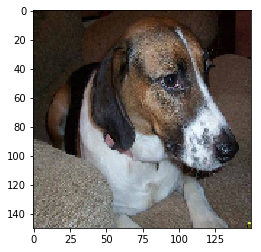

In [72]:
plt.imshow(img_tensor[0])
plt.show()